In [1]:
import numpy as np
import scipy 
import scipy.stats
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from itertools import groupby
import pickle
import os
import math
from sympy import S, symbols
from string import digits
from numpy import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
#sns.mpl.rcParams['figure.figsize'] = (16, 10)

# Directory to store pickled dataframes
directory = '/Users/dianaow/Documents/formula-1-race-data/dataframes/'

In [2]:
def read_from_pickle(directory, filename):
    df = pd.DataFrame()
    filepath = directory + filename
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
            
    return df

In [3]:
df_TDPS_alldrivers = read_from_pickle(directory, "df_TDPS_alldrivers.pickle")

In [4]:
def indiv_polynomial_reg_POLYFIT(data, calc_r2=False, fuel_adj=False, show_plot=True, show_table=True, **kwargs):
    
    
    """Returns individual polynomial regression coefficients for each specified grouping"""
    min_point = []
    coeffs = []
    r2_scores = []
    gs = []
    lengths = []
    years = []
    all_eqns = pd.DataFrame()
    groupby_fields = []
    values = []
    
    if kwargs is not None:
        for key, value in kwargs.iteritems():
            groupby = data[value].unique()
            groupby_fields.append(groupby)
            values.append(value)
            
    for g in itertools.product(*groupby_fields):
        
        try:
            data_grouped = data.groupby(values).get_group(g).reset_index()
            gs.append(g) 
            years.append(data_grouped['year'][0])
            lengths.append(len(data_grouped.index))
            try:
                if calc_r2 == True:
                    f, R2 = plot_polyreg_curve(data_grouped, calc_r2, fuel_adj, show_plot)
                    coeffs.append(f) 
                    r2_scores.append(R2)
                    min_point.append(f.deriv().r)
                else:
                    f = plot_polyreg_curve(data_grouped, calc_r2, fuel_adj, show_plot)
                    coeffs.append(f) 
                    min_point.append(f.deriv().r)
            except:
                coeffs.append("none")
                r2_scores.append("none")
                min_point.append("none")
            
        except: 
            comment = "Did not run a full stint on this tyre during the race"
            gs.append(g) 
            years.append(data_grouped['year'][0])
            lengths.append("none")
            coeffs.append(comment)
            min_point.append(comment)
            if calc_r2 == True:
                r2_scores.append(comment)
        
        if calc_r2 == True:
            model = pd.DataFrame(
                                    {"group": gs,
                                     'coeffs': coeffs,
                                     'r2 score': r2_scores,
                                     'min point': min_point,
                                     'data points included': lengths,
                                     'year': years
                                    }
                                )
        else: 
            model = pd.DataFrame(
                        {"group": gs,
                         'coeffs': coeffs,
                         'min point': min_point,
                         'data points included': lengths,
                         'year': years
                        }
                    )
        
        grouping = pd.DataFrame(model['group'].values.tolist(), index=model.index, columns=values)
        
        model_new = model.join(grouping, how='outer')
        model_new = model_new.drop('group', axis=1)

    if show_table == True:
        return model_new 

In [5]:
def plot_polyreg_curve(group, calc_r2=False, fuel_adj=False, show_plot=True):
    
    # get x and y vectors
    x = group['lap into stint']

    if fuel_adj == True:
        y = group['milliseconds (adj)']
    else:
        y = group['milliseconds new']

    # calculate polynomial
    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = range(group['lap into stint'].min(), group['lap into stint'].max() +1)
    y_new = f(x_new)

    if show_plot == True:
        
        plt.figure(figsize=(20,10))
        plt.title("  Race: " + str(group['name'].unique()[0]) + \
                  "  Driver: " + str(group['driverRef'].unique()) + \
                  "  Stint: " + str(group['stint'].unique()[0]) + \
                  #"  Compound: " + str(group['compound'].unique()[0]) + \
                  "  Tyre: " + str(group['tyre'].unique()[0]))
        plt.plot(x, y,'o', x_new, y_new)
        plt.show()
    
    # Calculate R2 score
    if calc_r2 == True:
        R2 = r2_score(y, y_new)
        return f, R2
    else:
        return f

In [6]:
df_TDPS_alldrivers.head()

,date,driverId,driverRef,lap,lap into stint,lap(start of stint),laps,milliseconds,milliseconds new,ms(start at 0),...,outlier,pitlaps/inlaps/outlaps,position,raceId,statusId,stint,stop,time,tyre,year
0,NaT,20,vettel,2,0,2,57,91664,0,91664,...,False,NaN,1,948,1,1.0,3.0,1:31.664,Super soft,2016
1,NaT,20,vettel,3,1,2,57,92167,503,91664,...,False,NaN,1,948,1,1.0,3.0,1:32.167,Super soft,2016
2,NaT,20,vettel,4,2,2,57,92014,350,91664,...,False,NaN,1,948,1,1.0,3.0,1:32.014,Super soft,2016
3,NaT,20,vettel,5,3,2,57,92273,609,91664,...,False,NaN,1,948,1,1.0,3.0,1:32.273,Super soft,2016
4,NaT,20,vettel,6,4,2,57,92204,540,91664,...,False,NaN,1,948,1,1.0,3.0,1:32.204,Super soft,2016


In [7]:
sample = df_TDPS_alldrivers[df_TDPS_alldrivers['name'] == "Australian Grand Prix"]

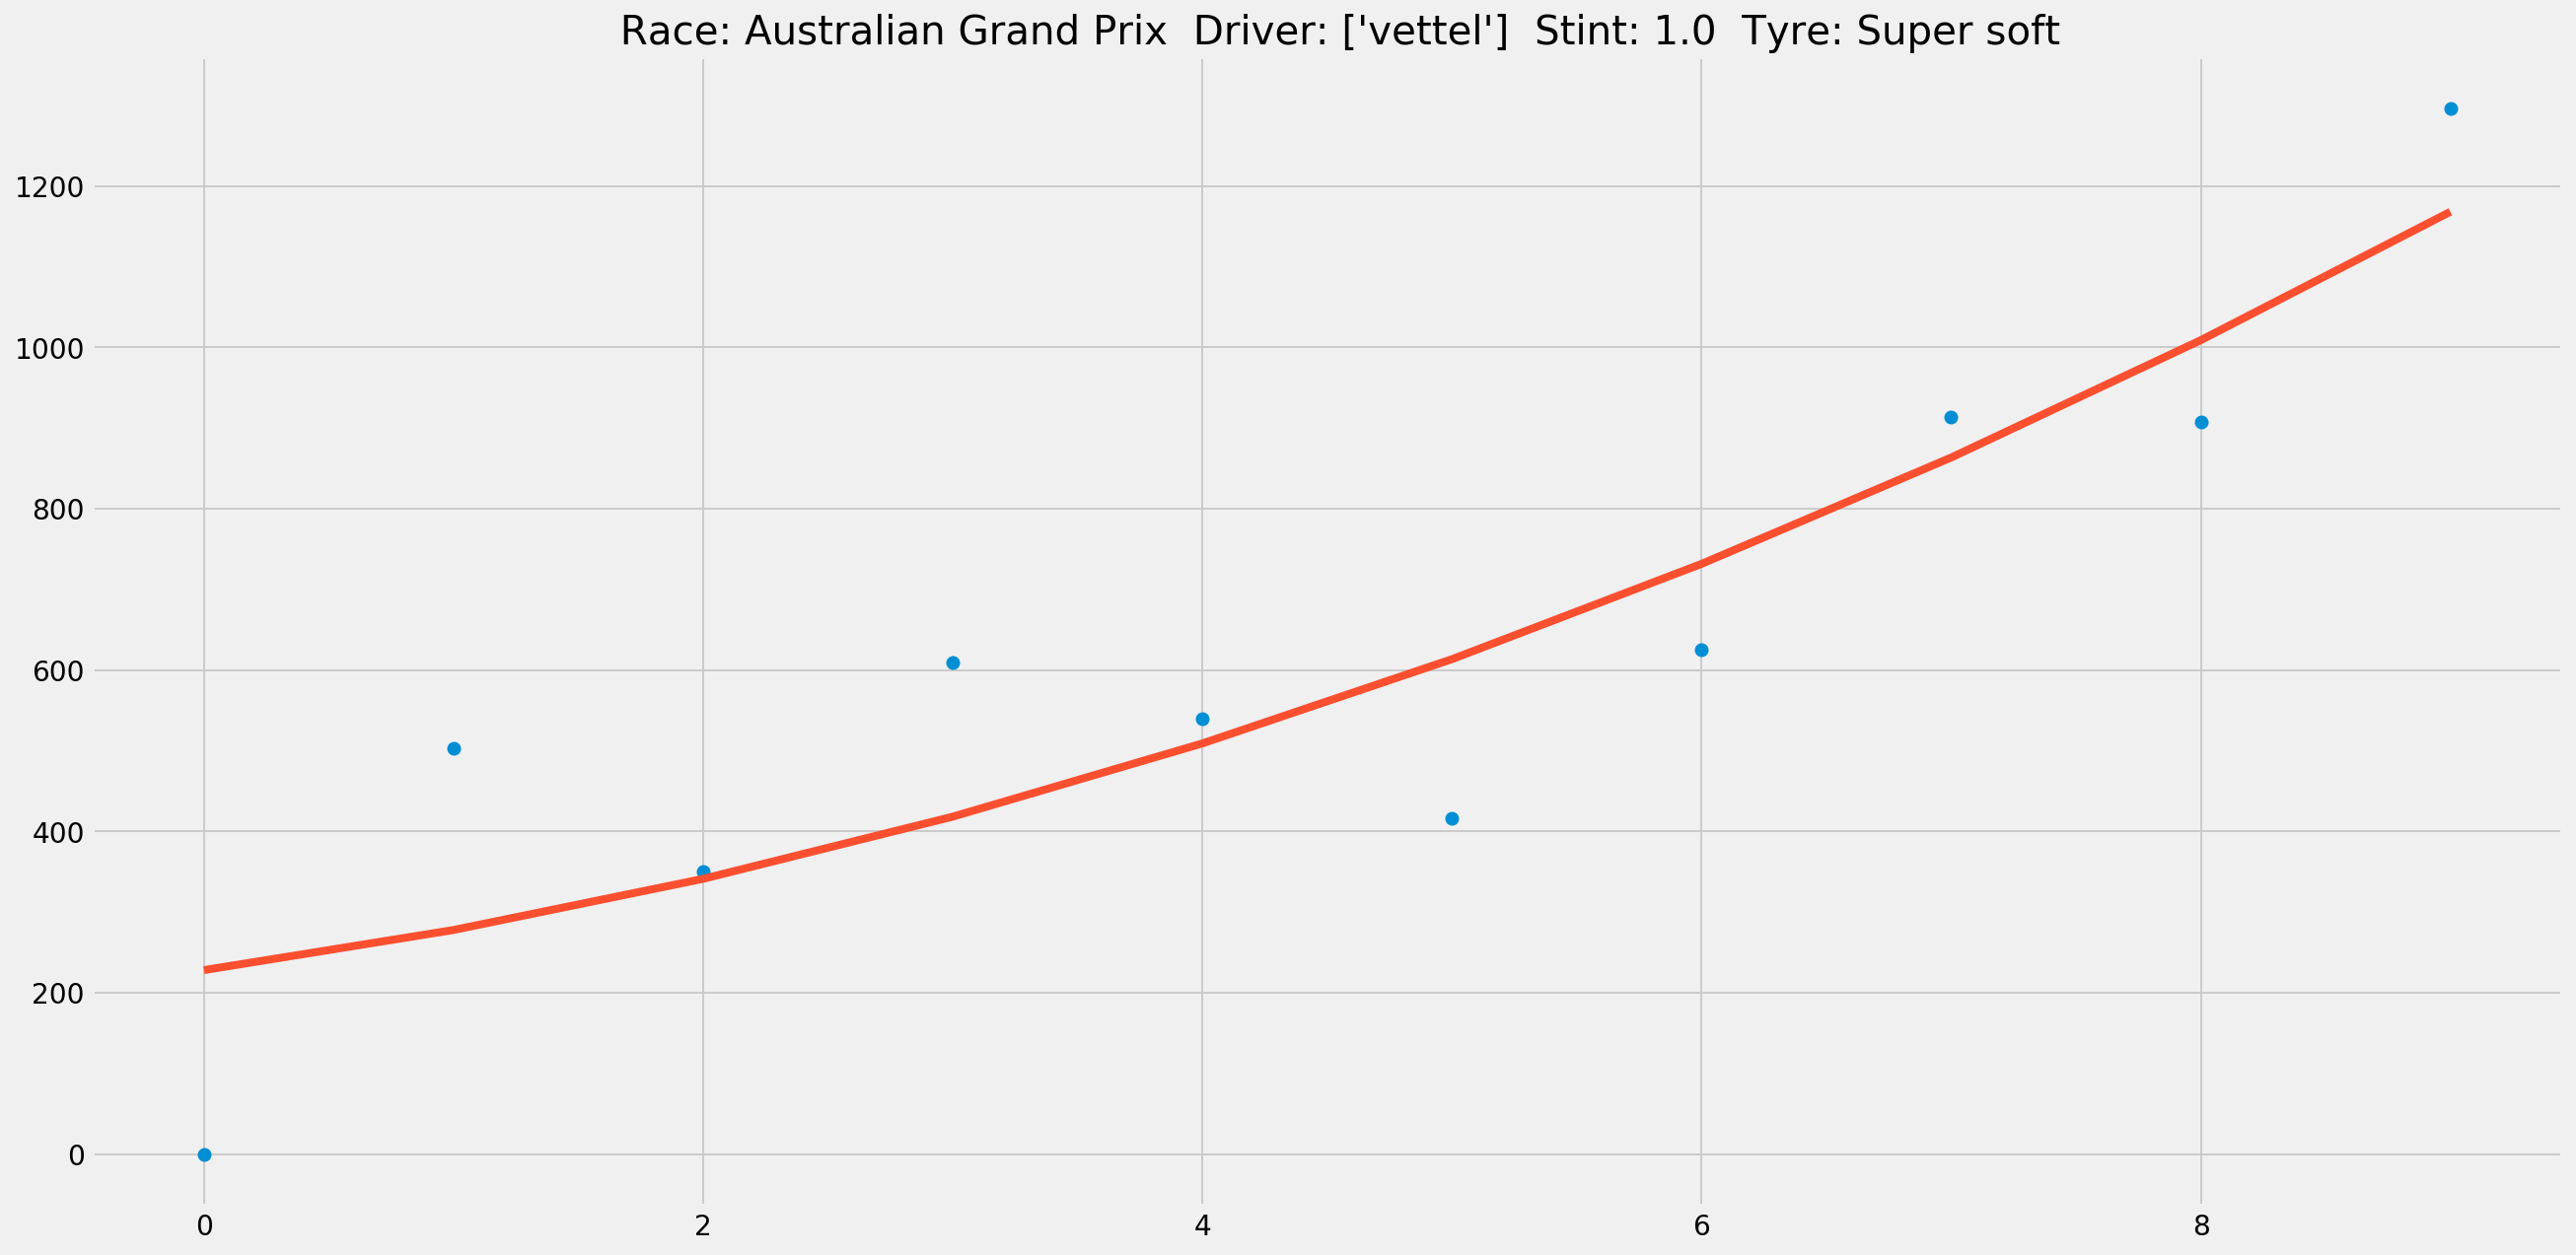

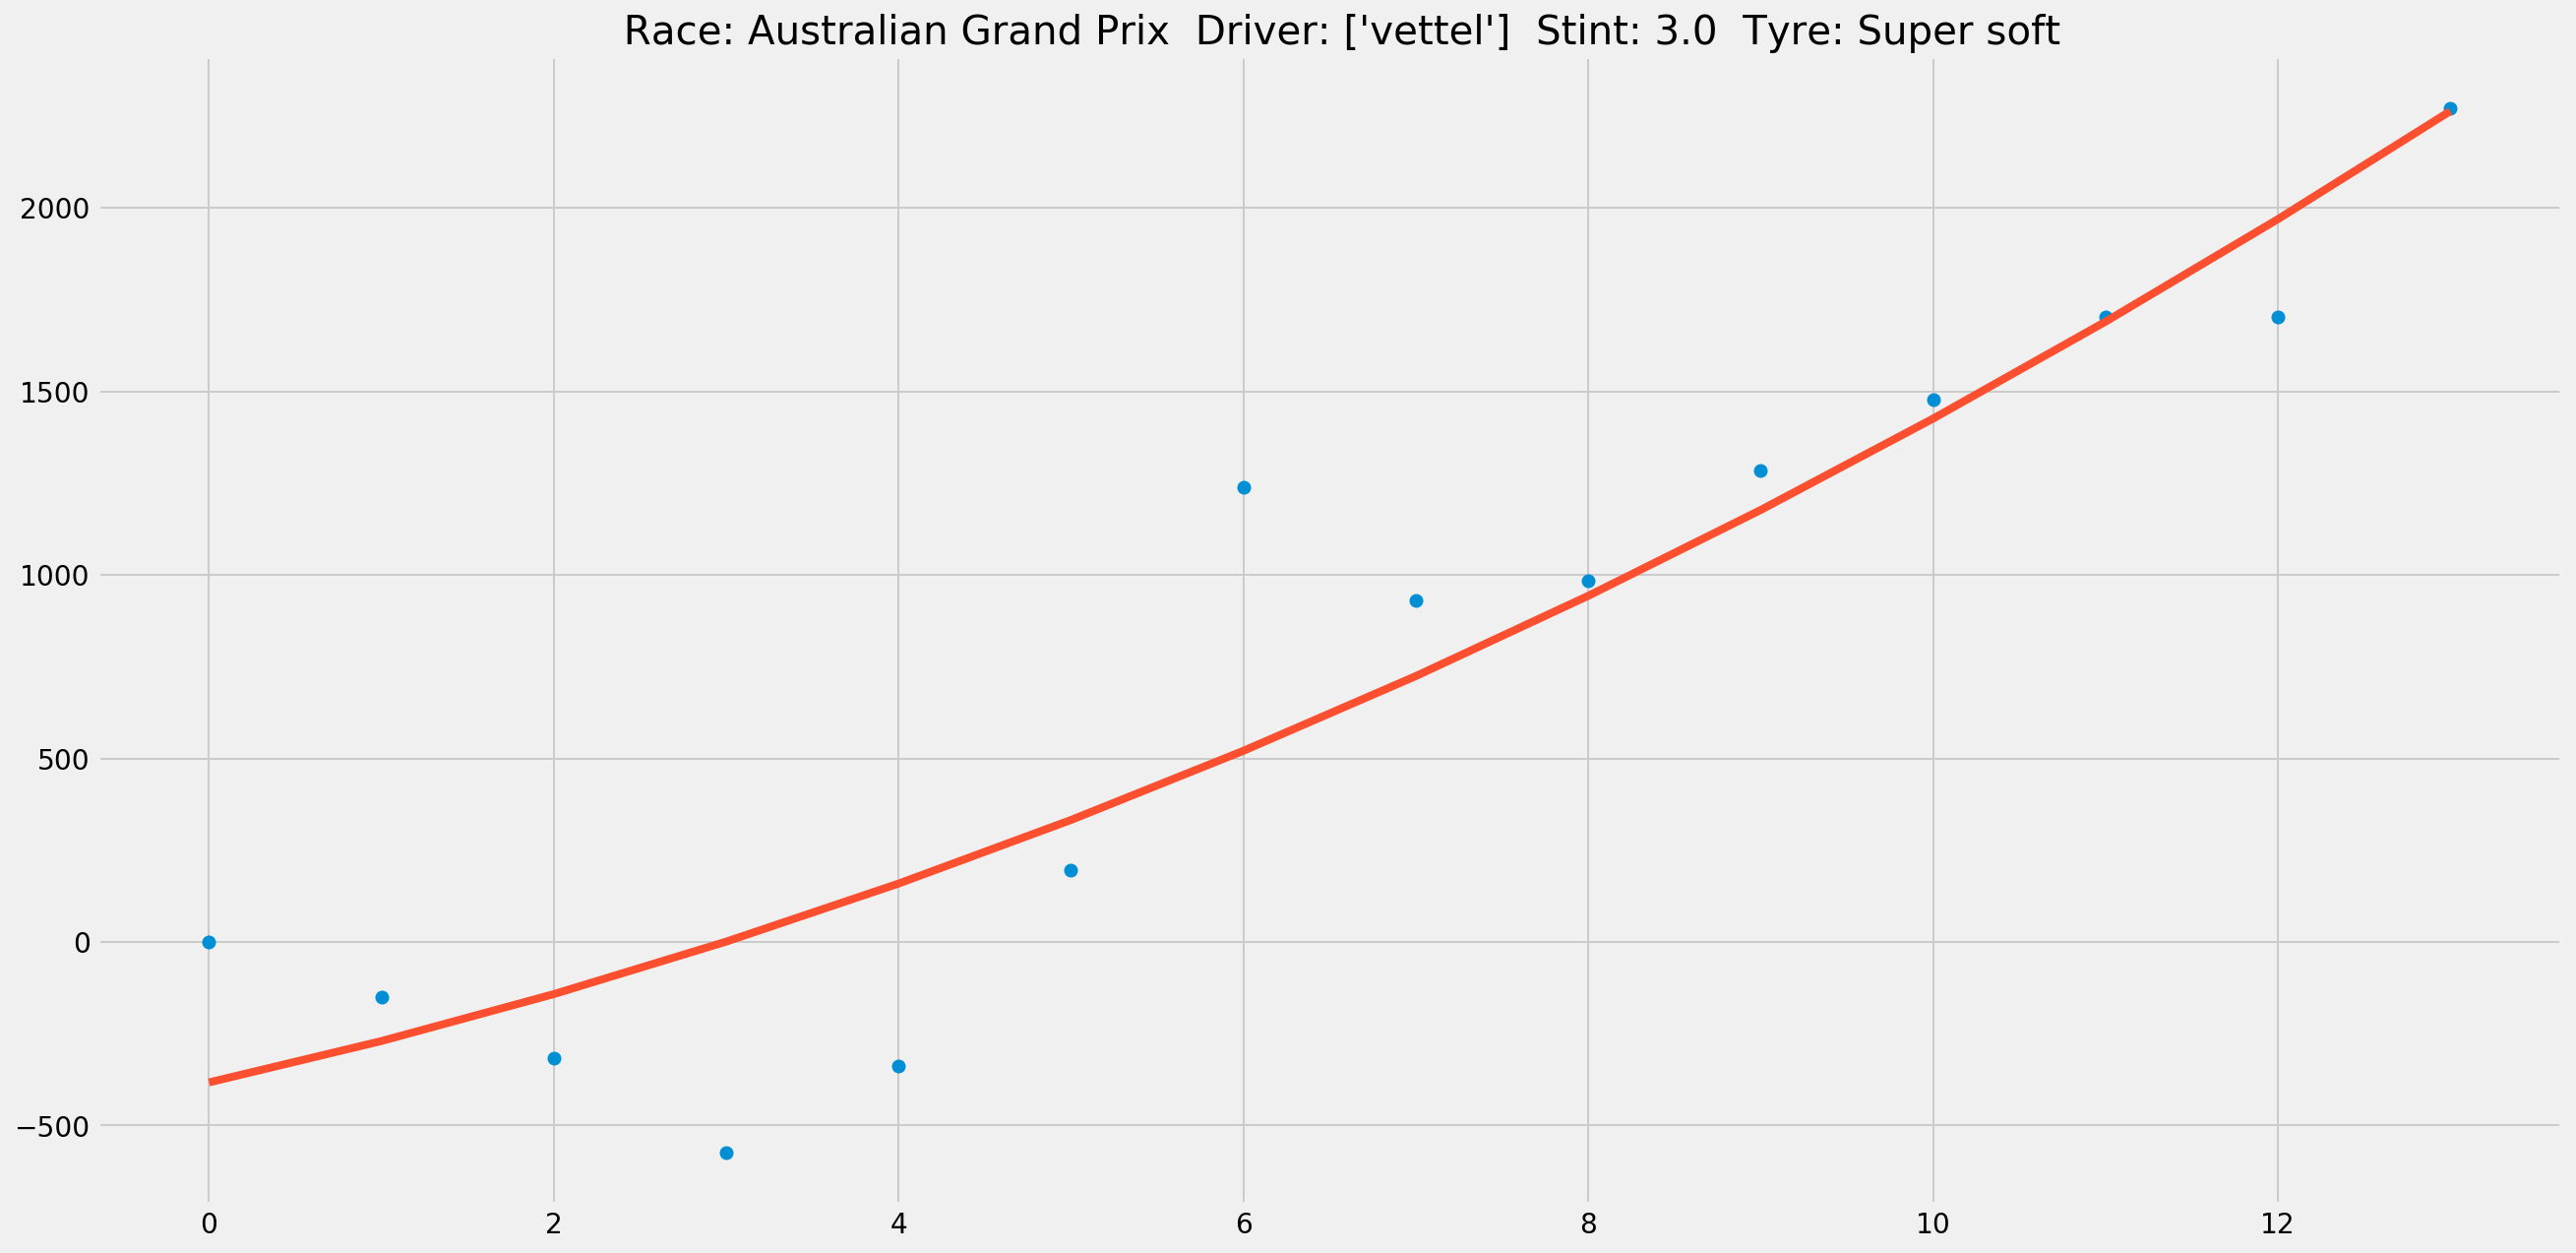

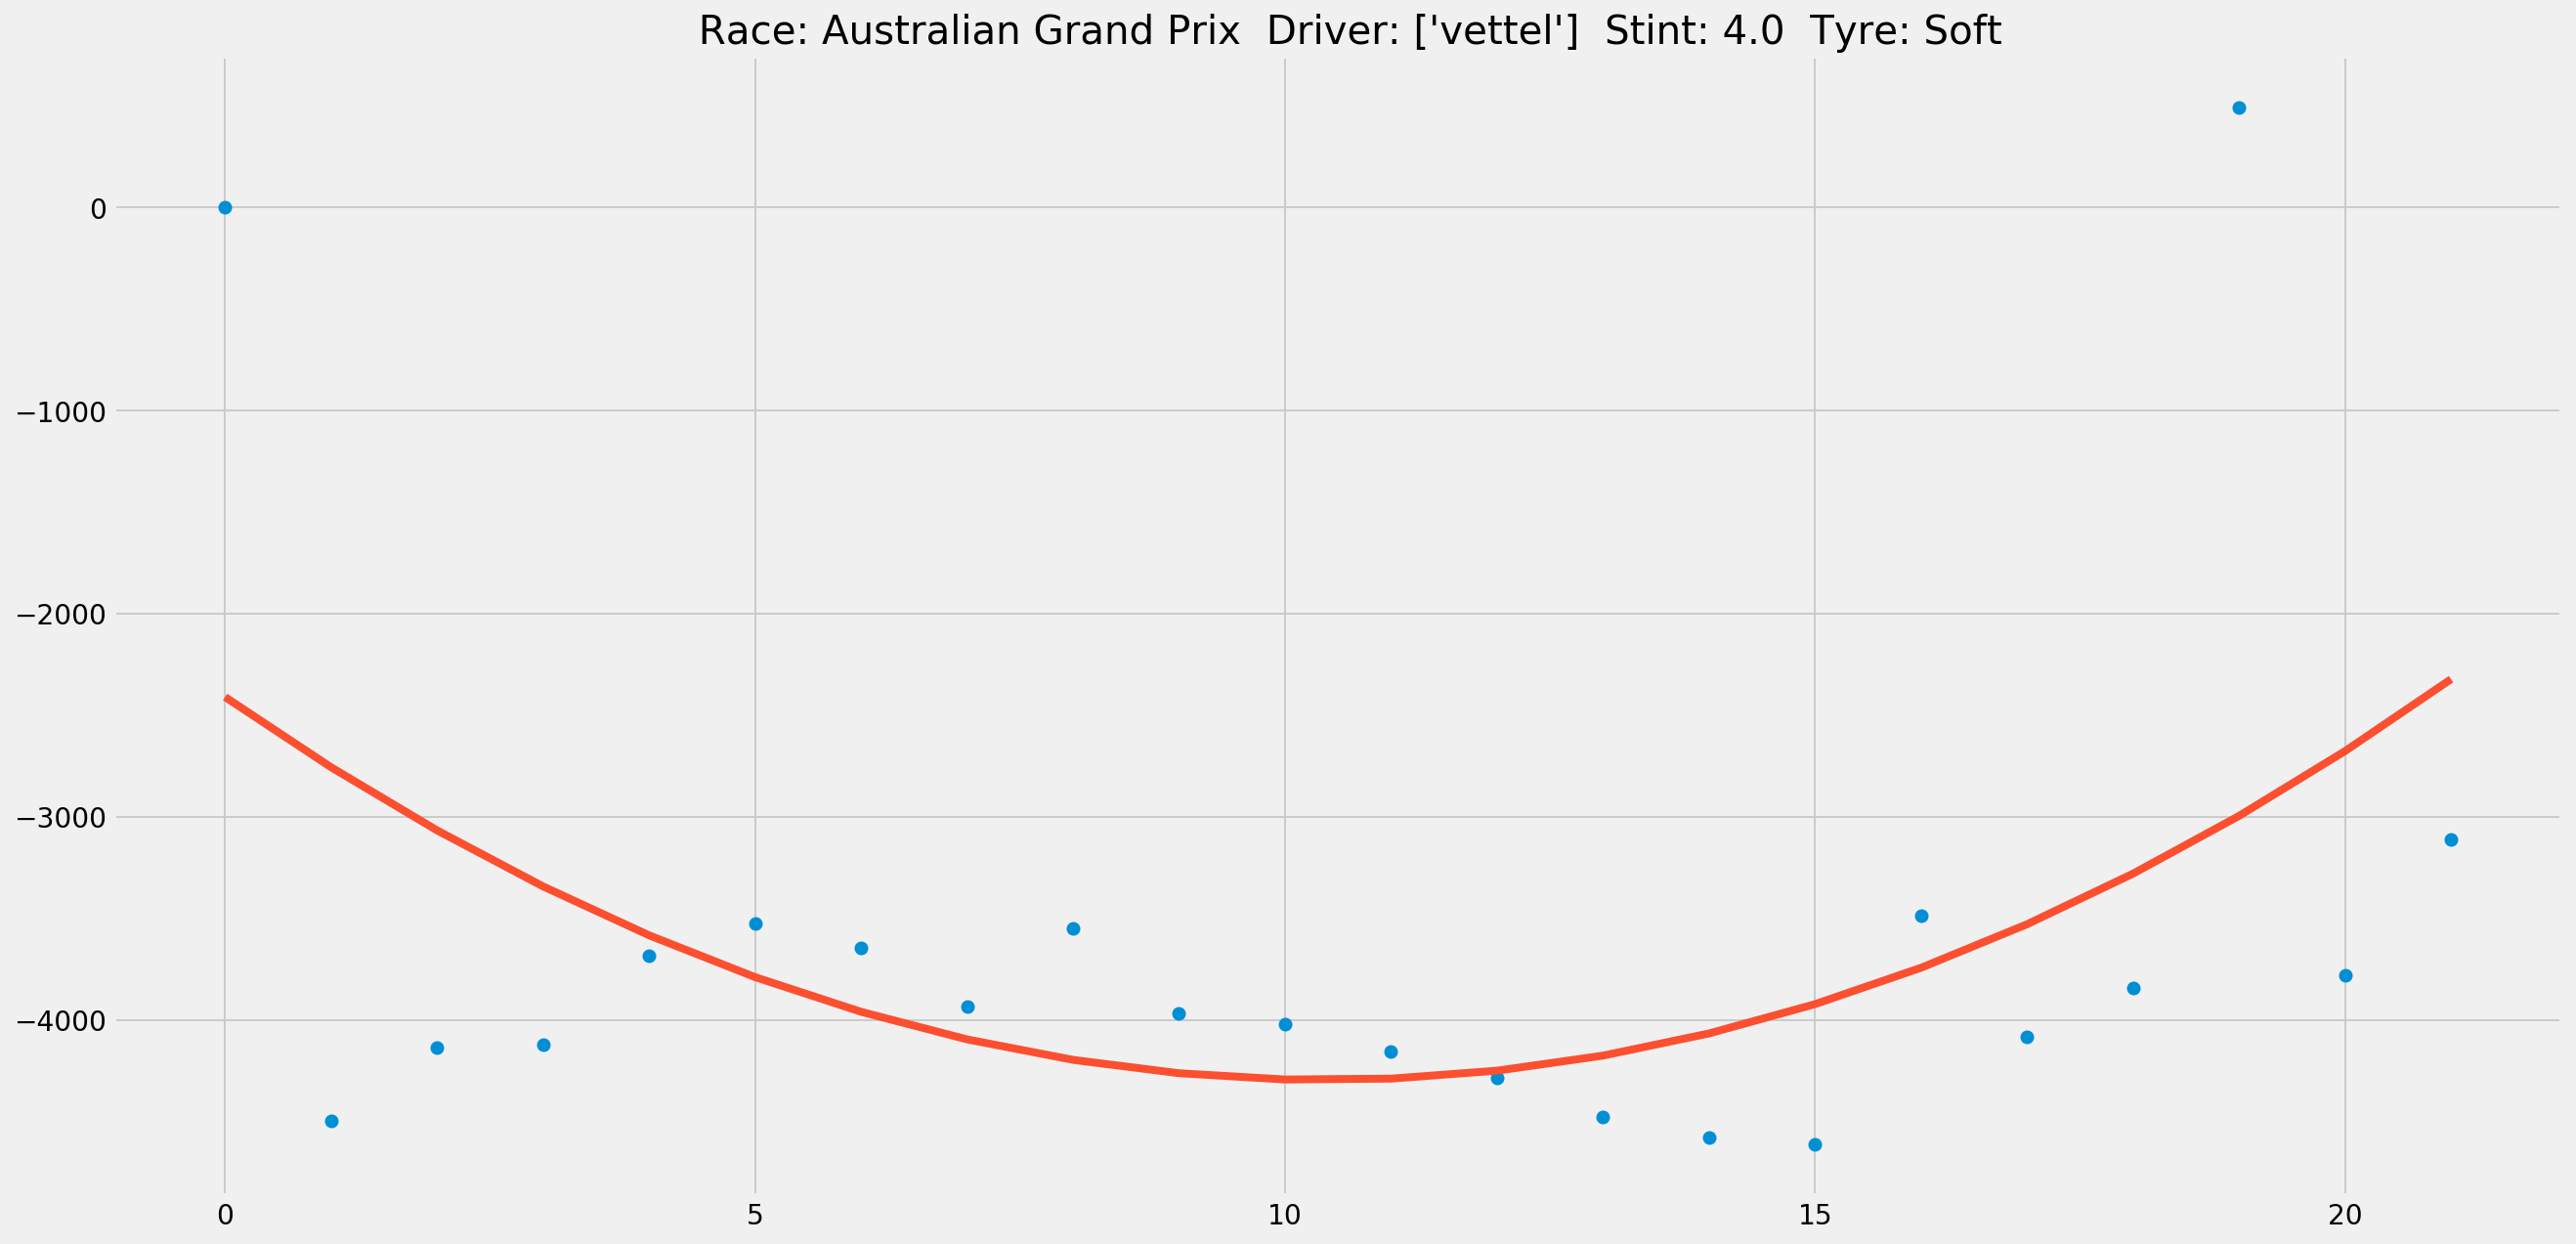

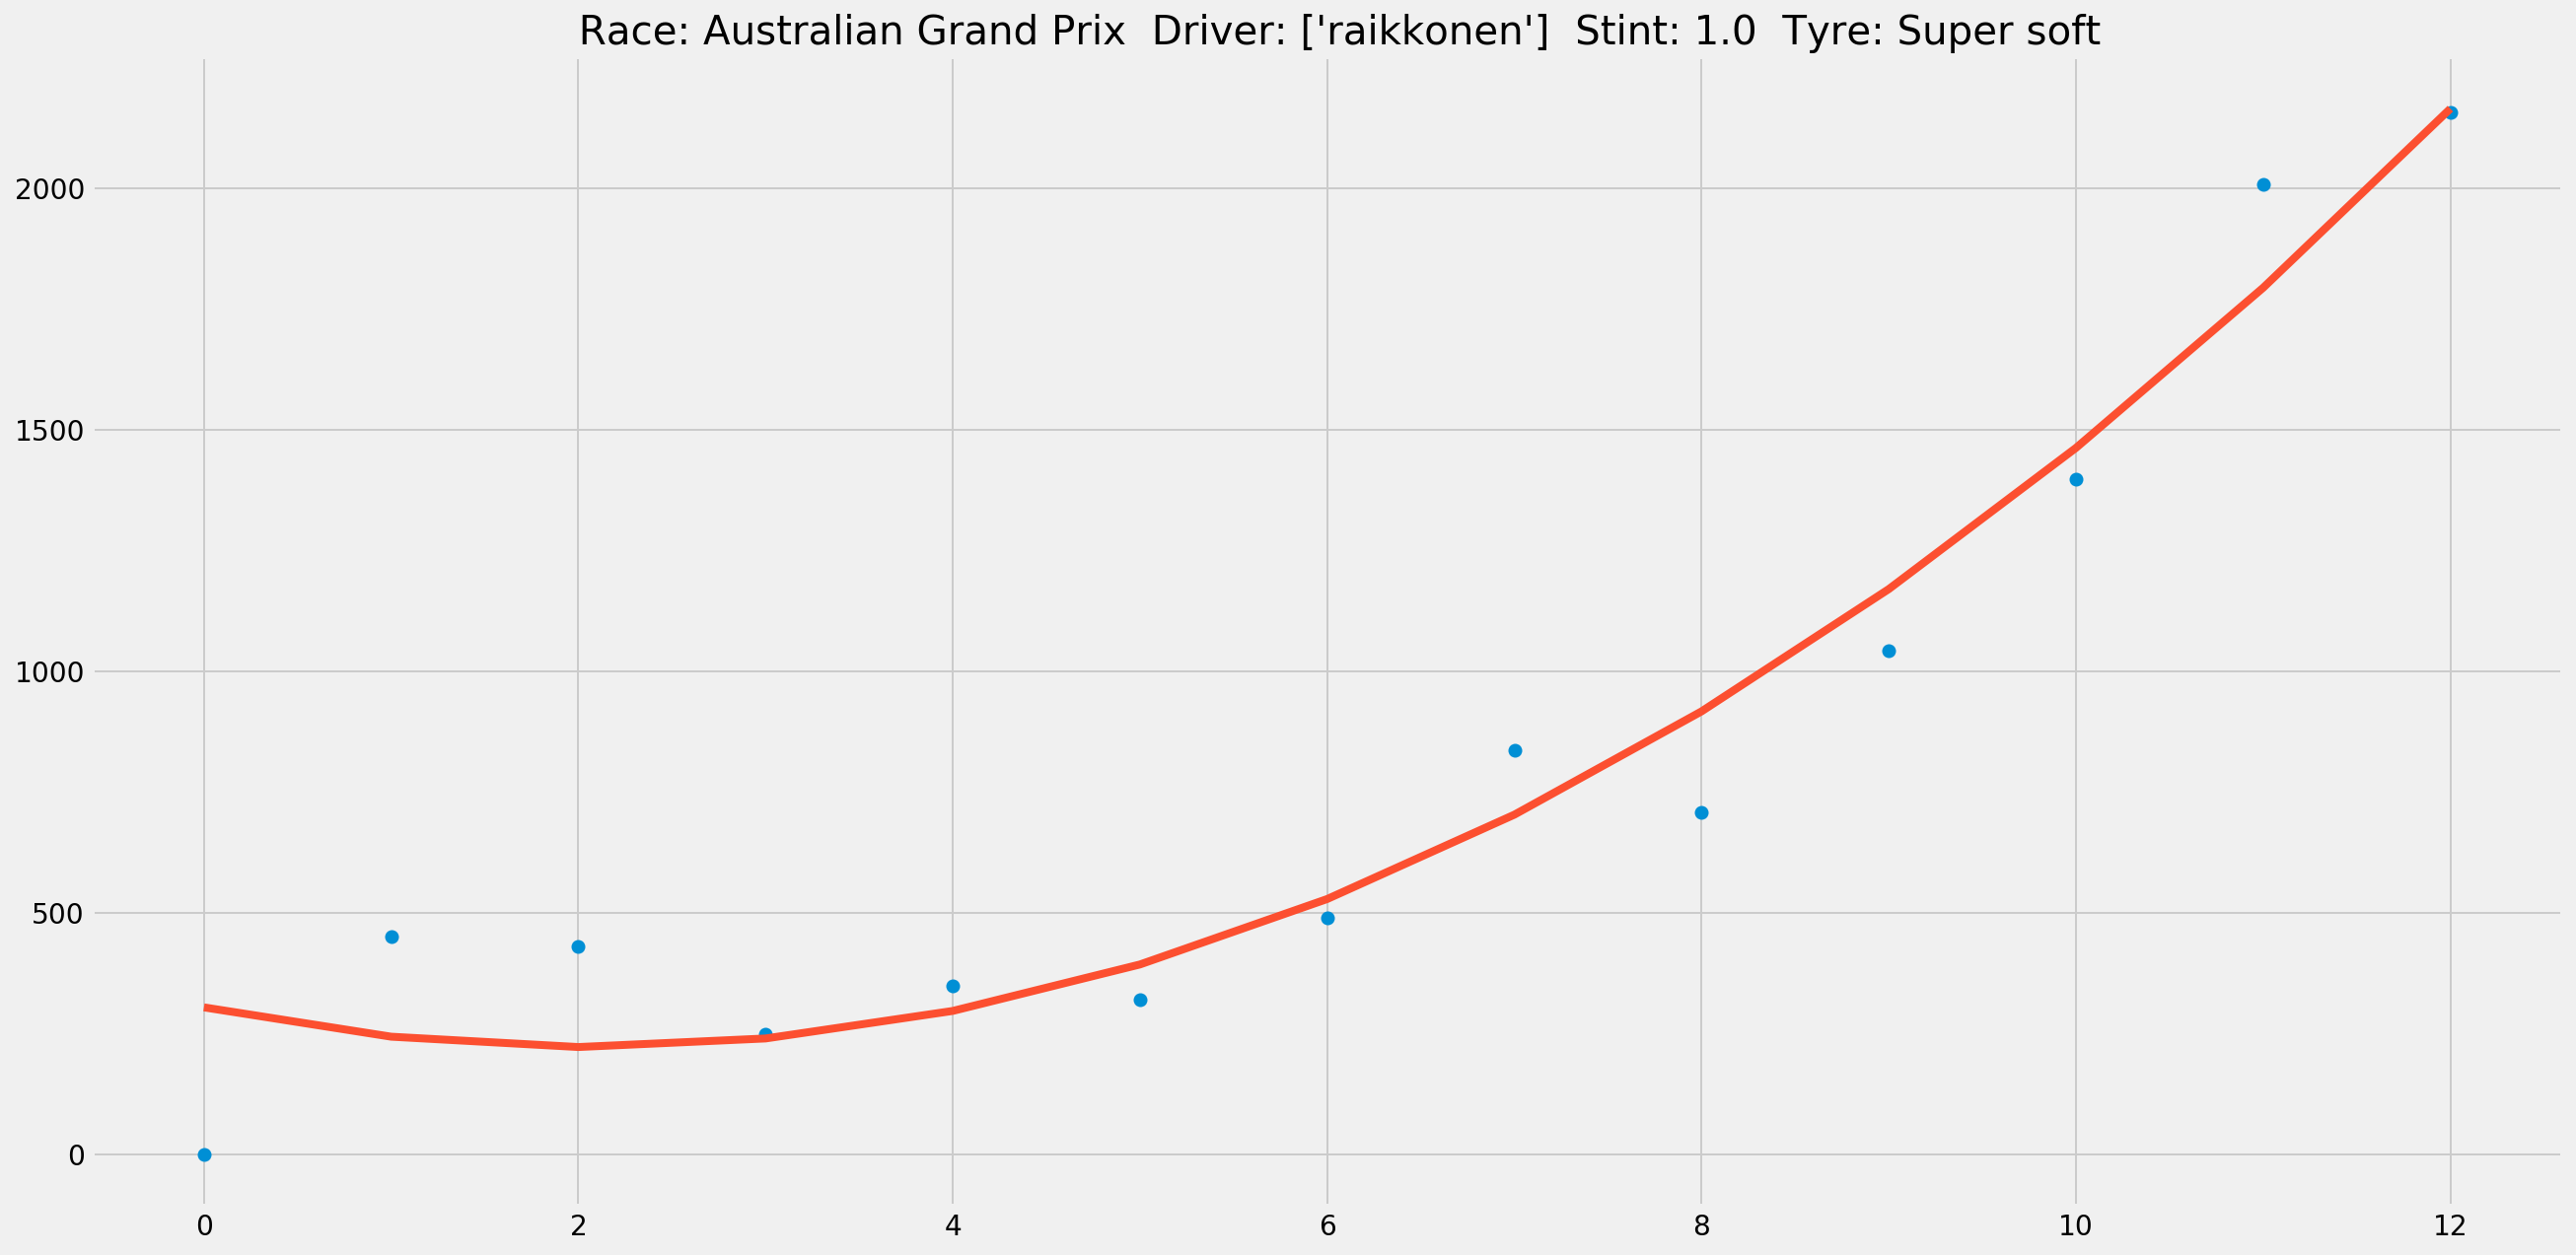

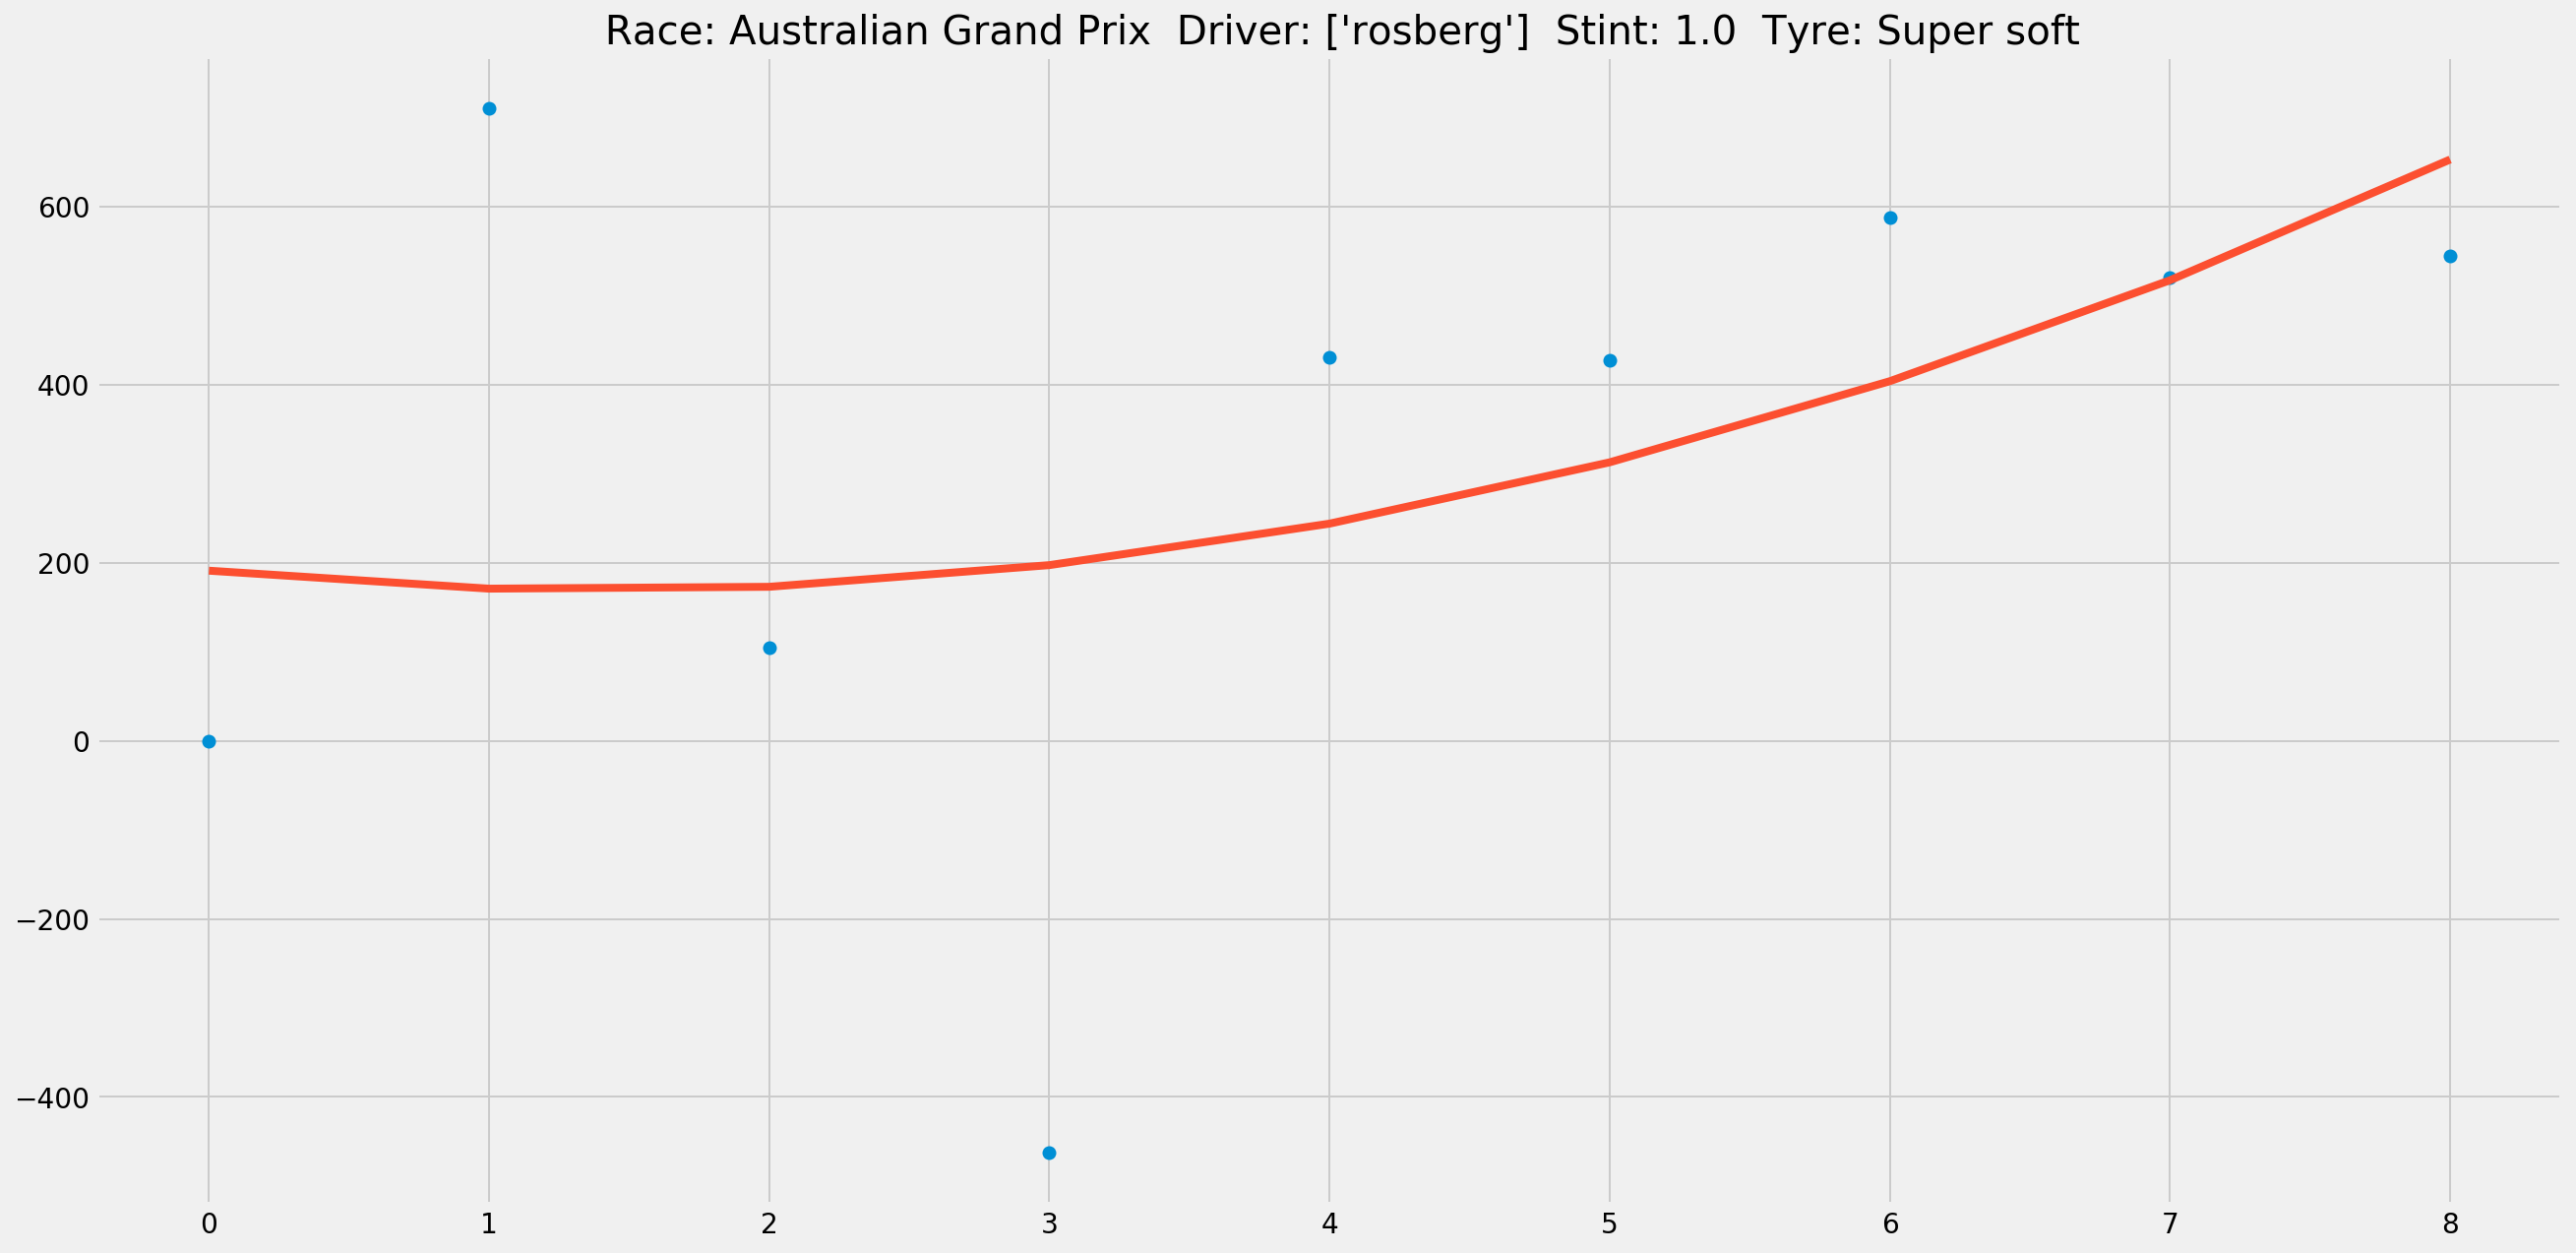

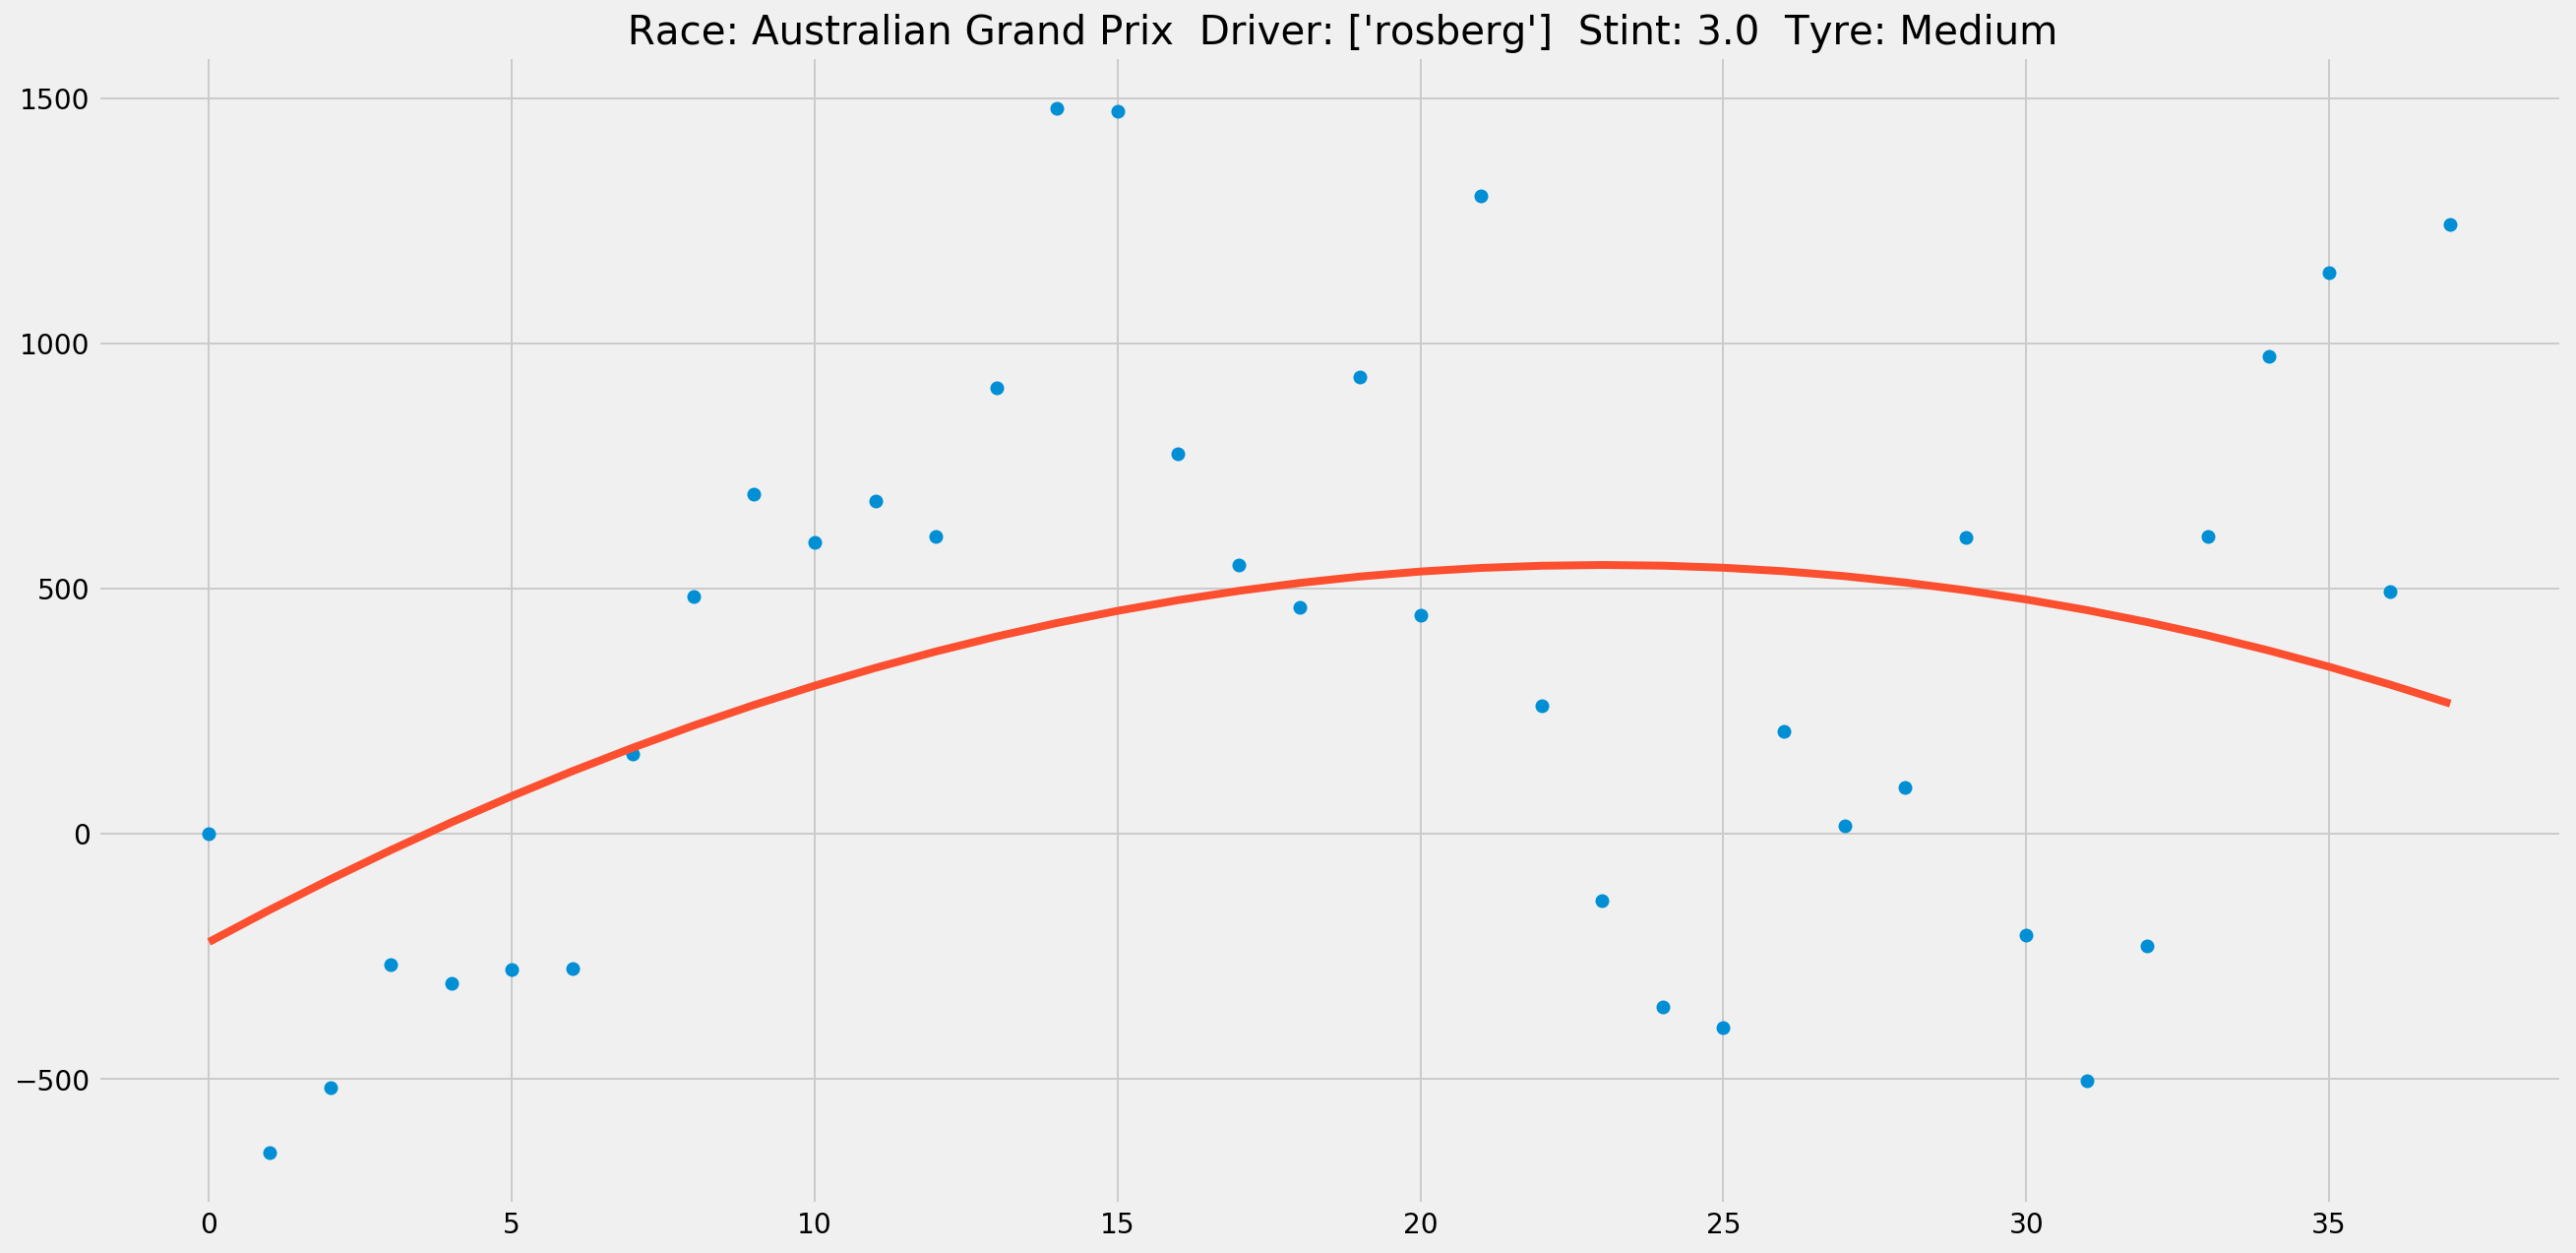

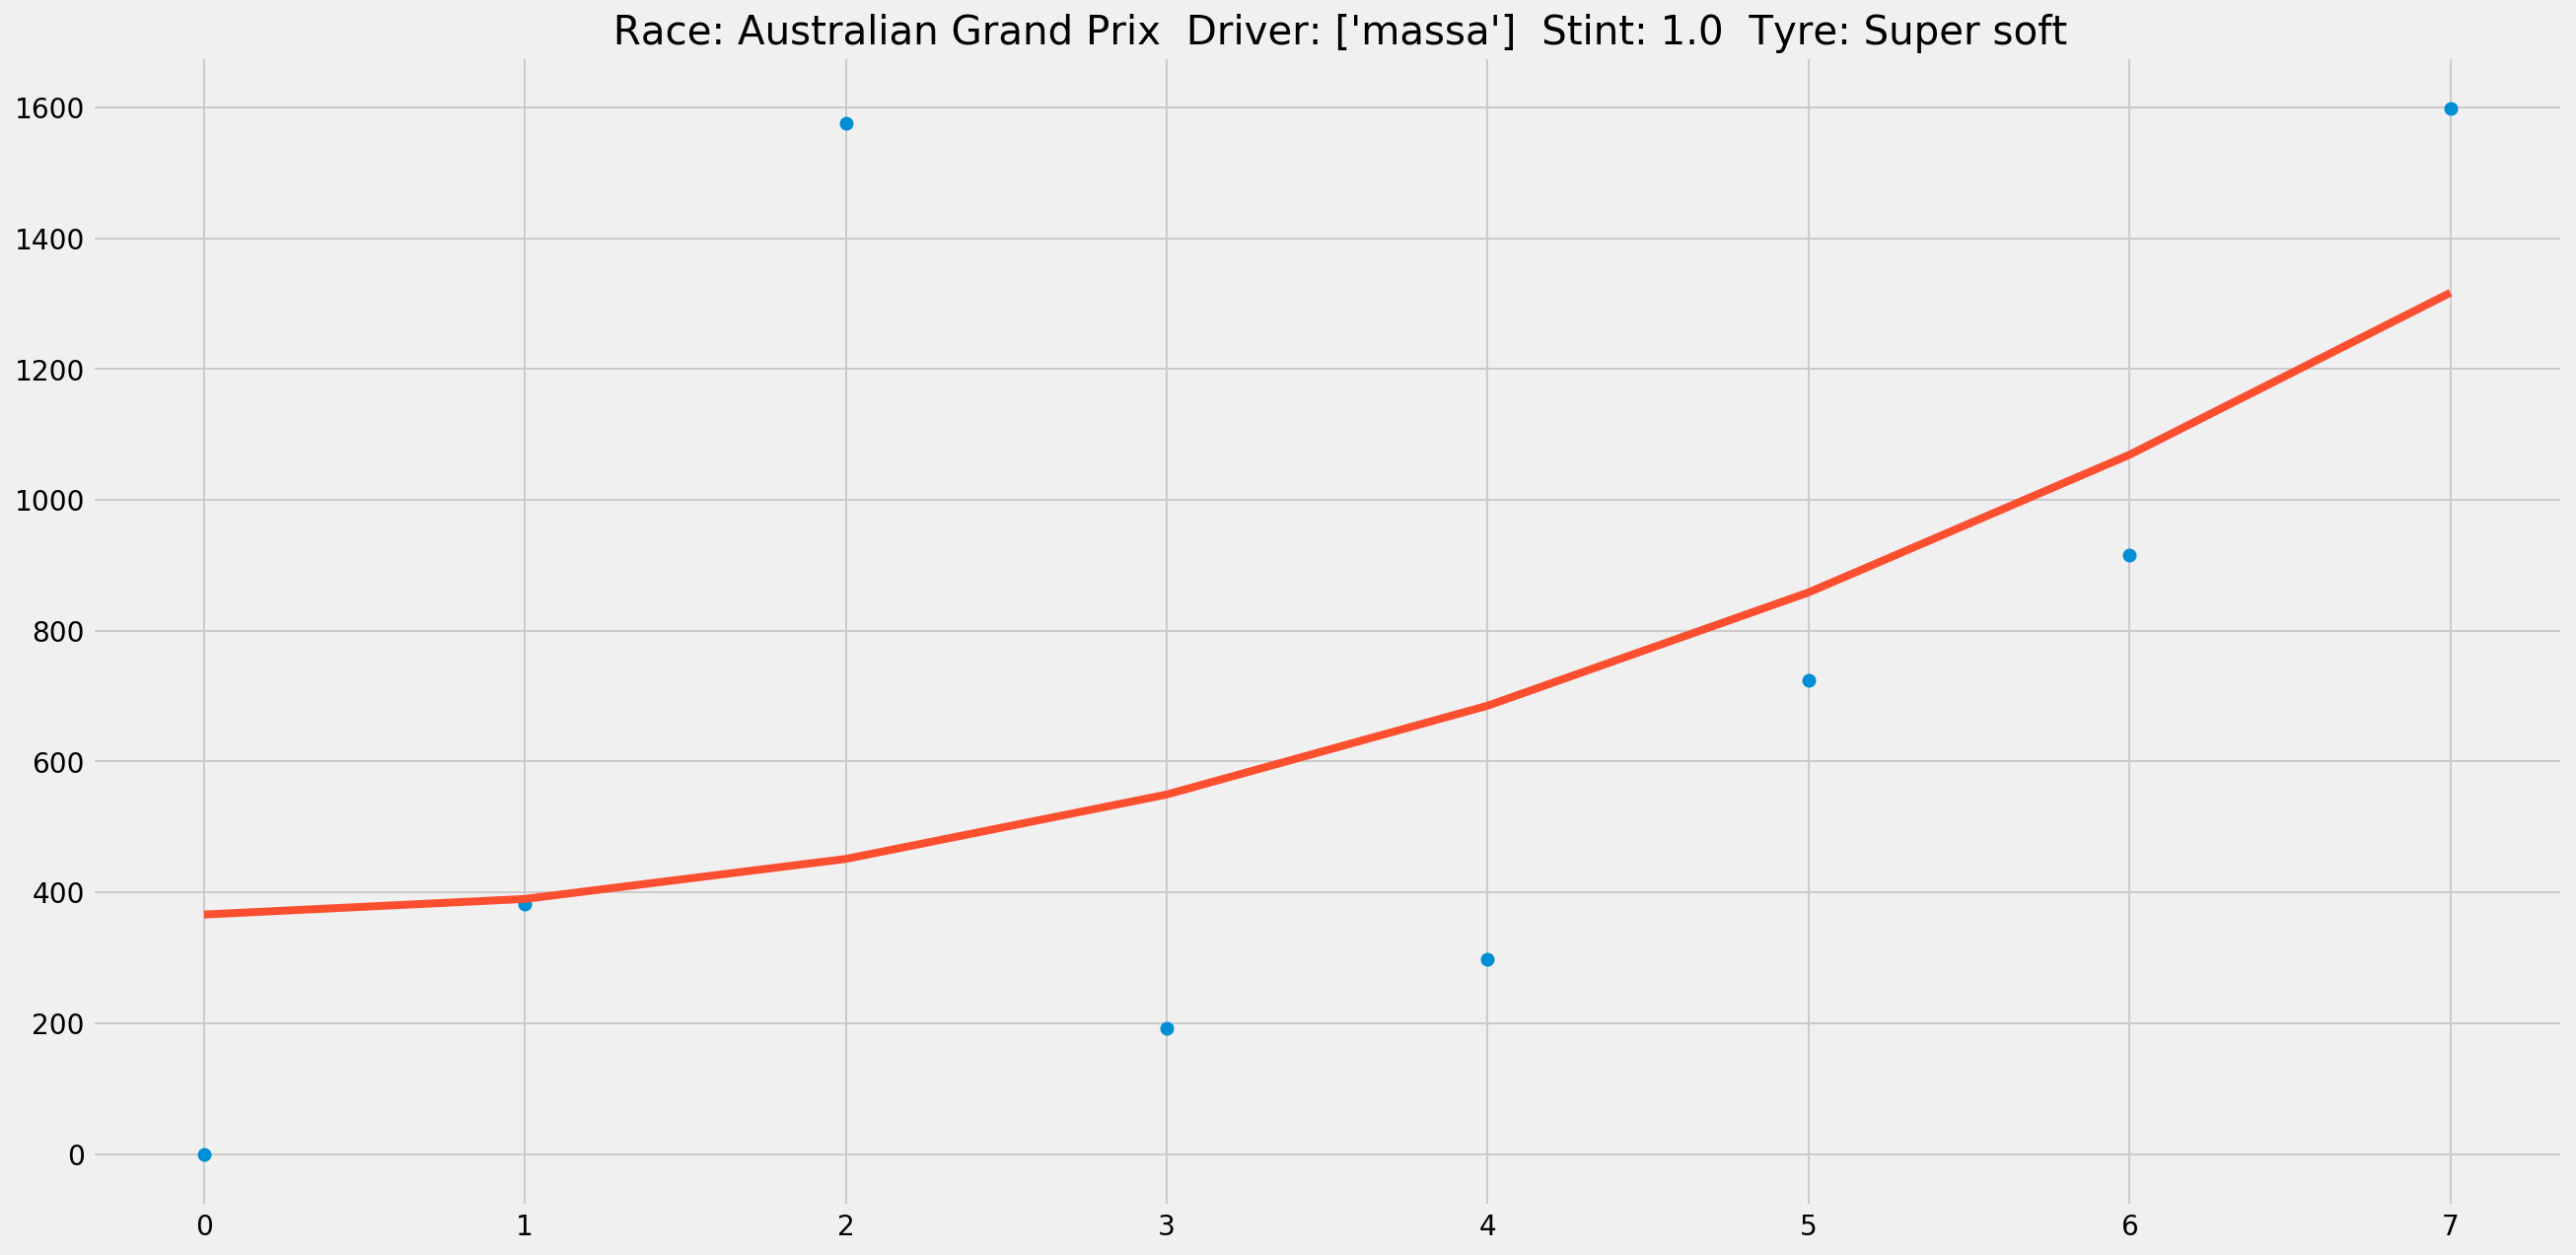

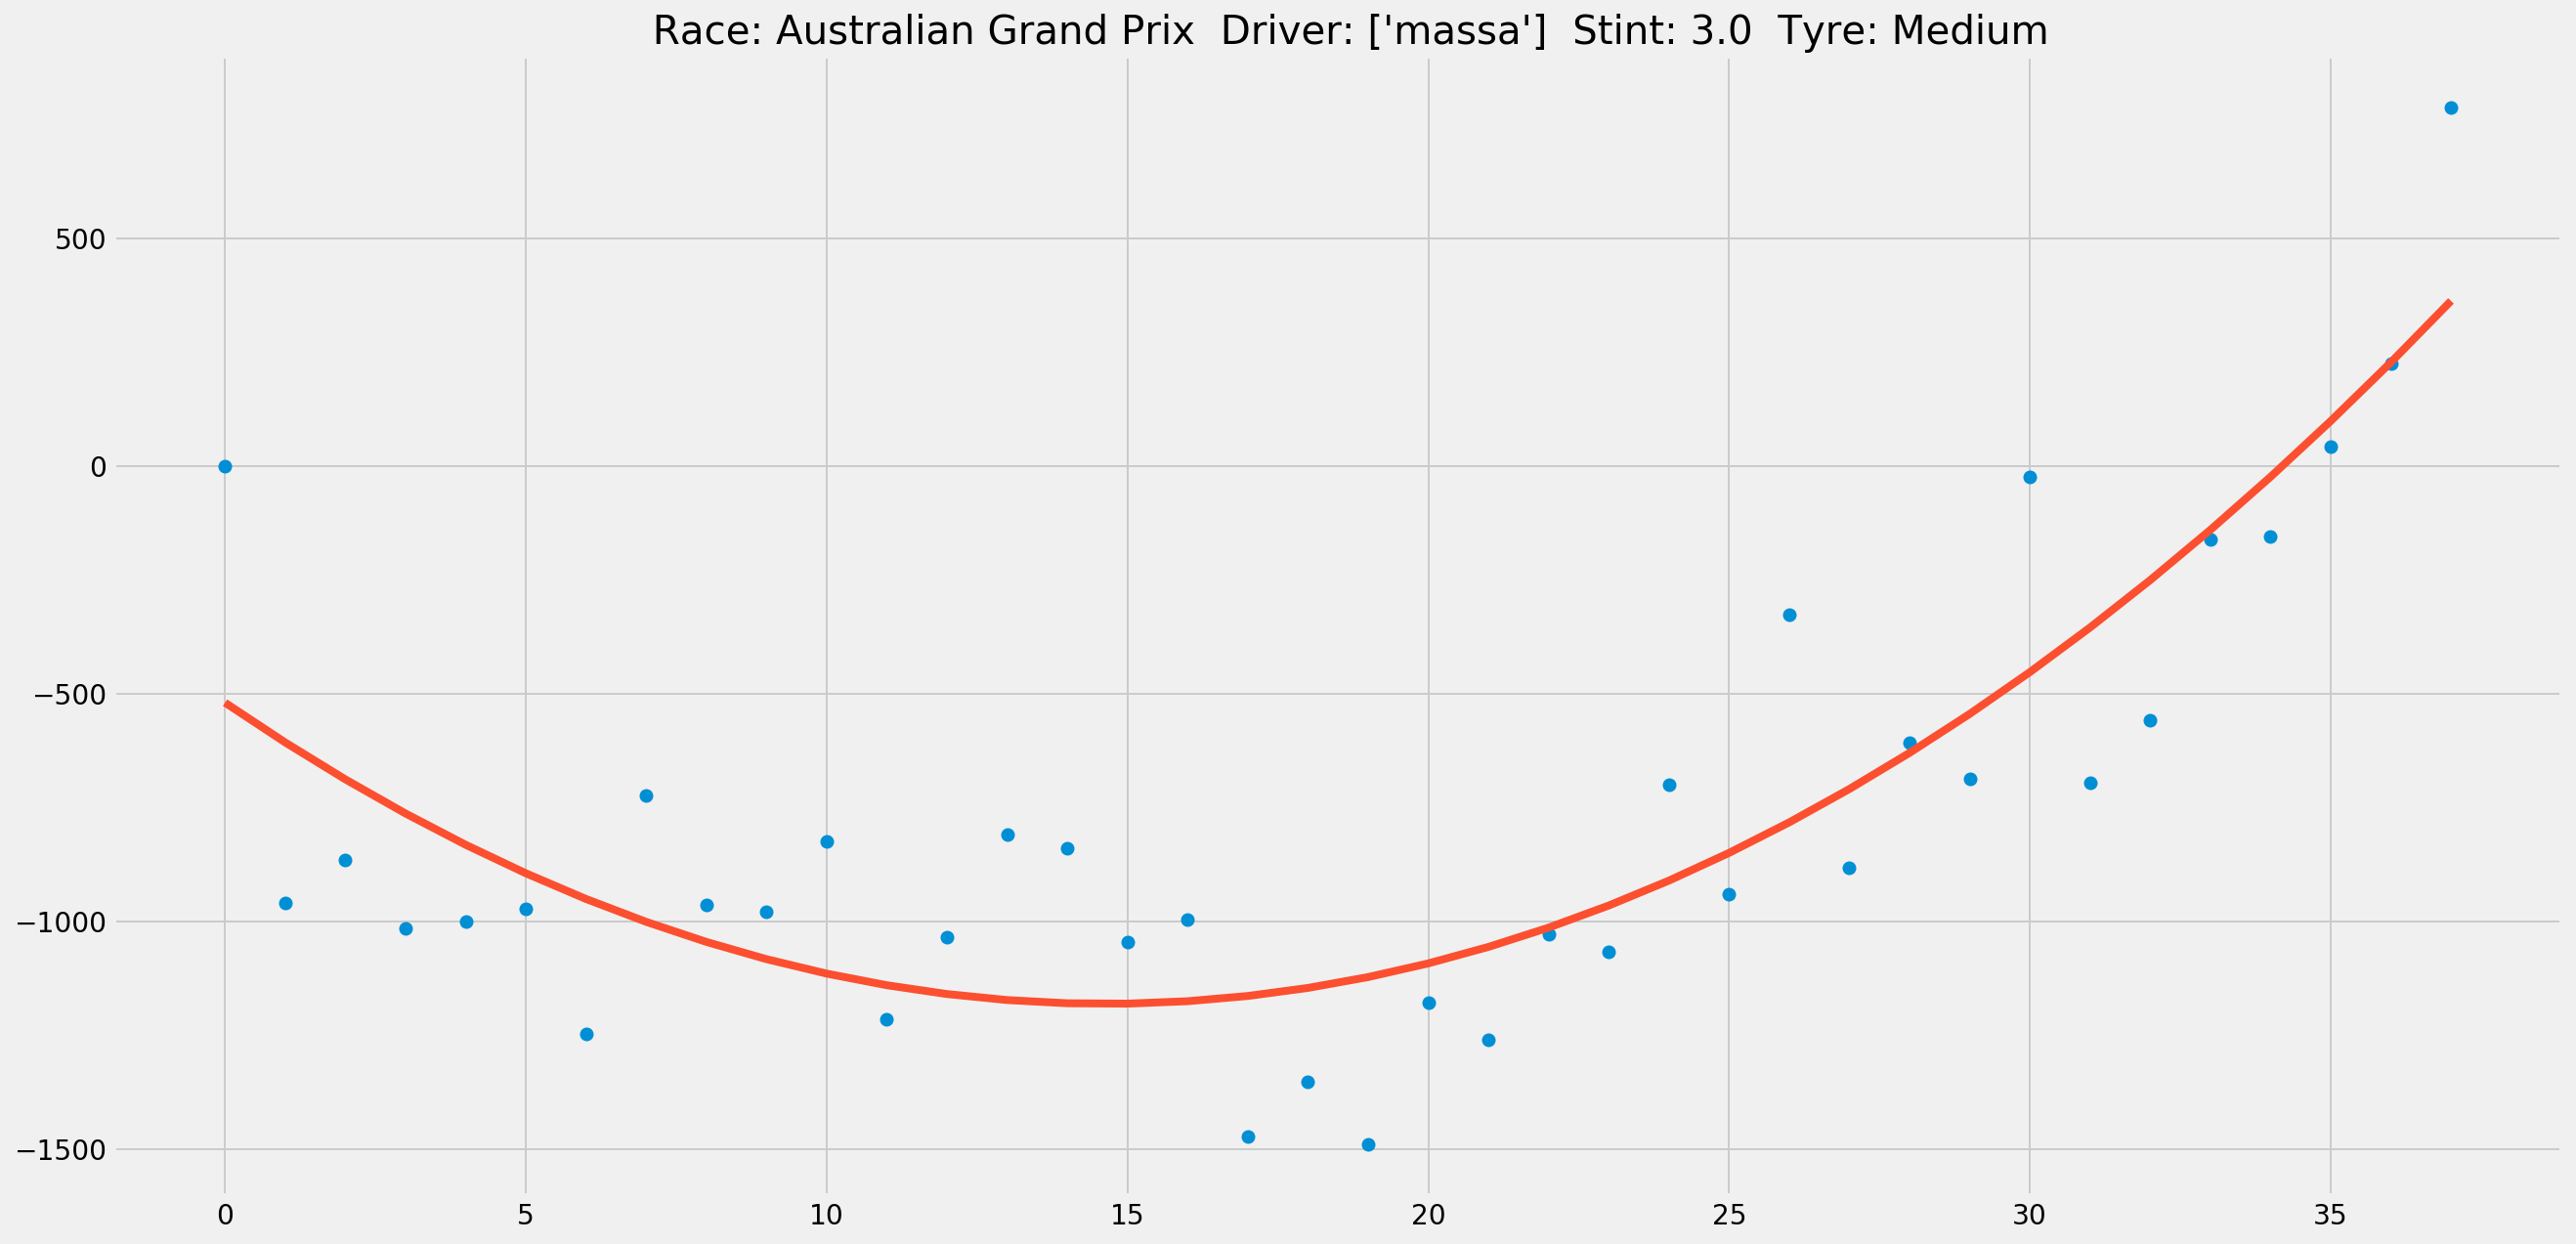

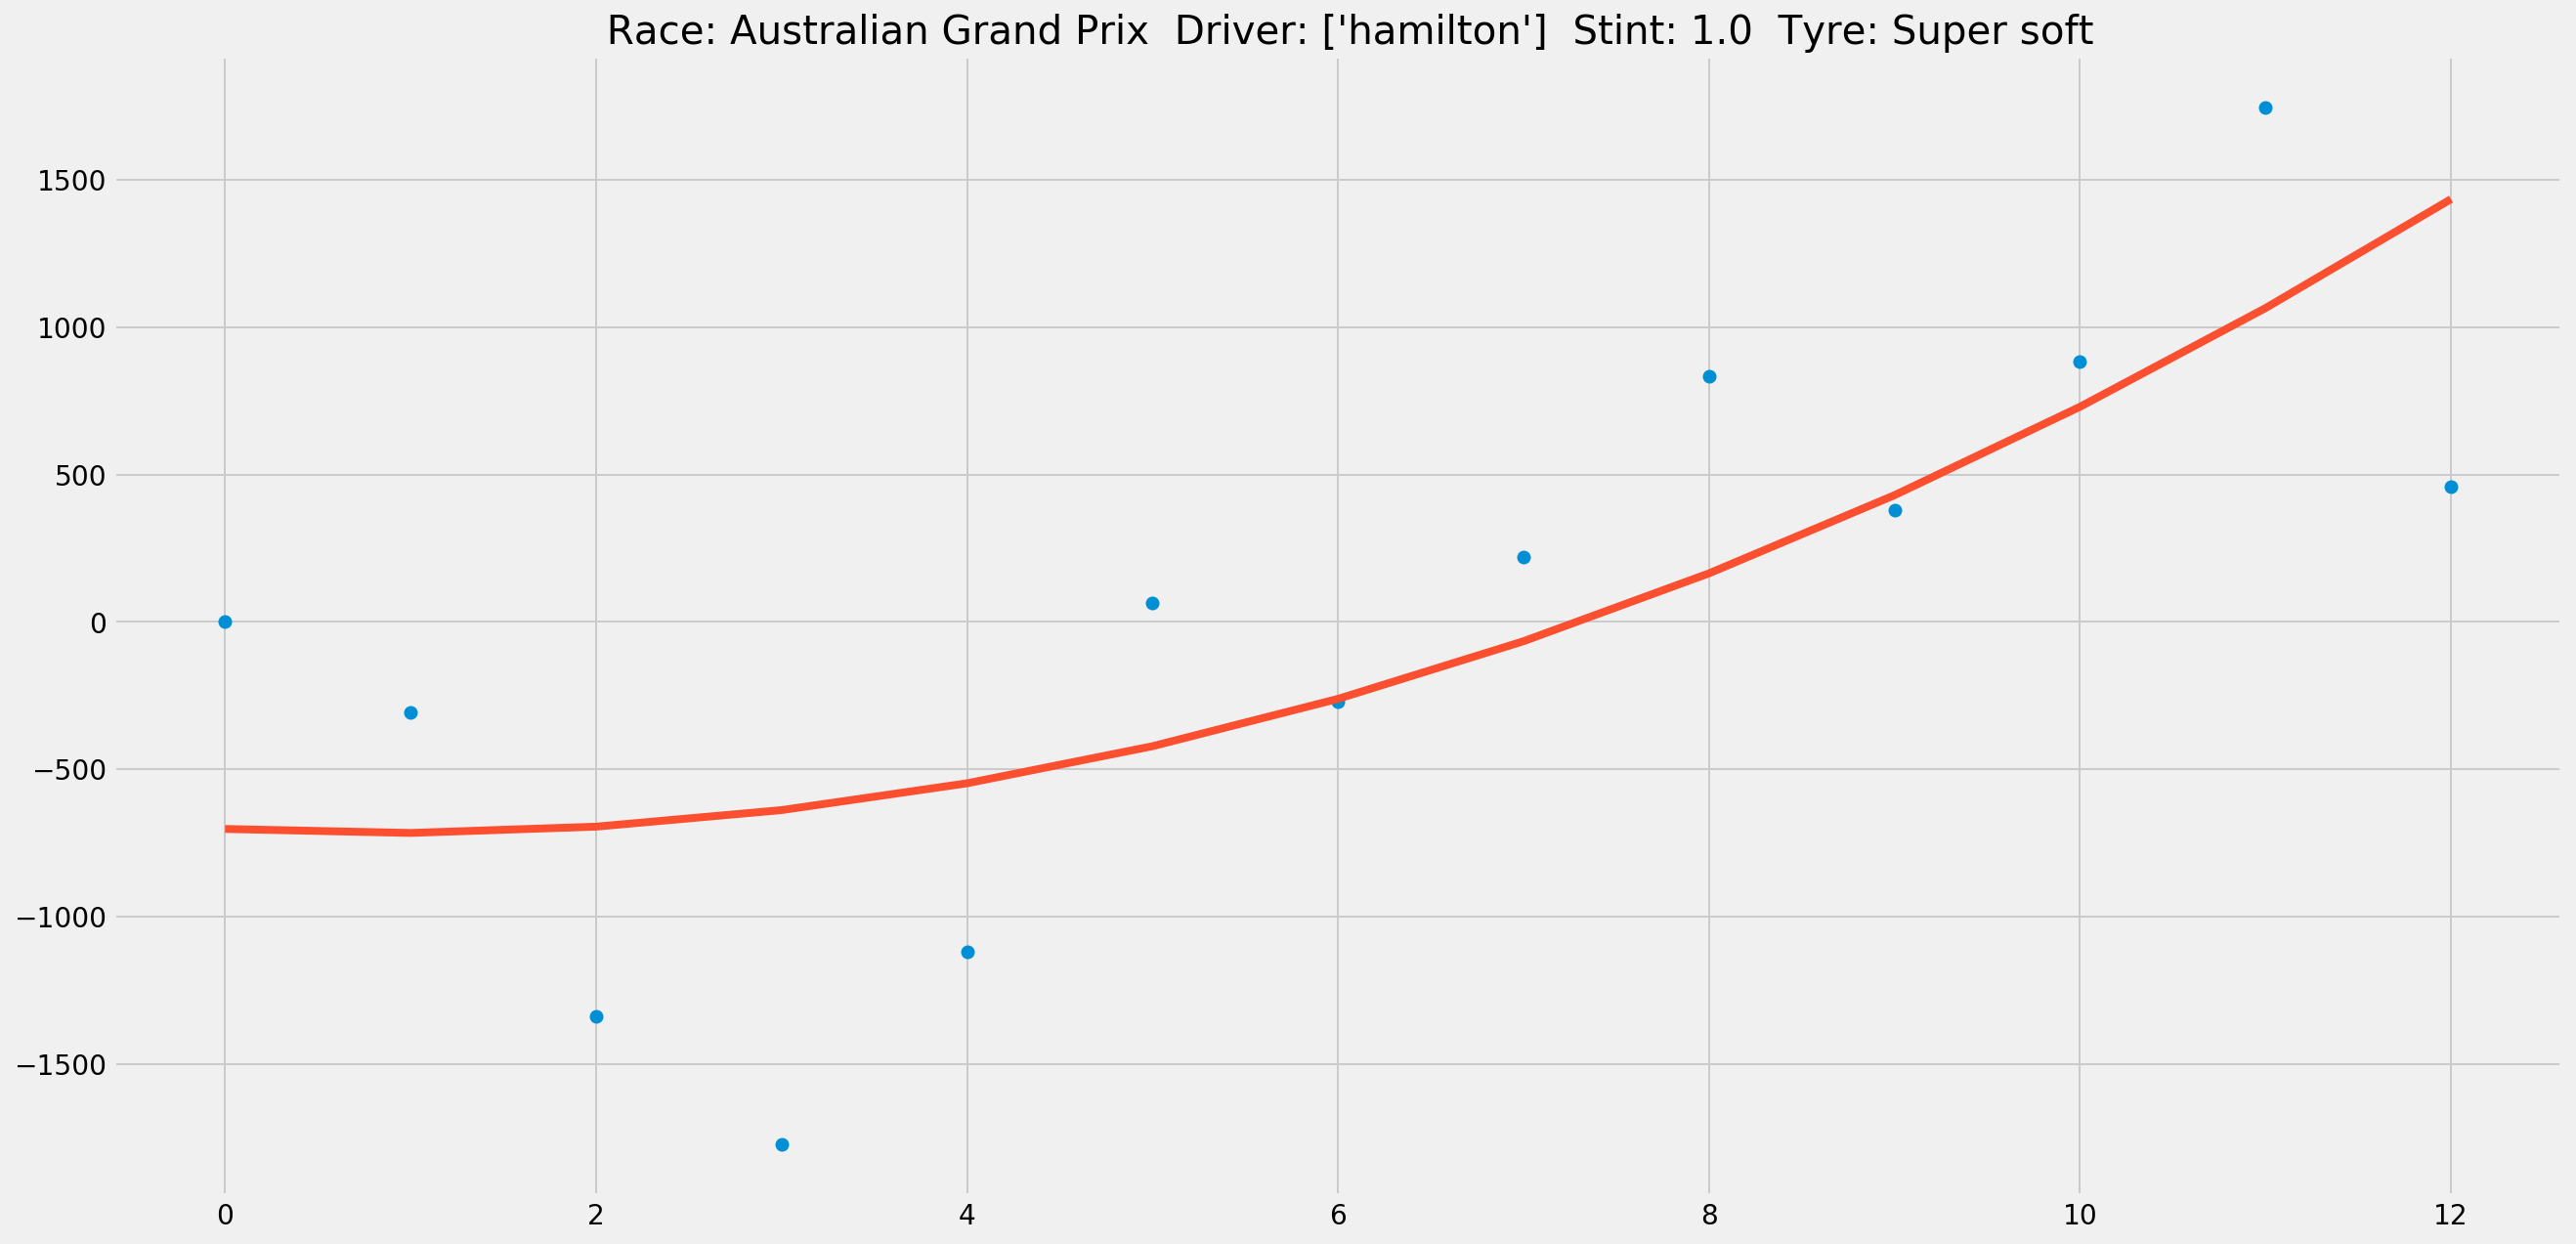

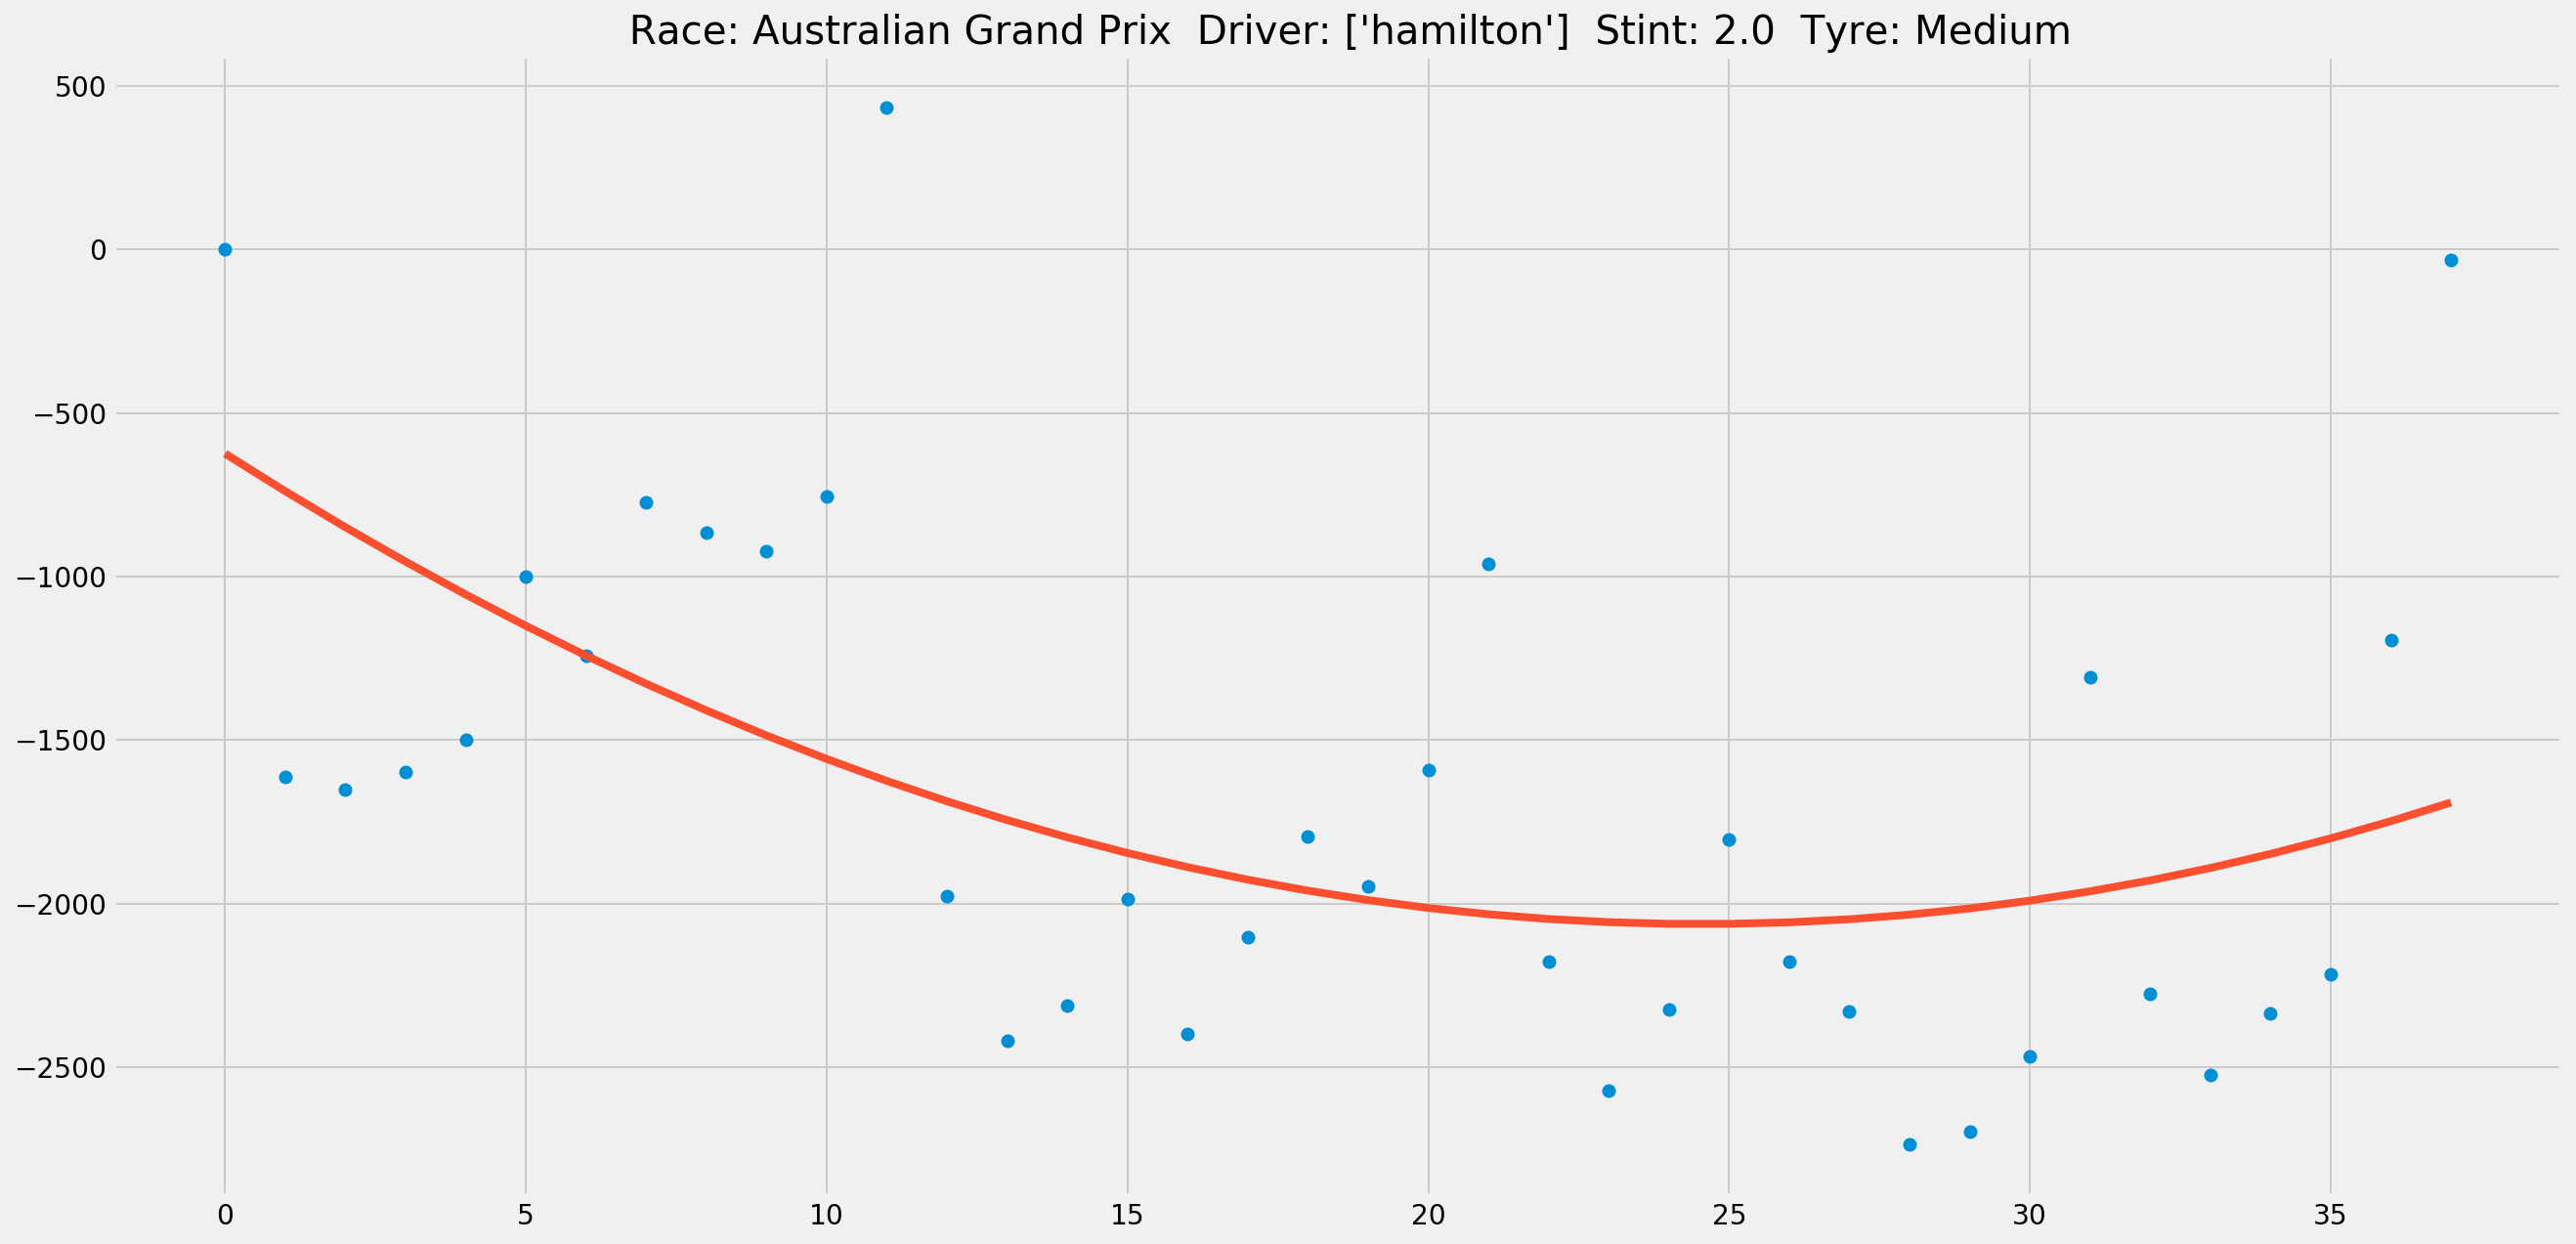

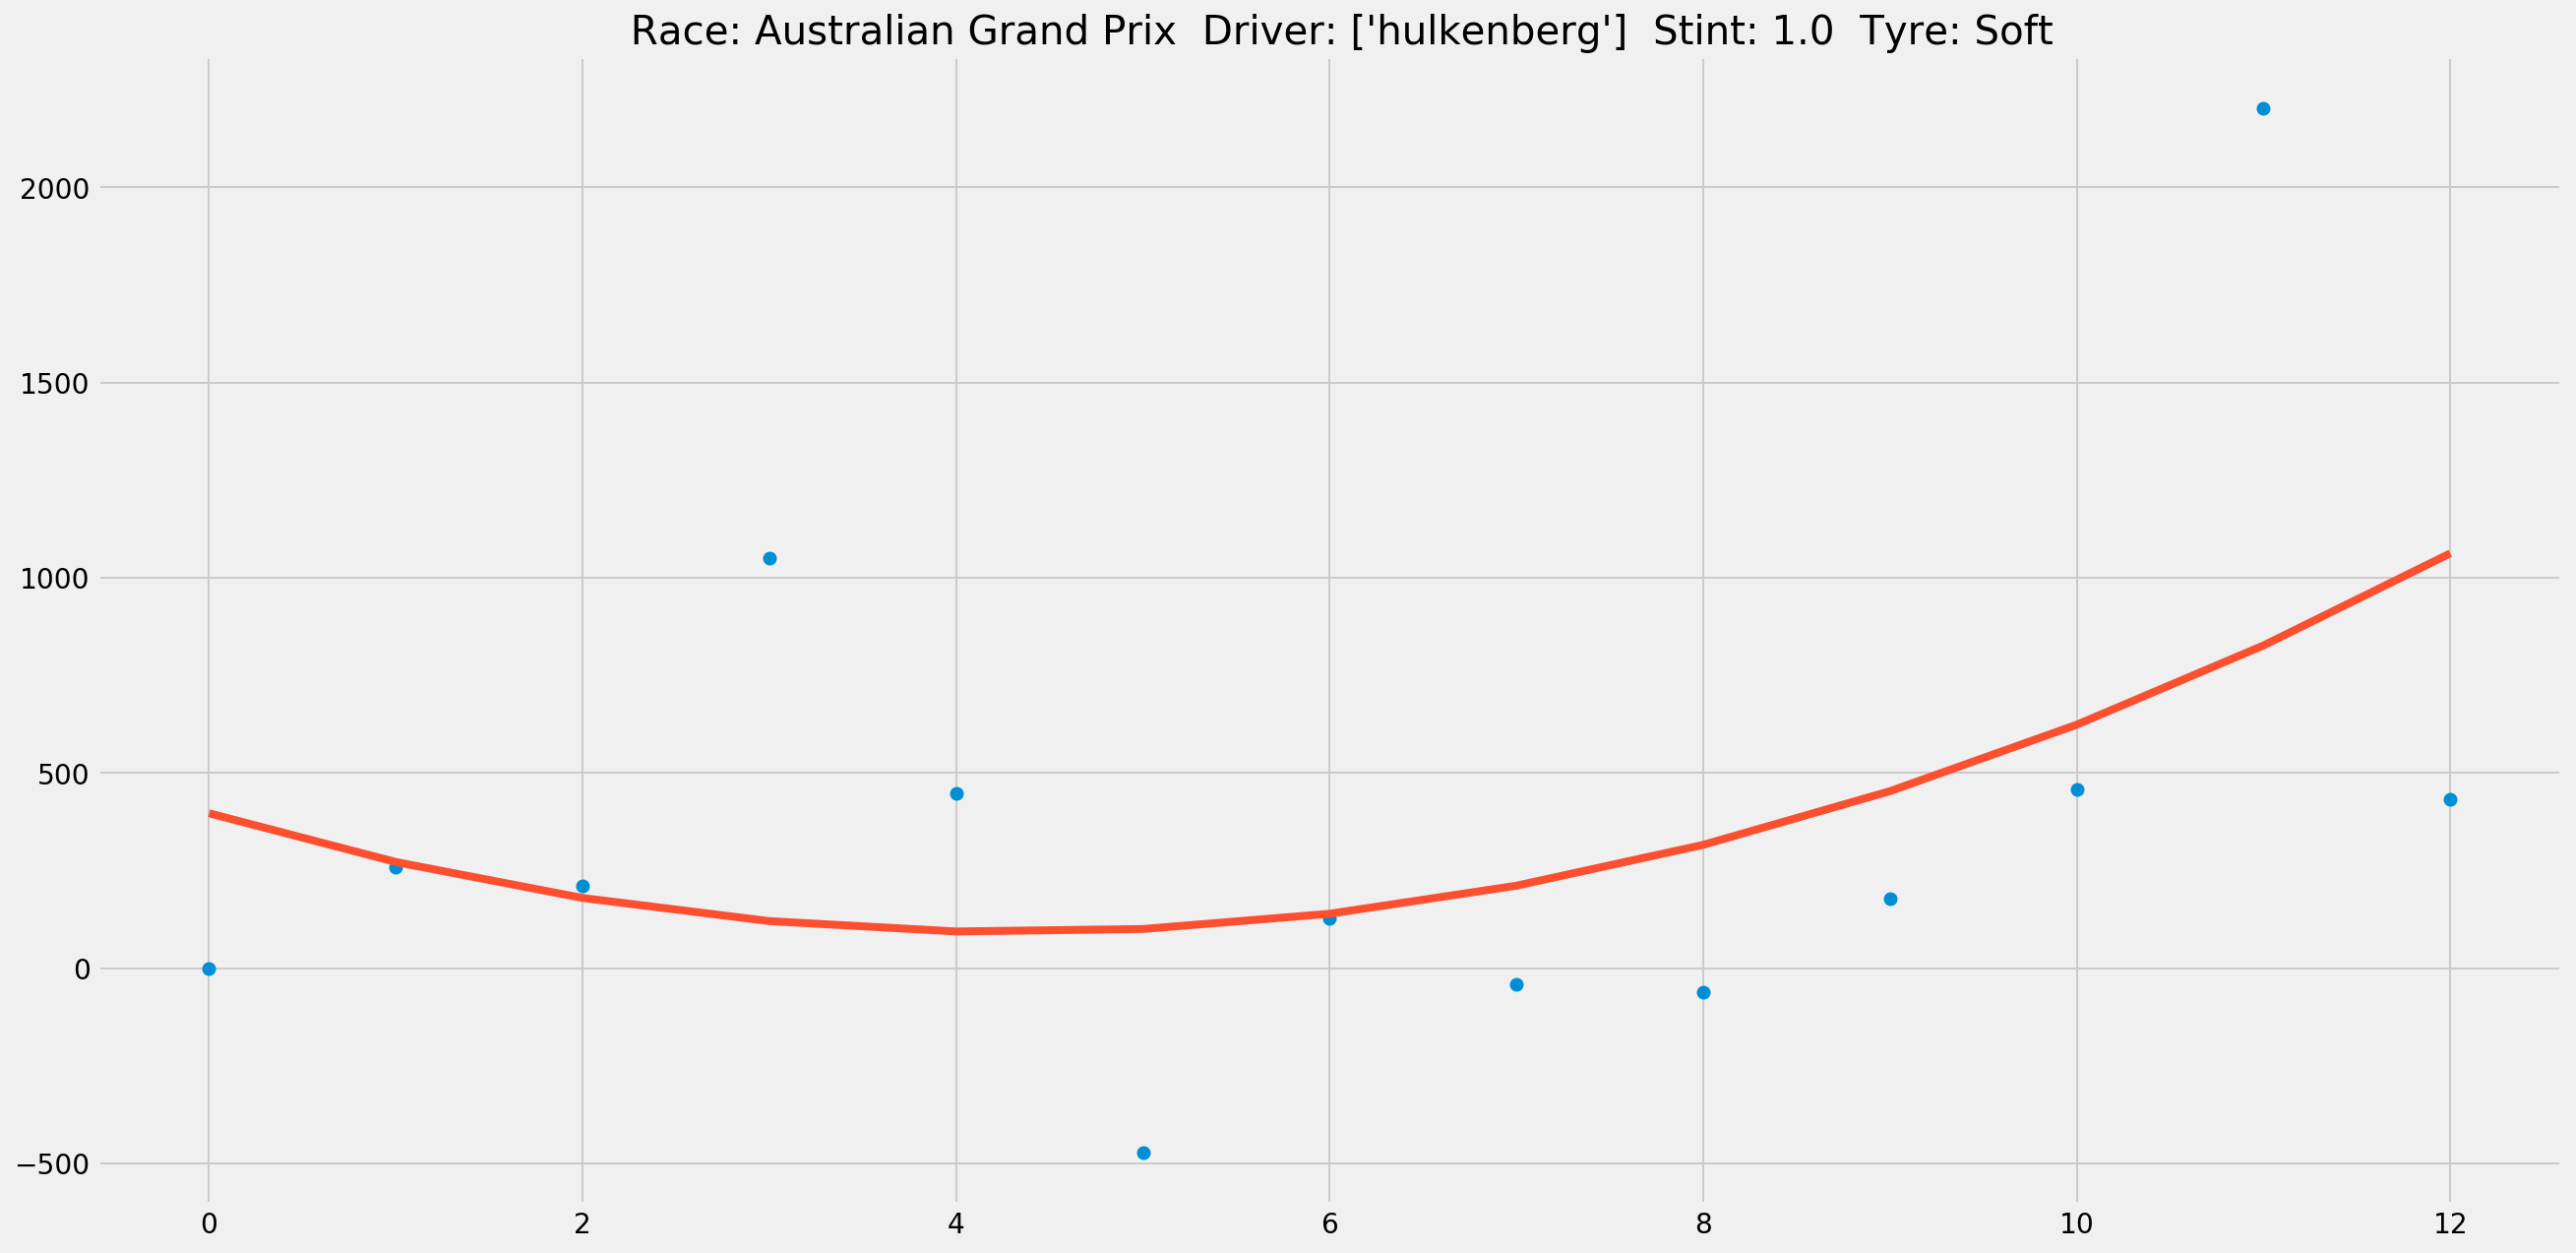

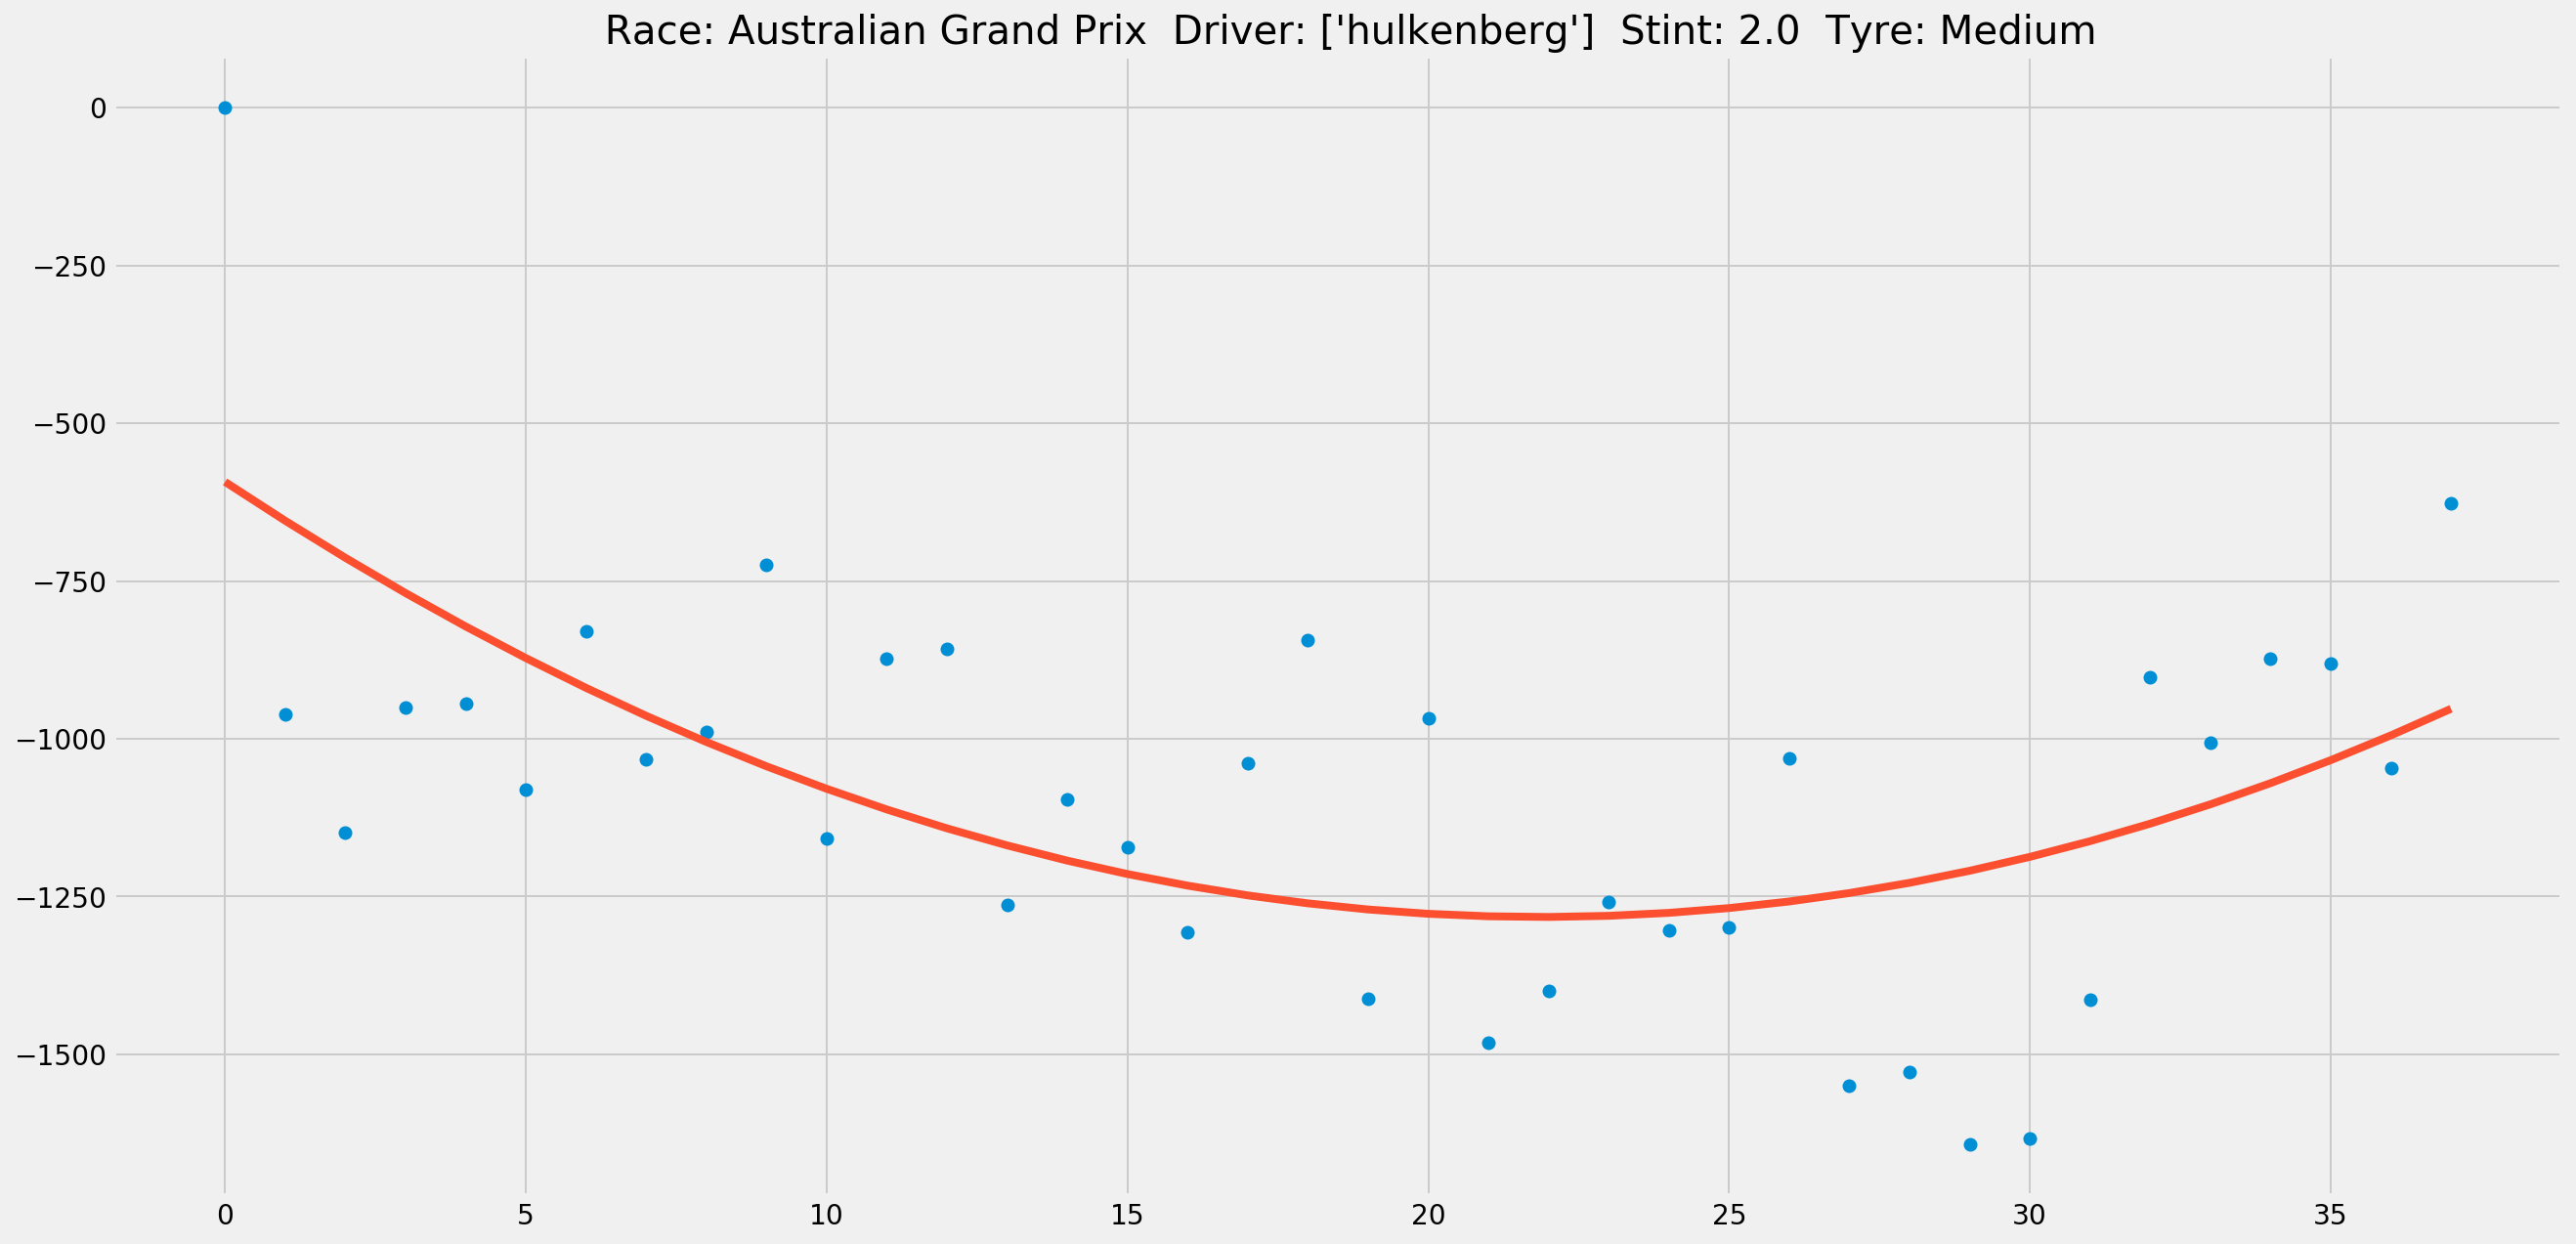

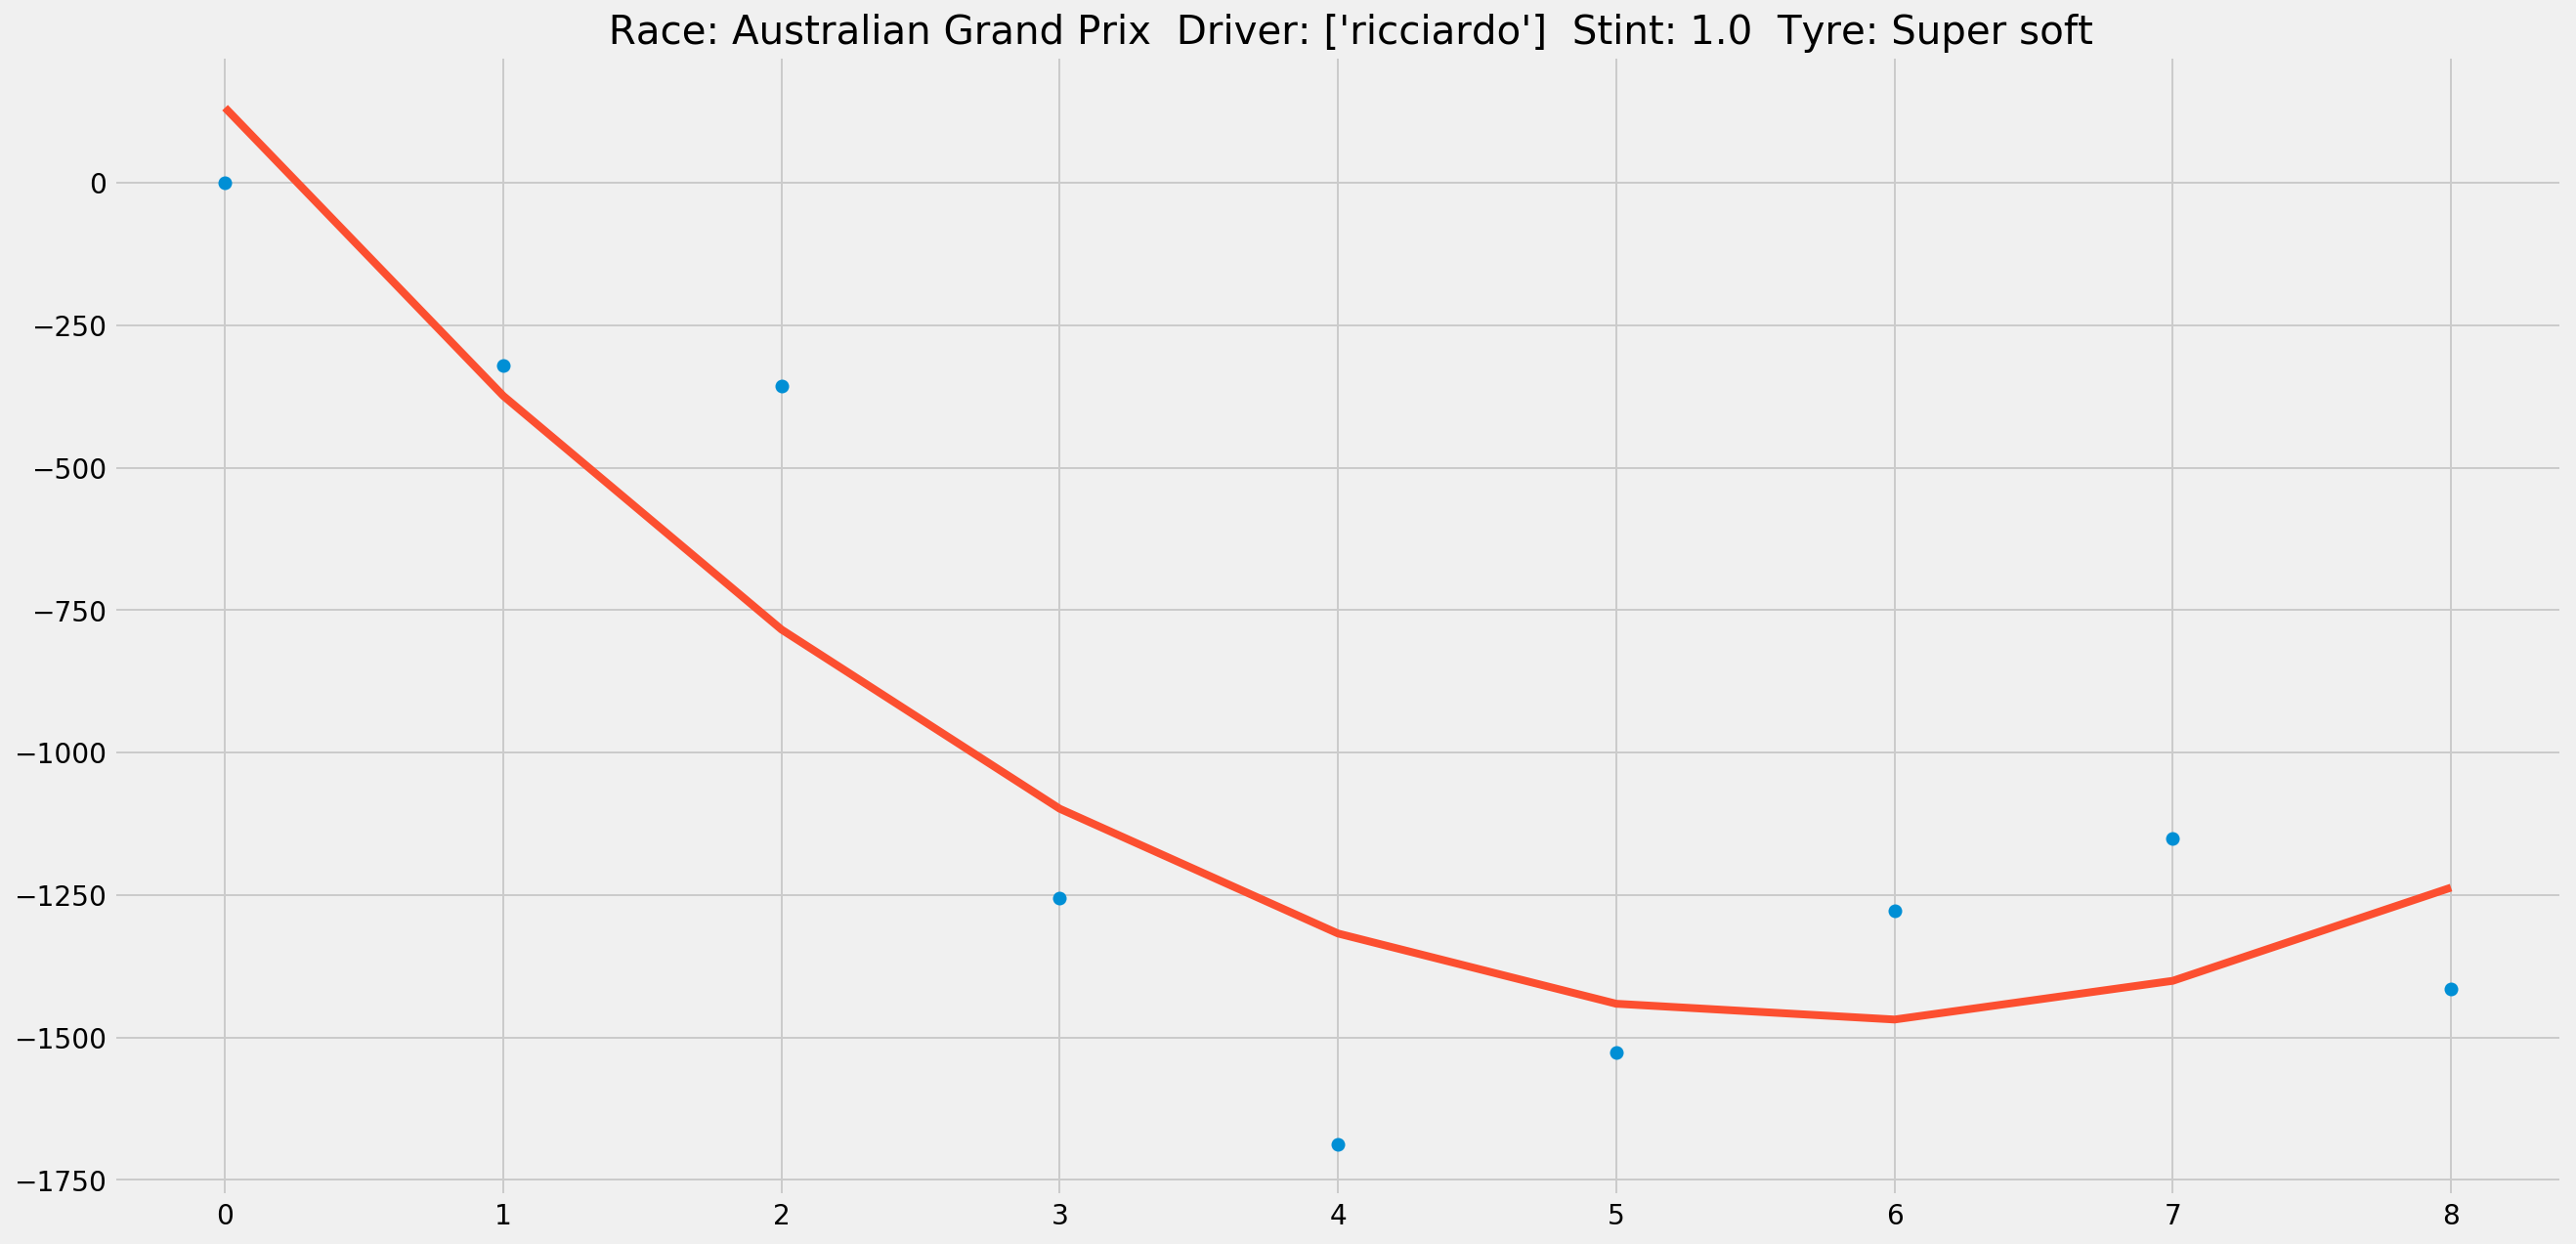

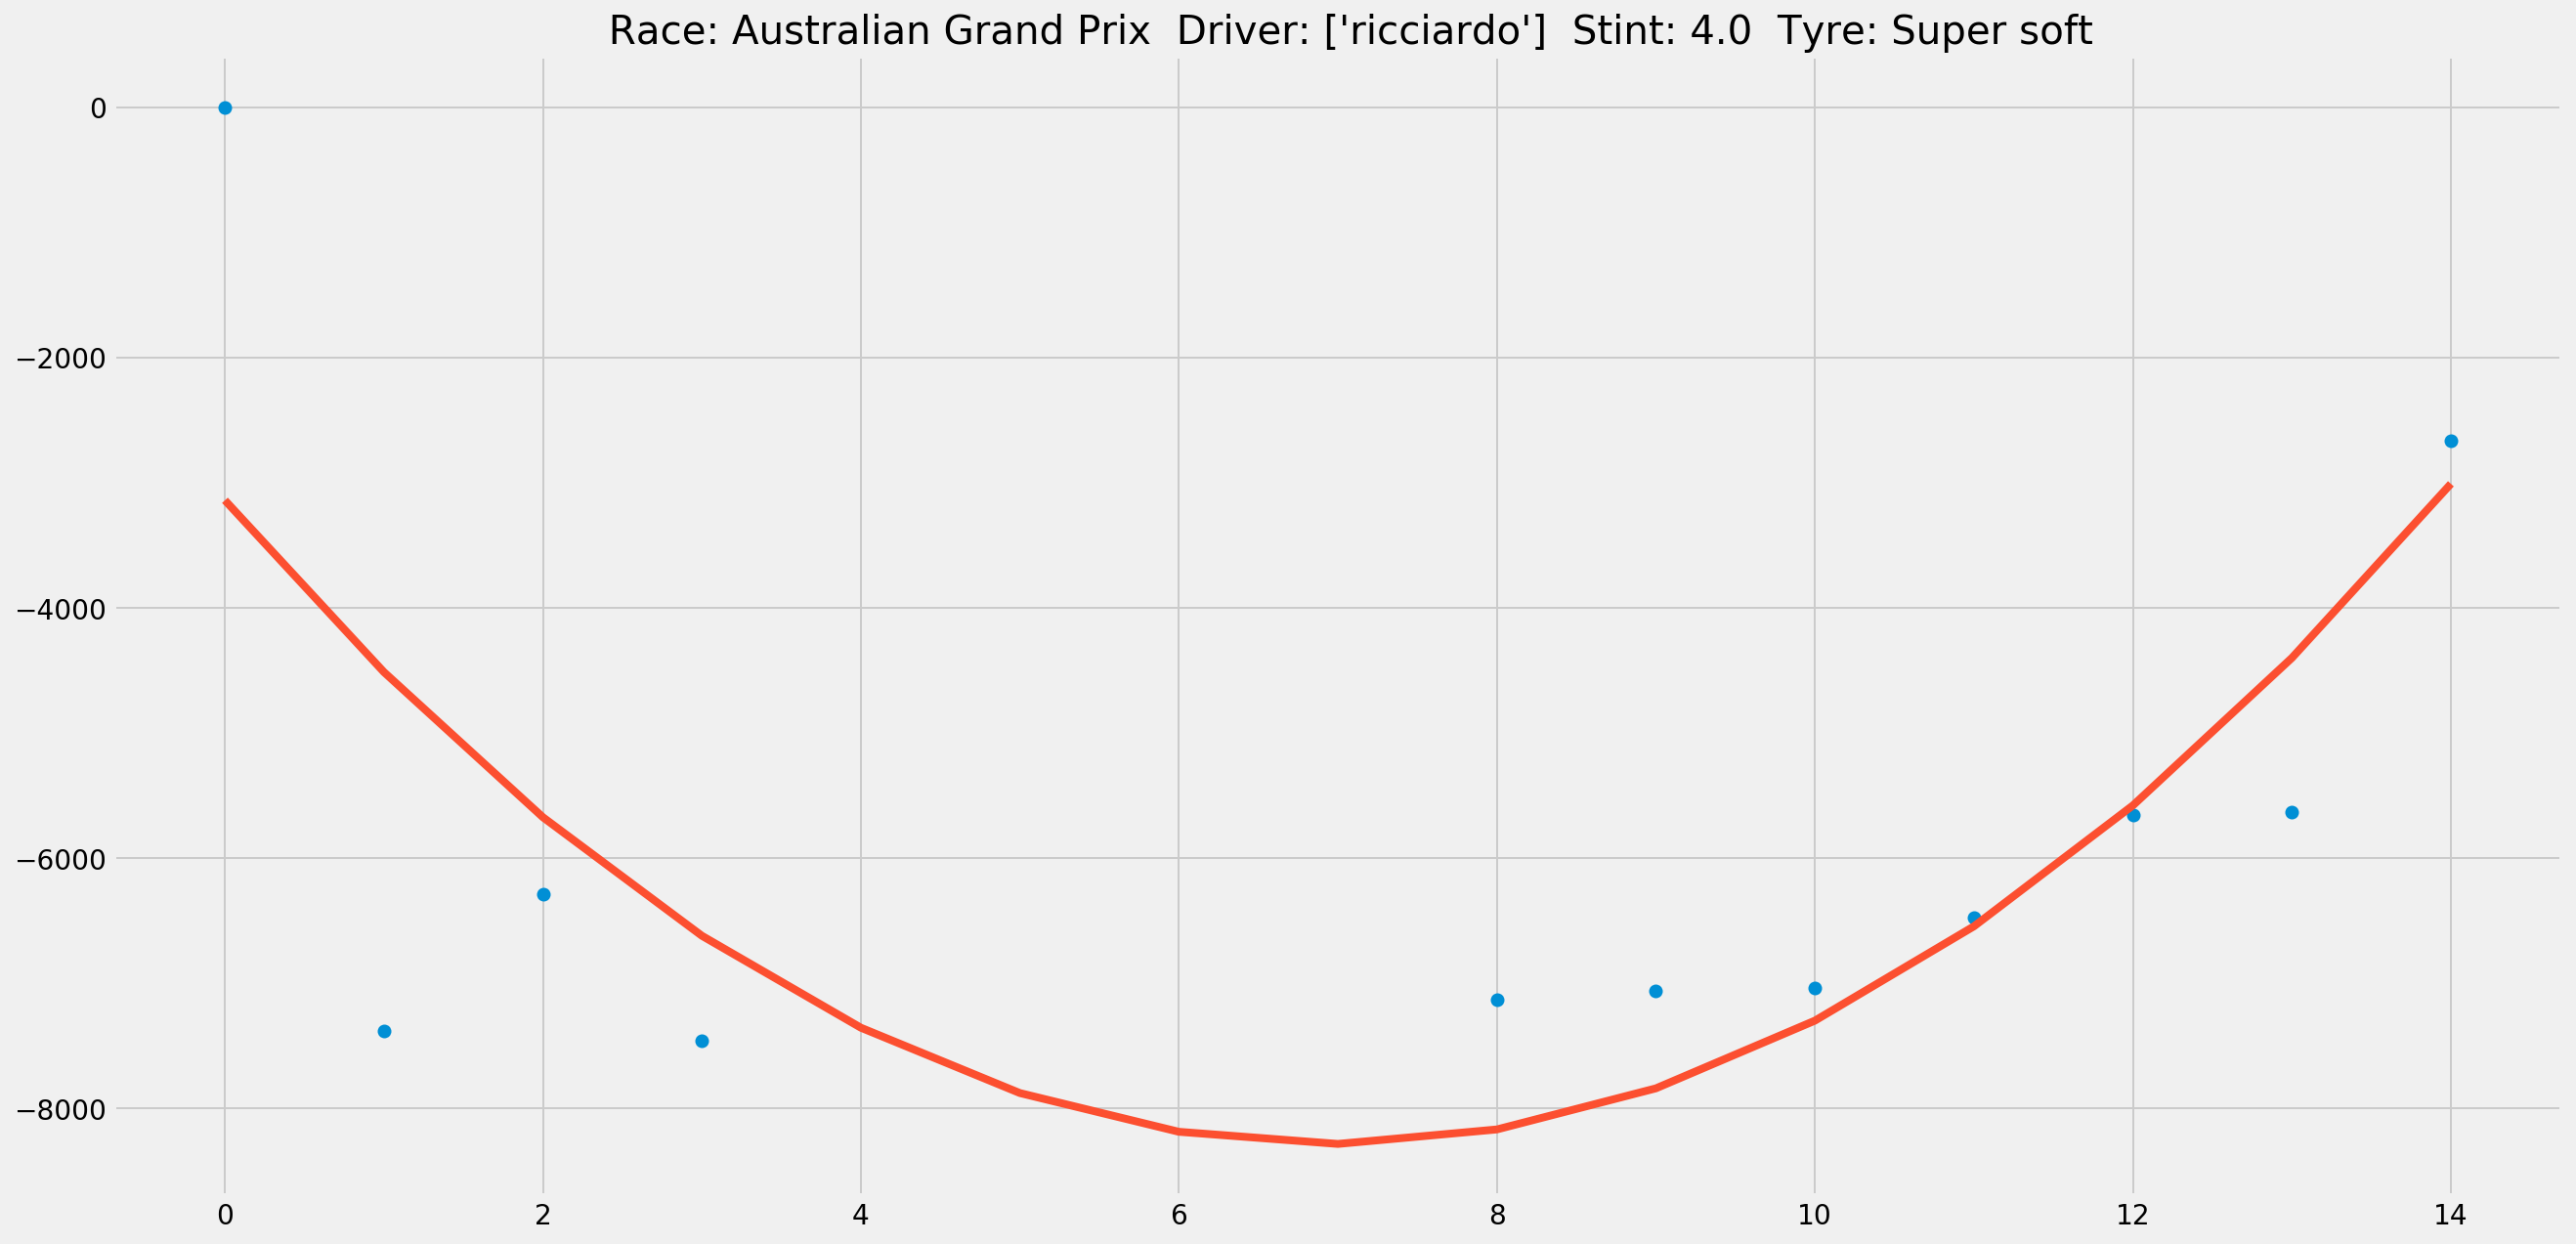

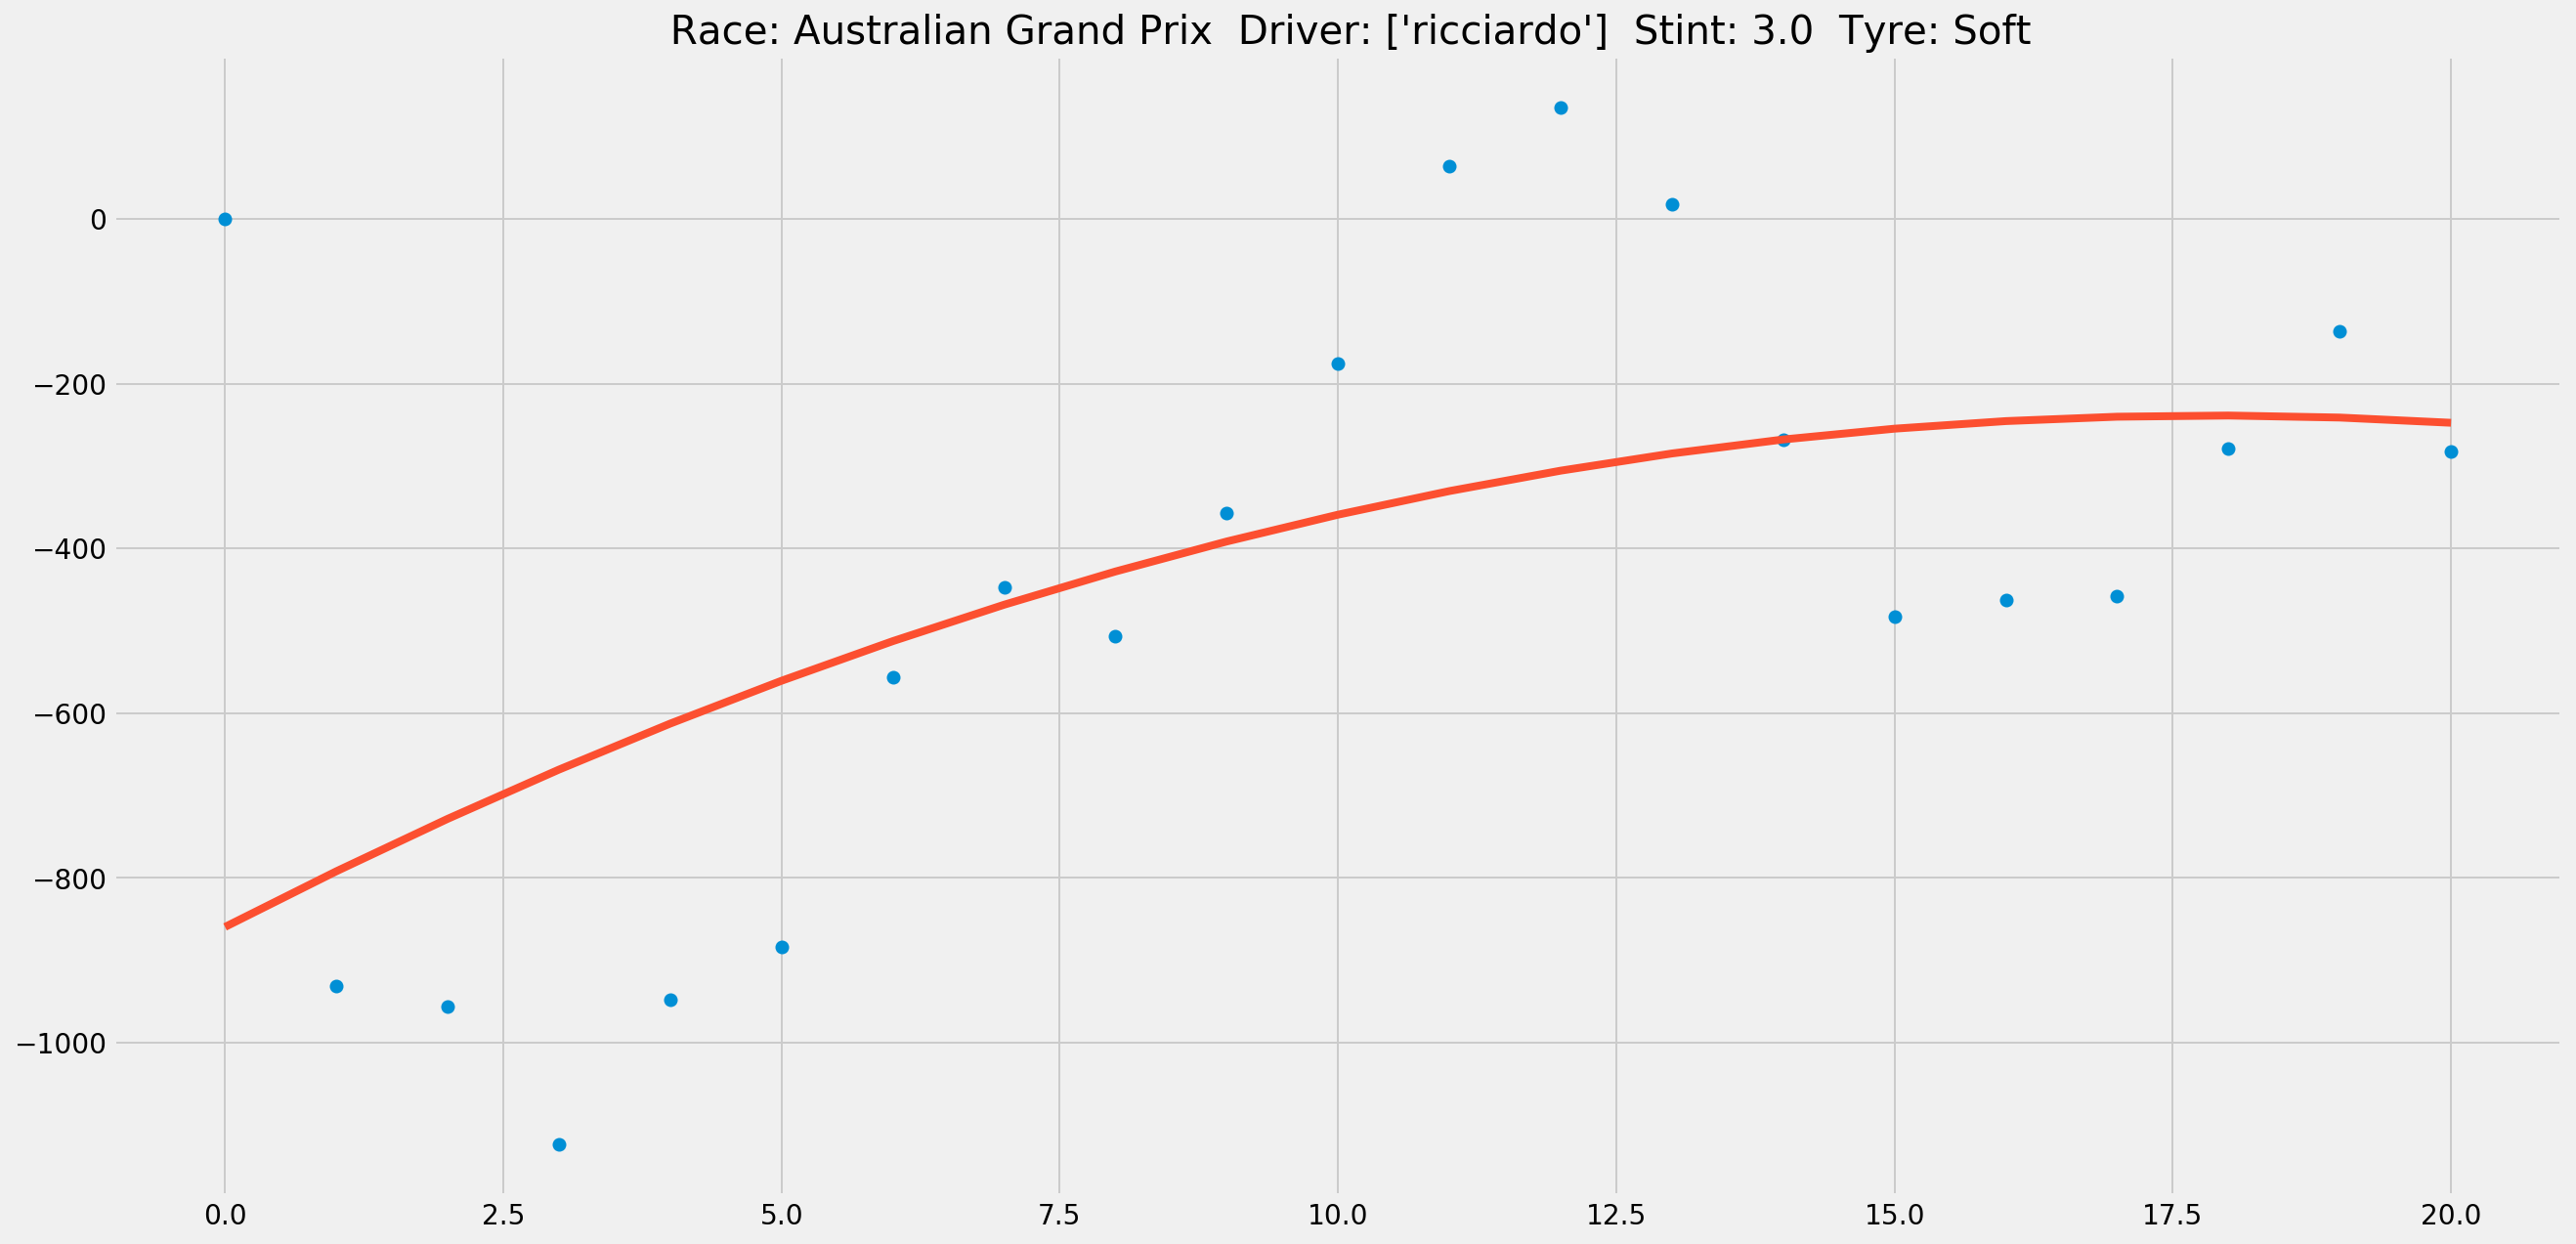

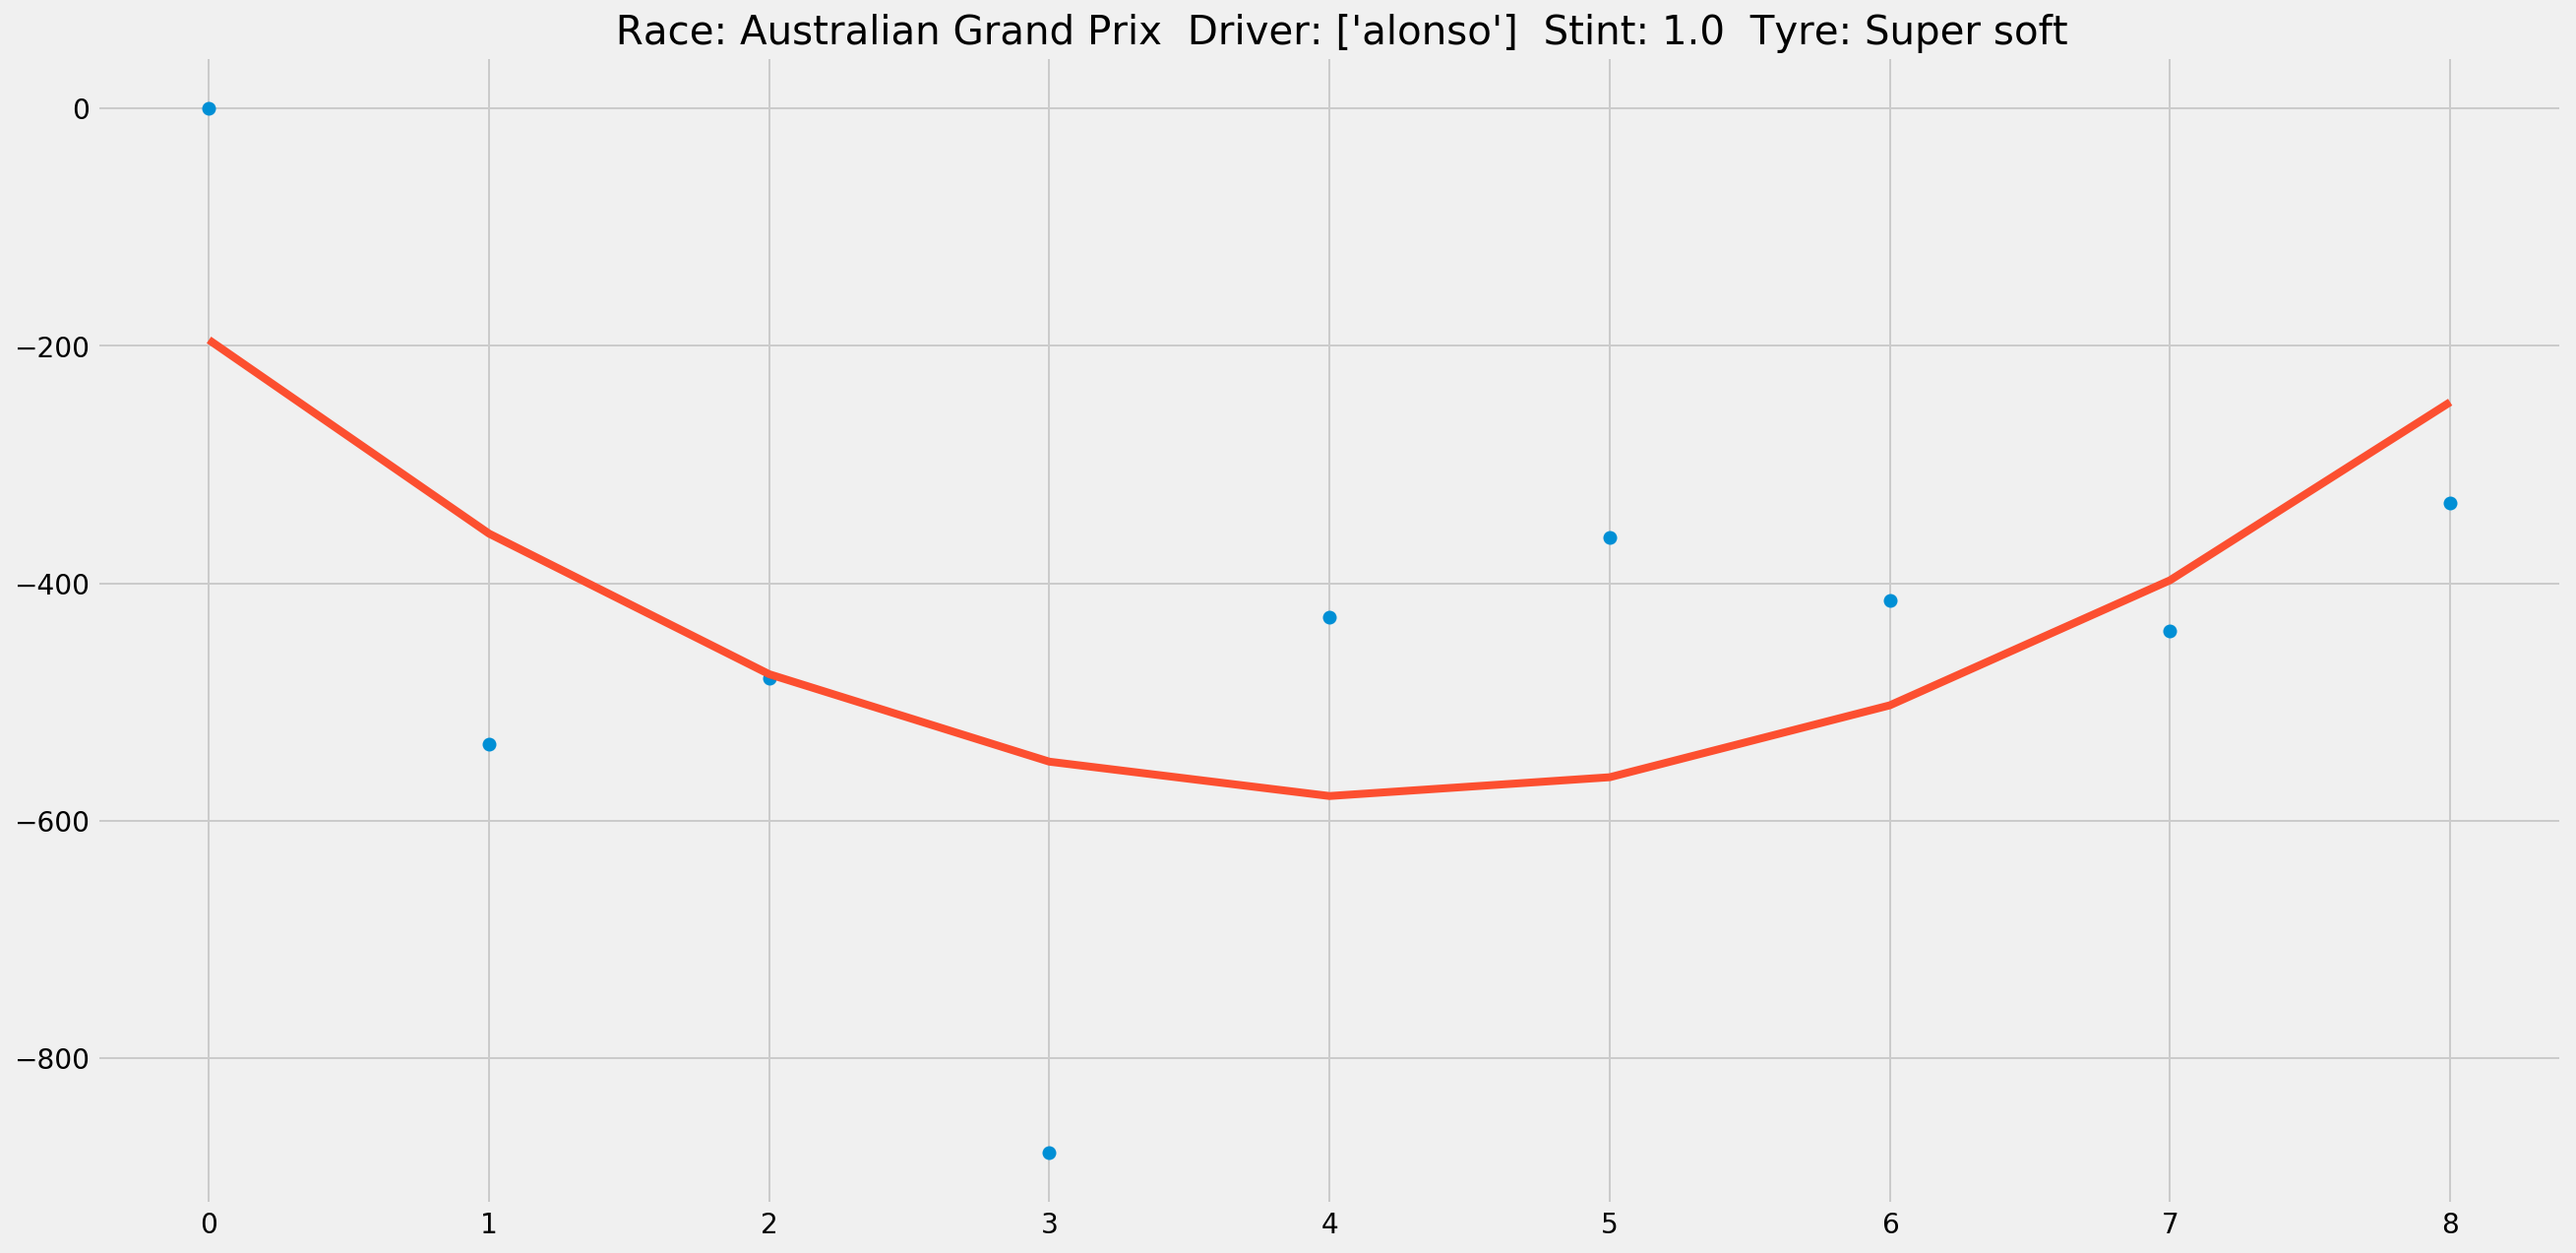

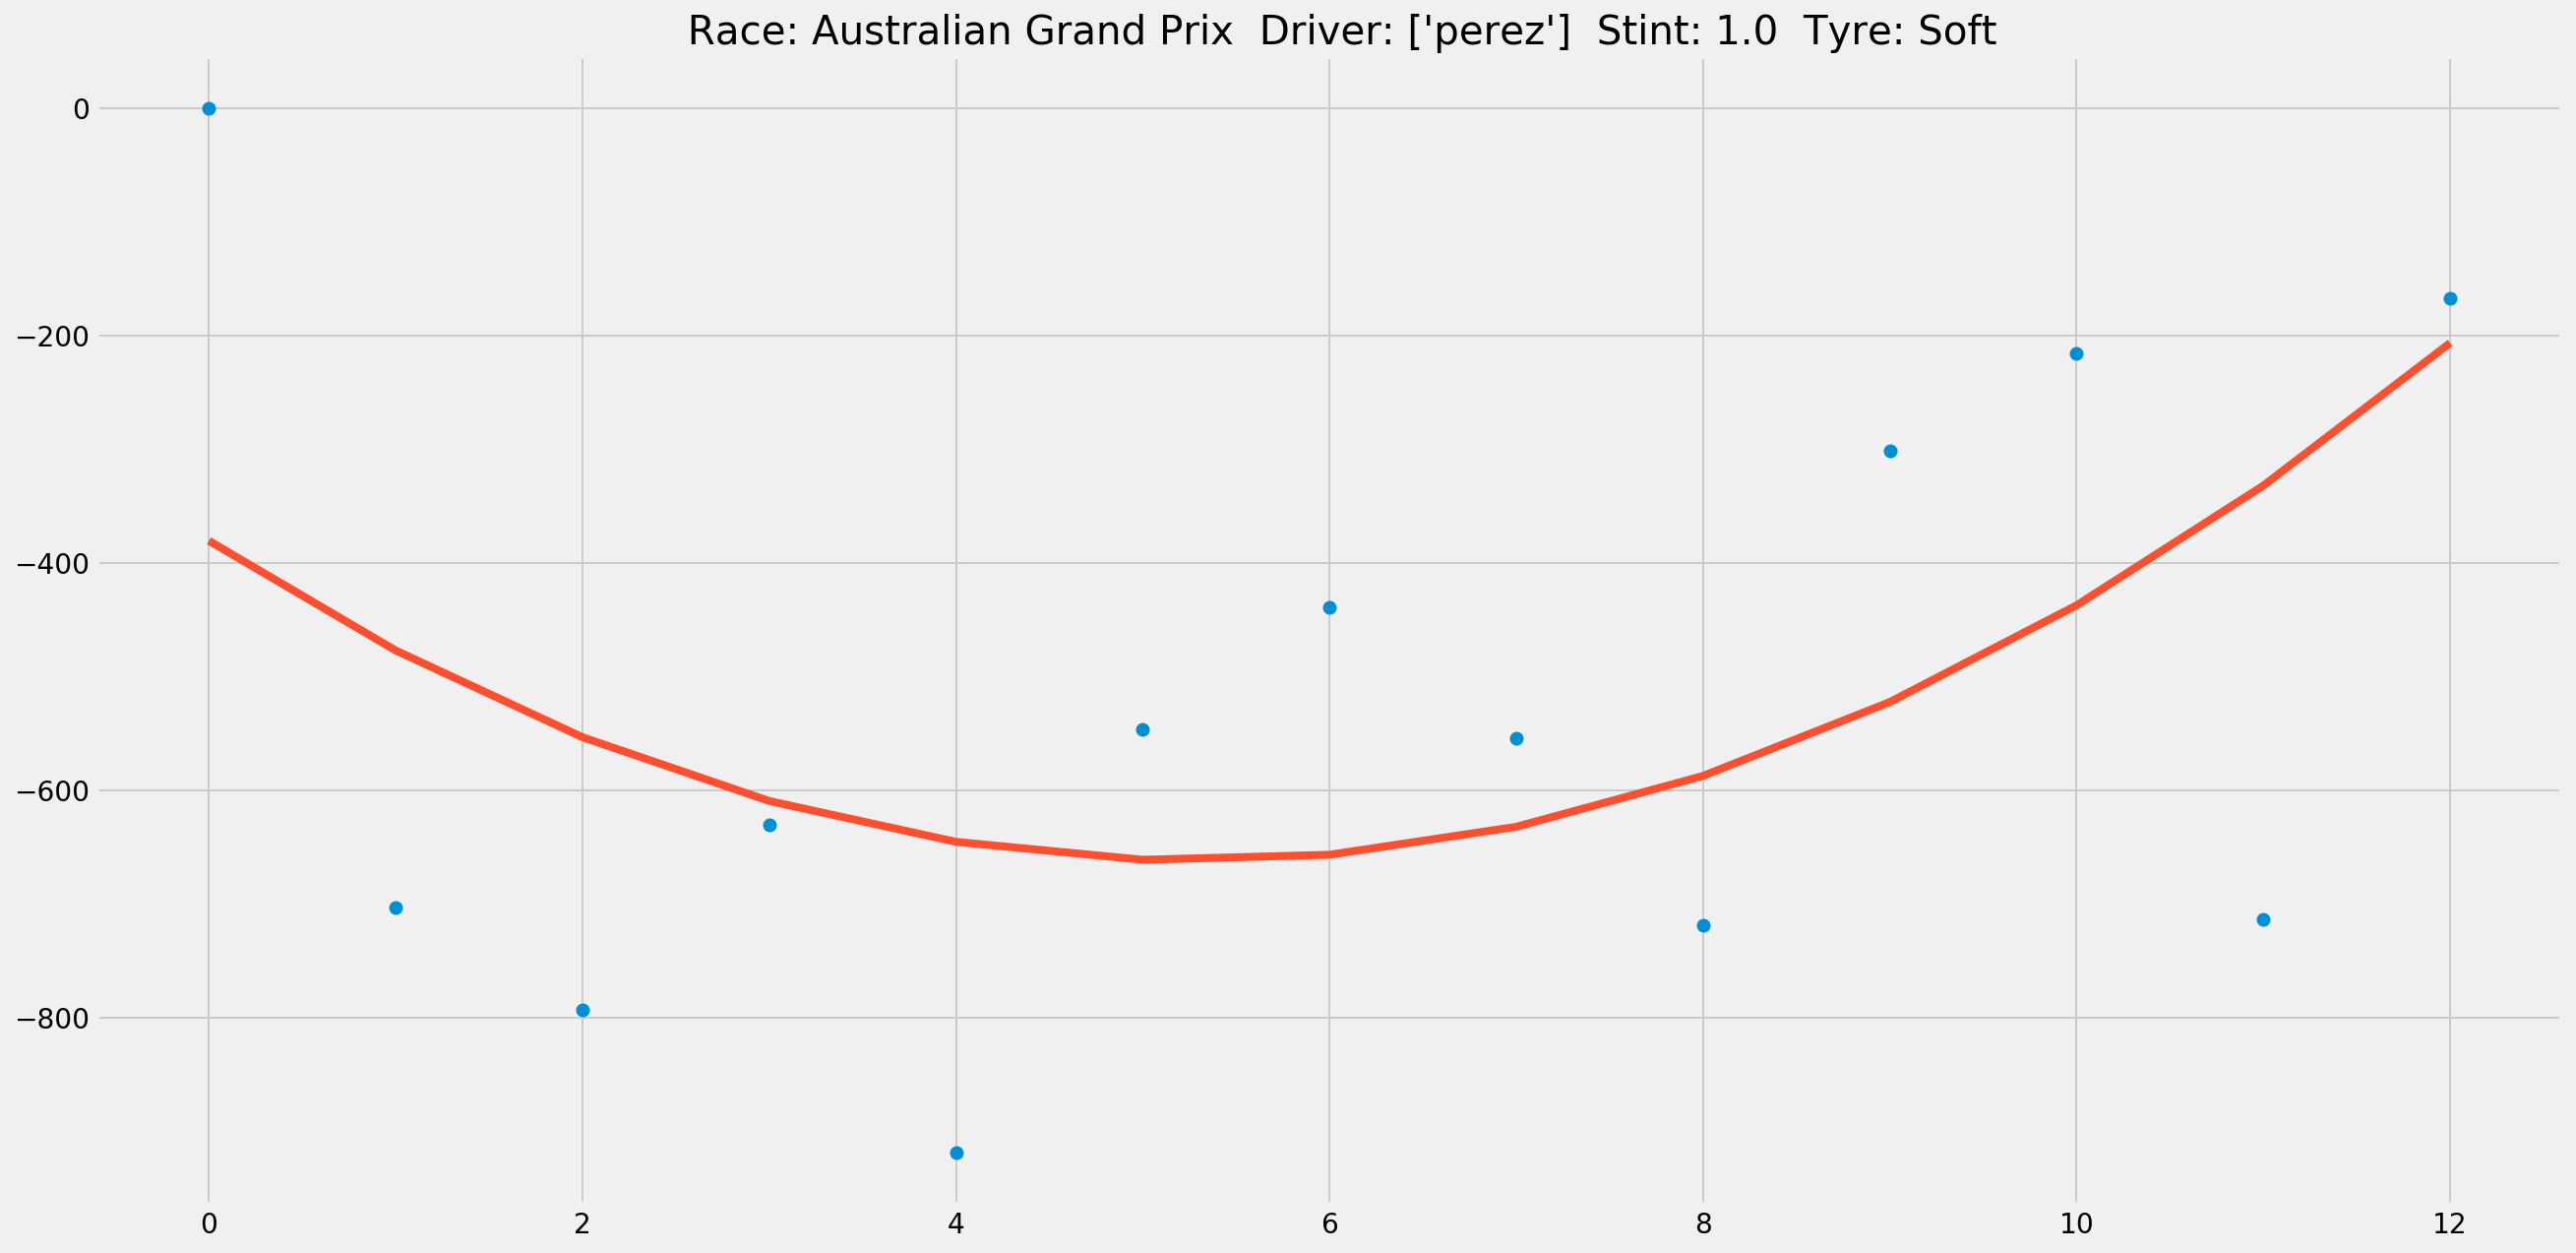

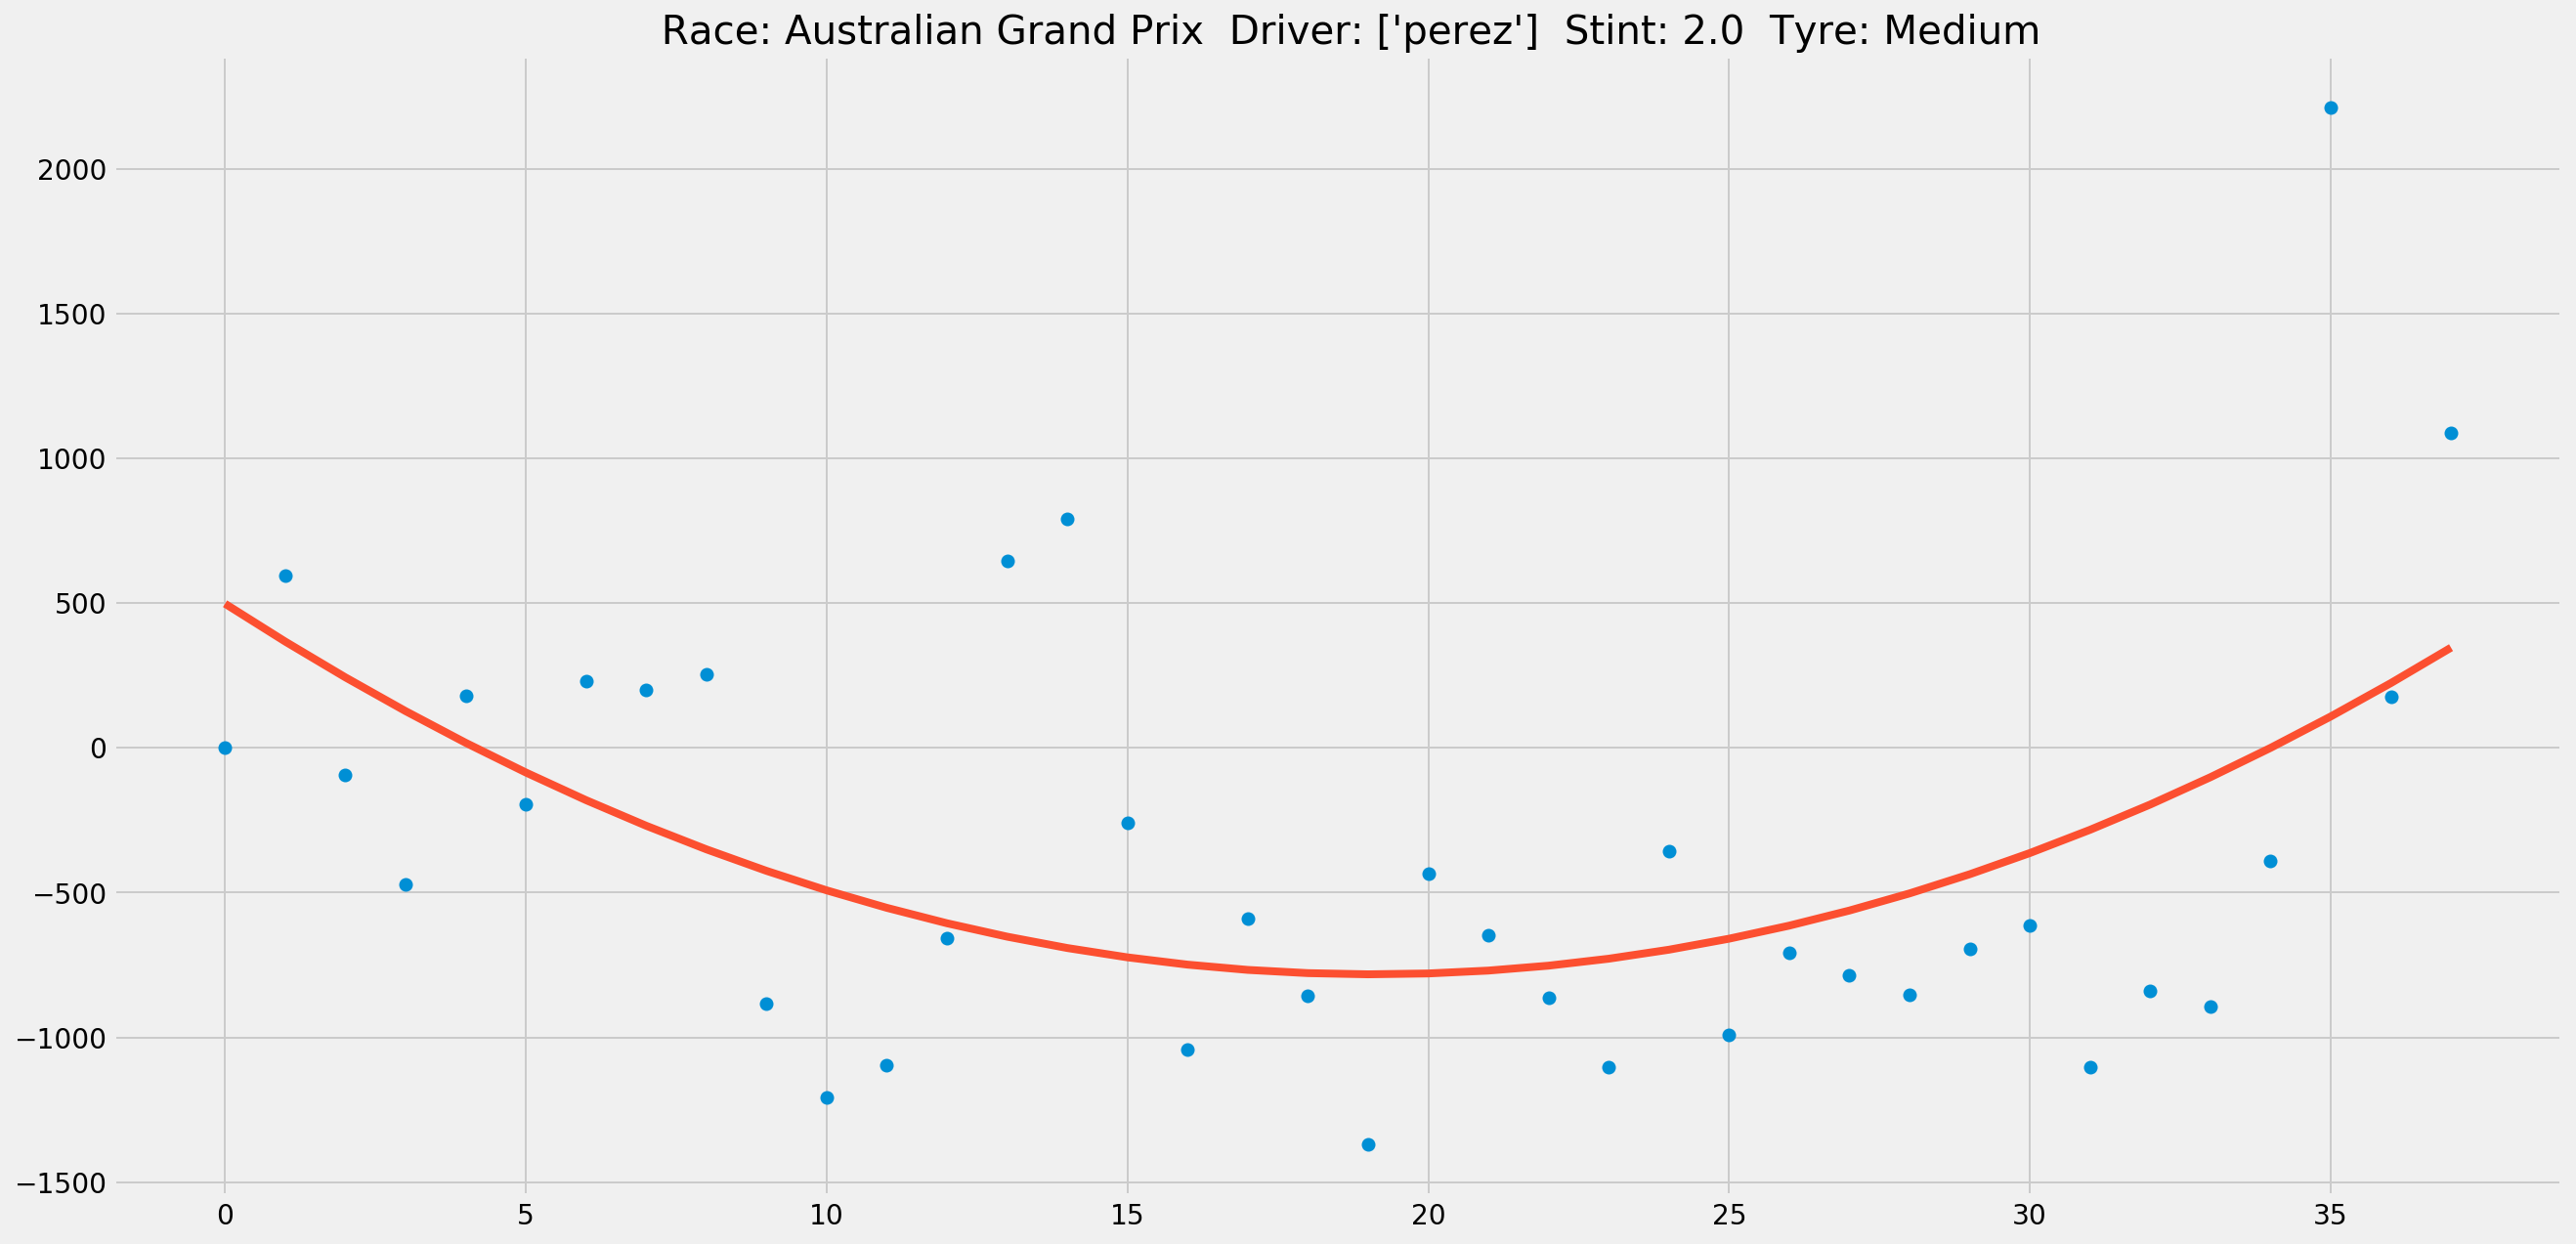

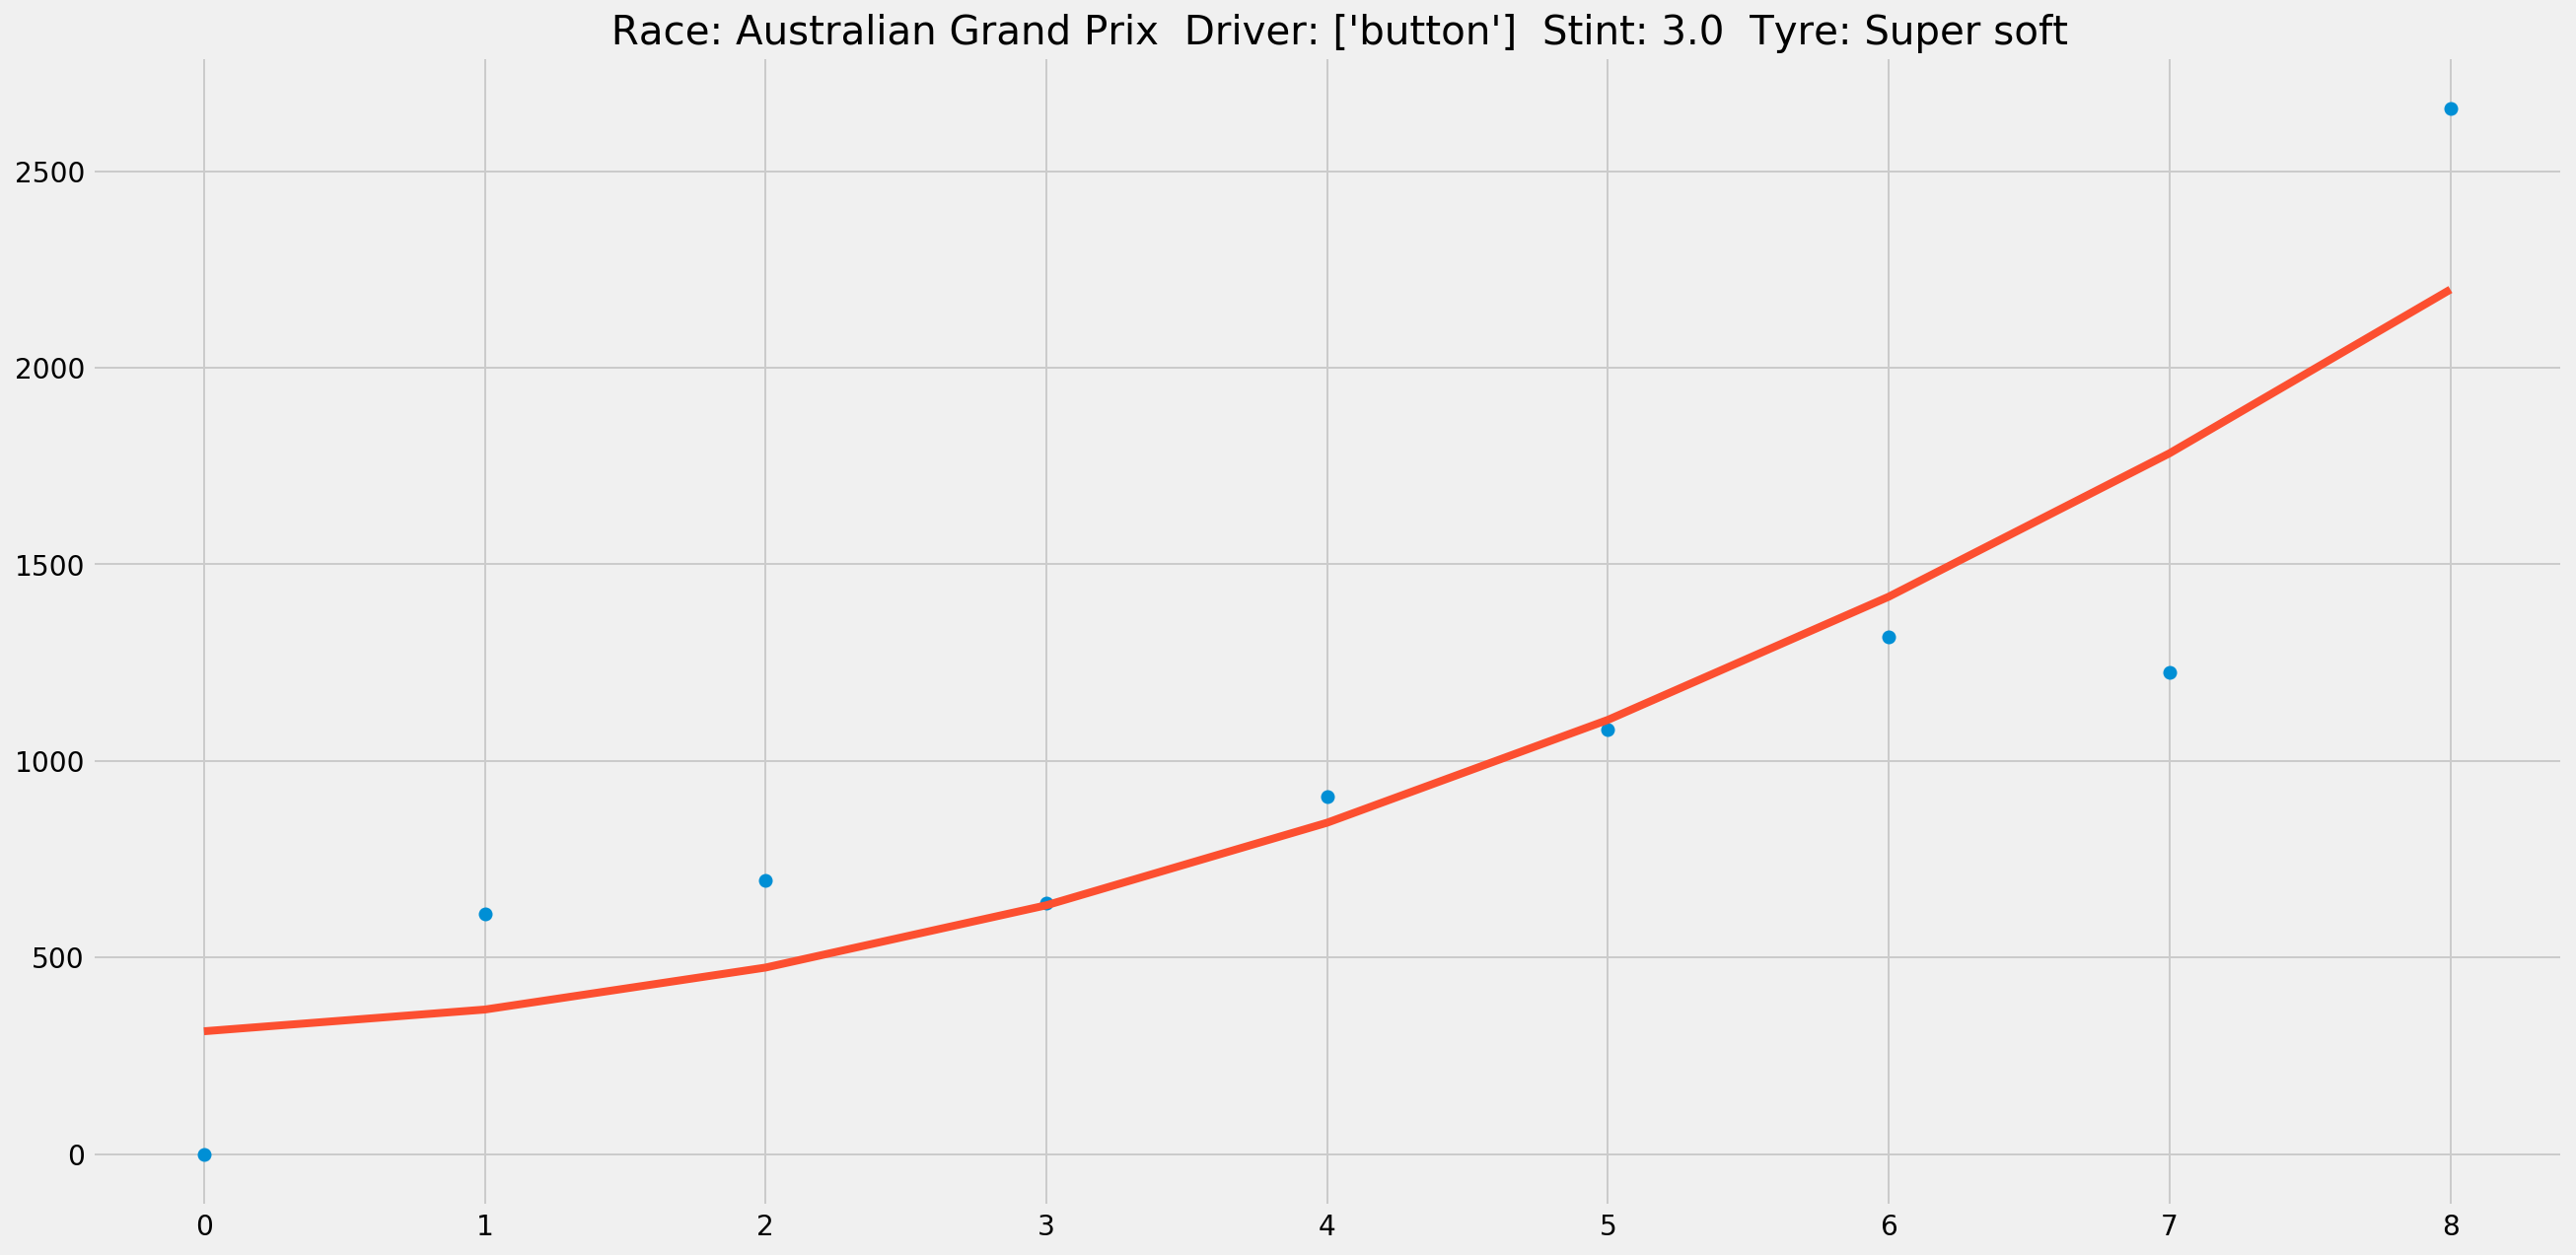

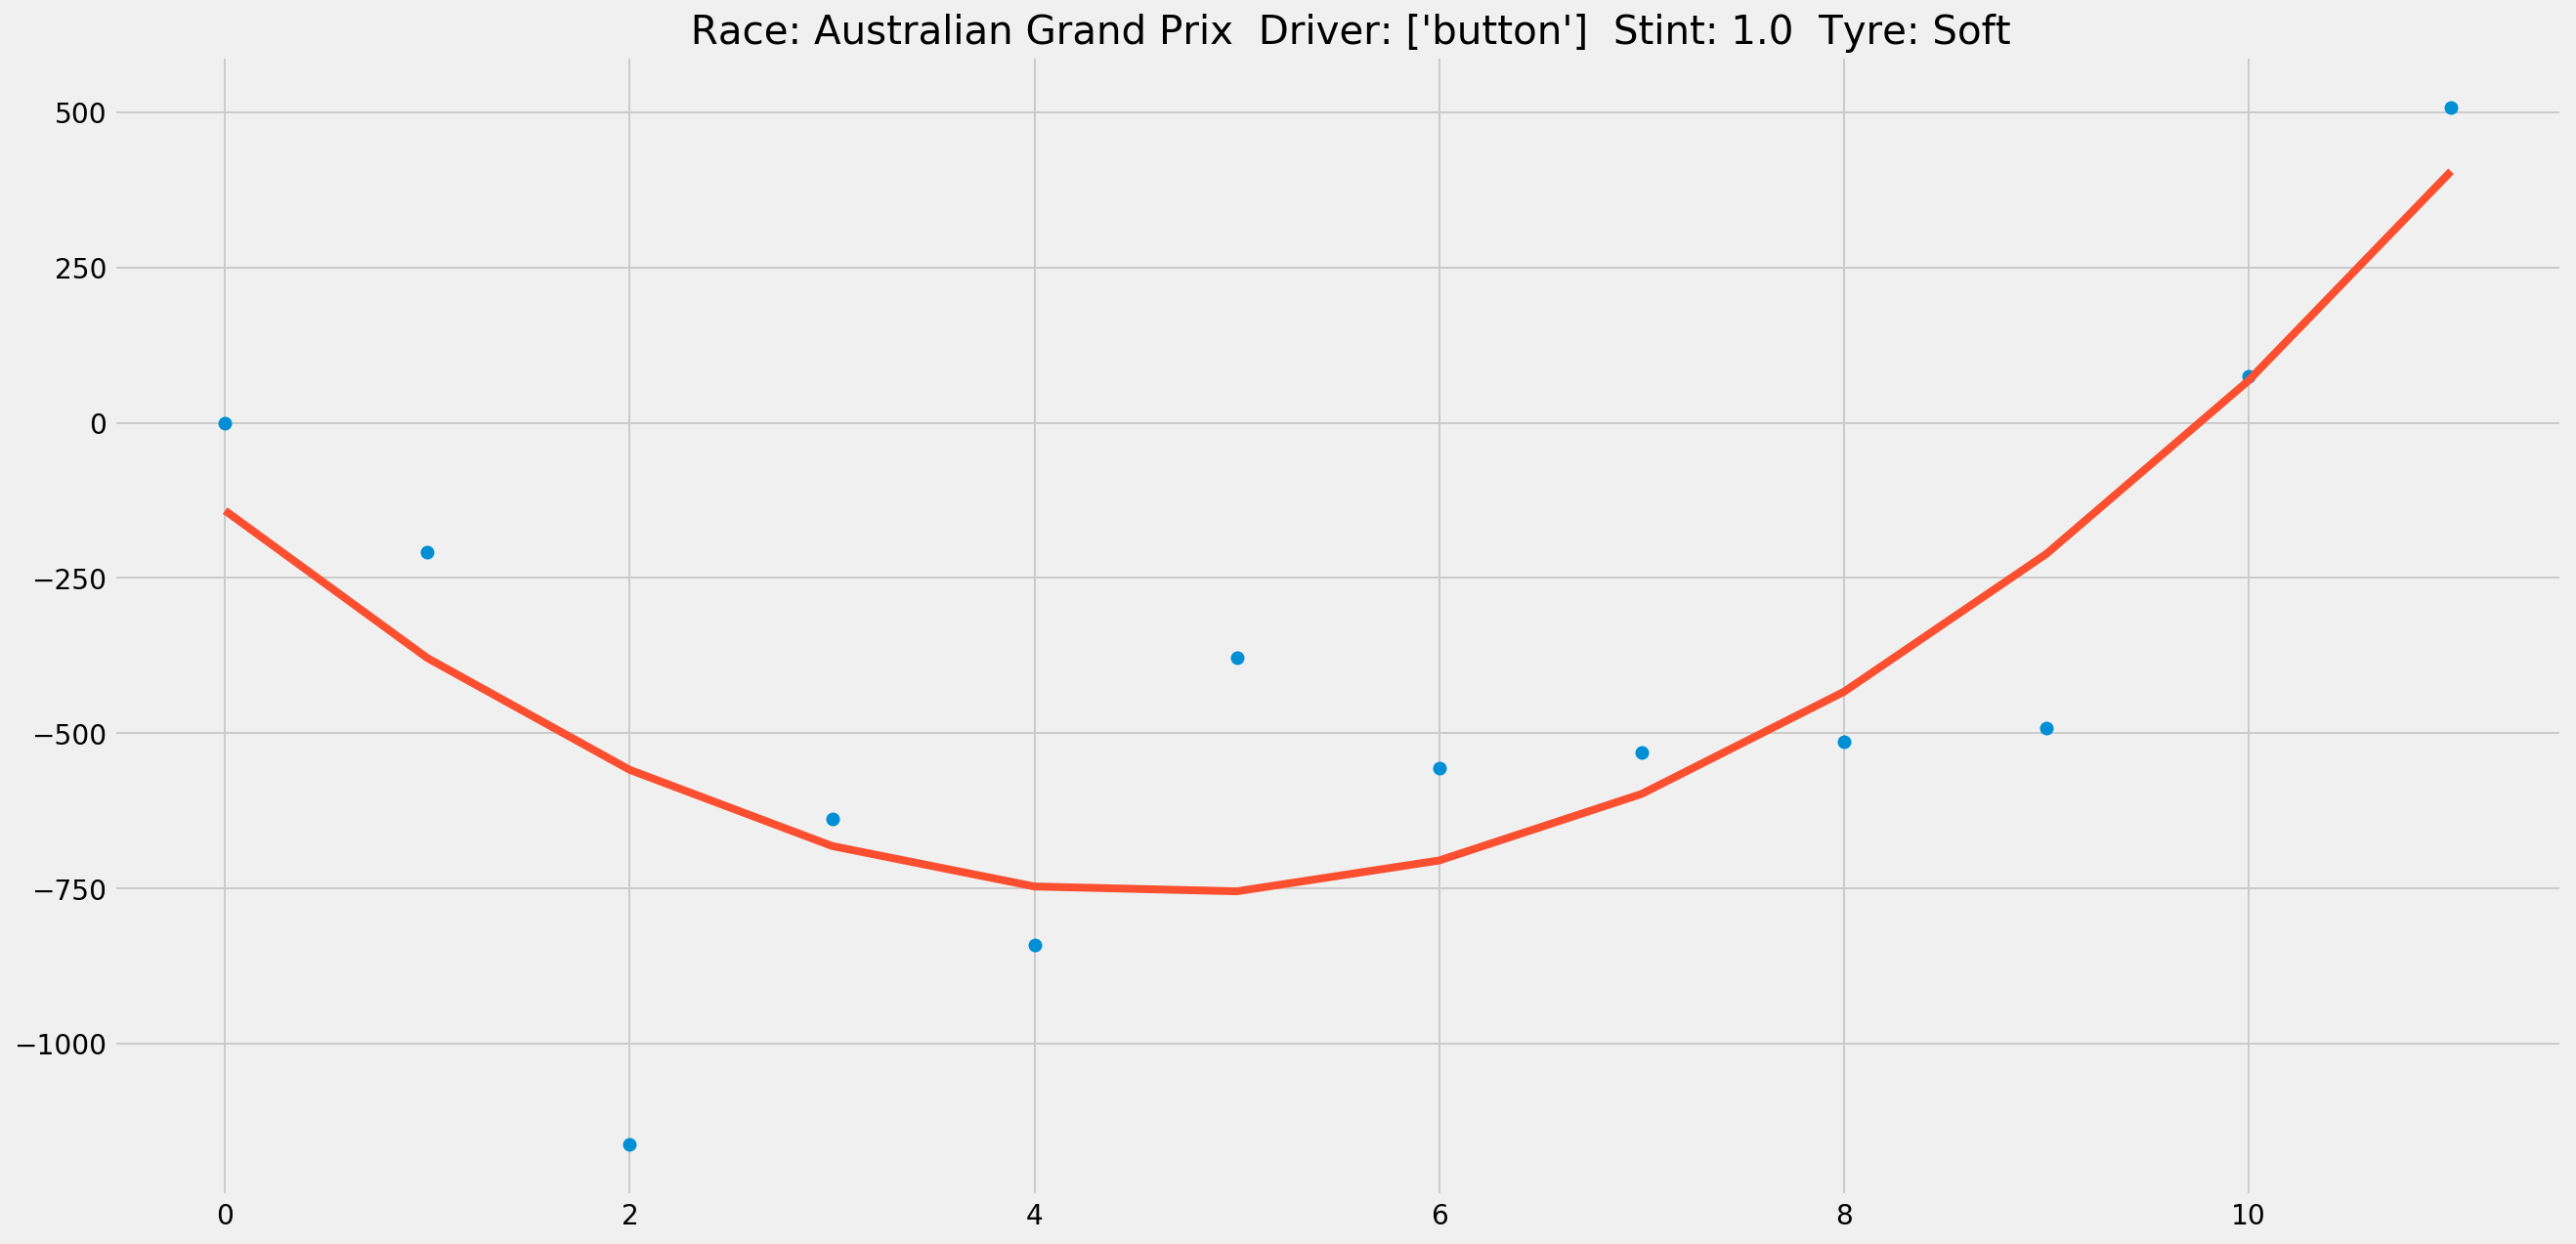

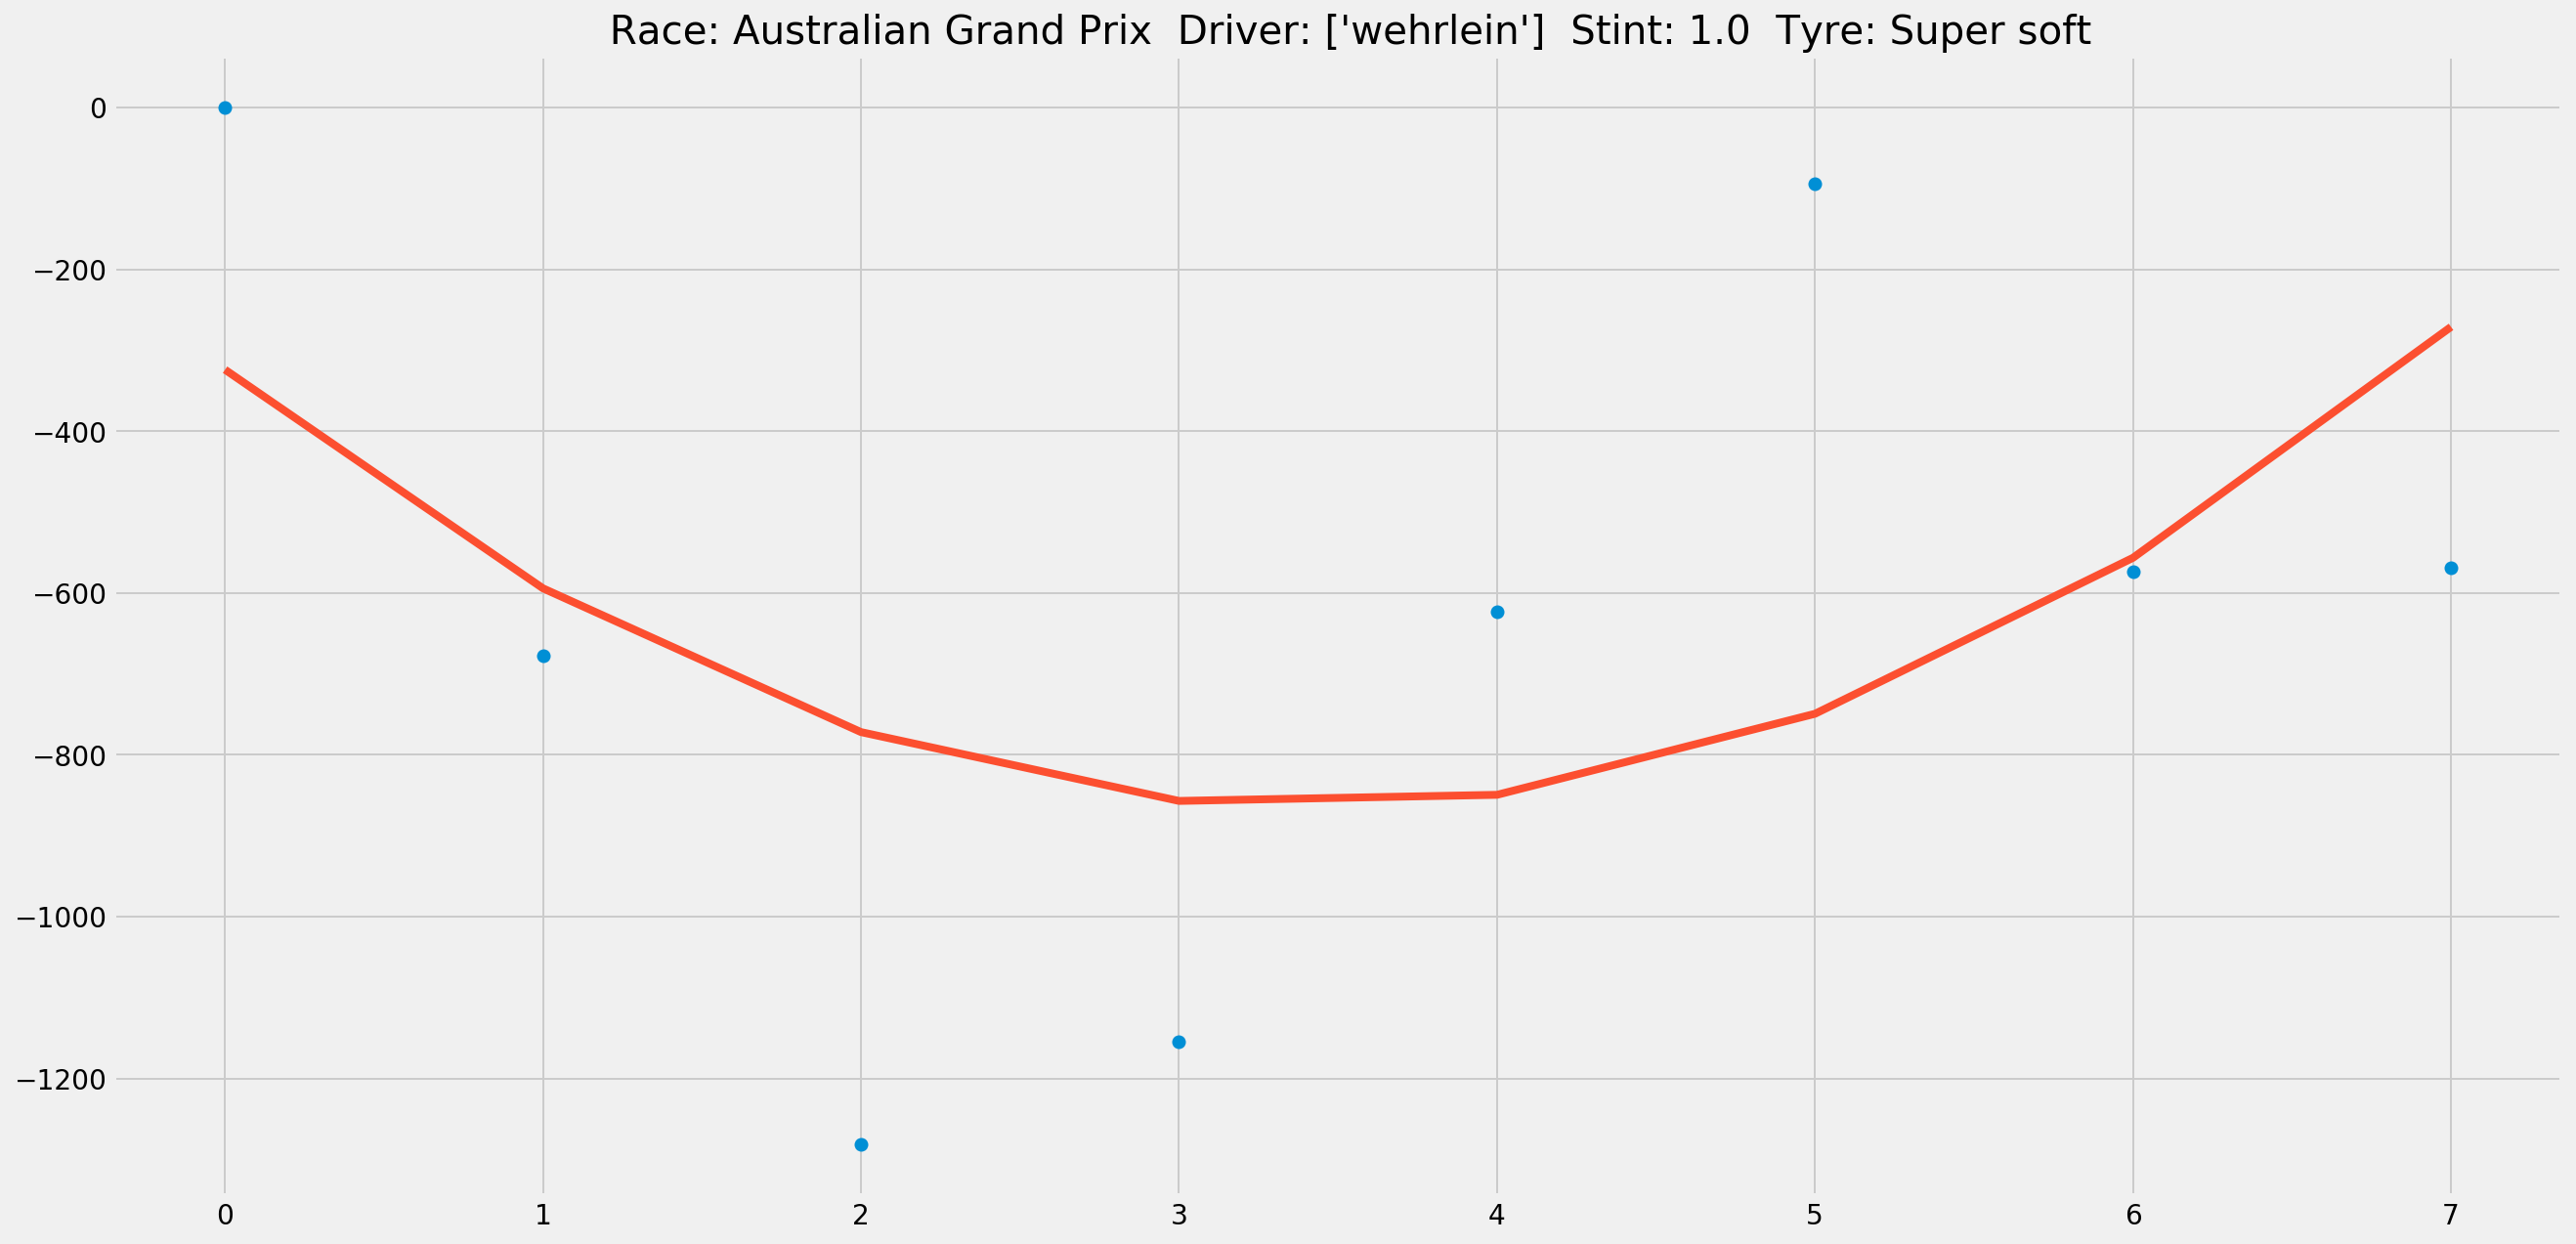

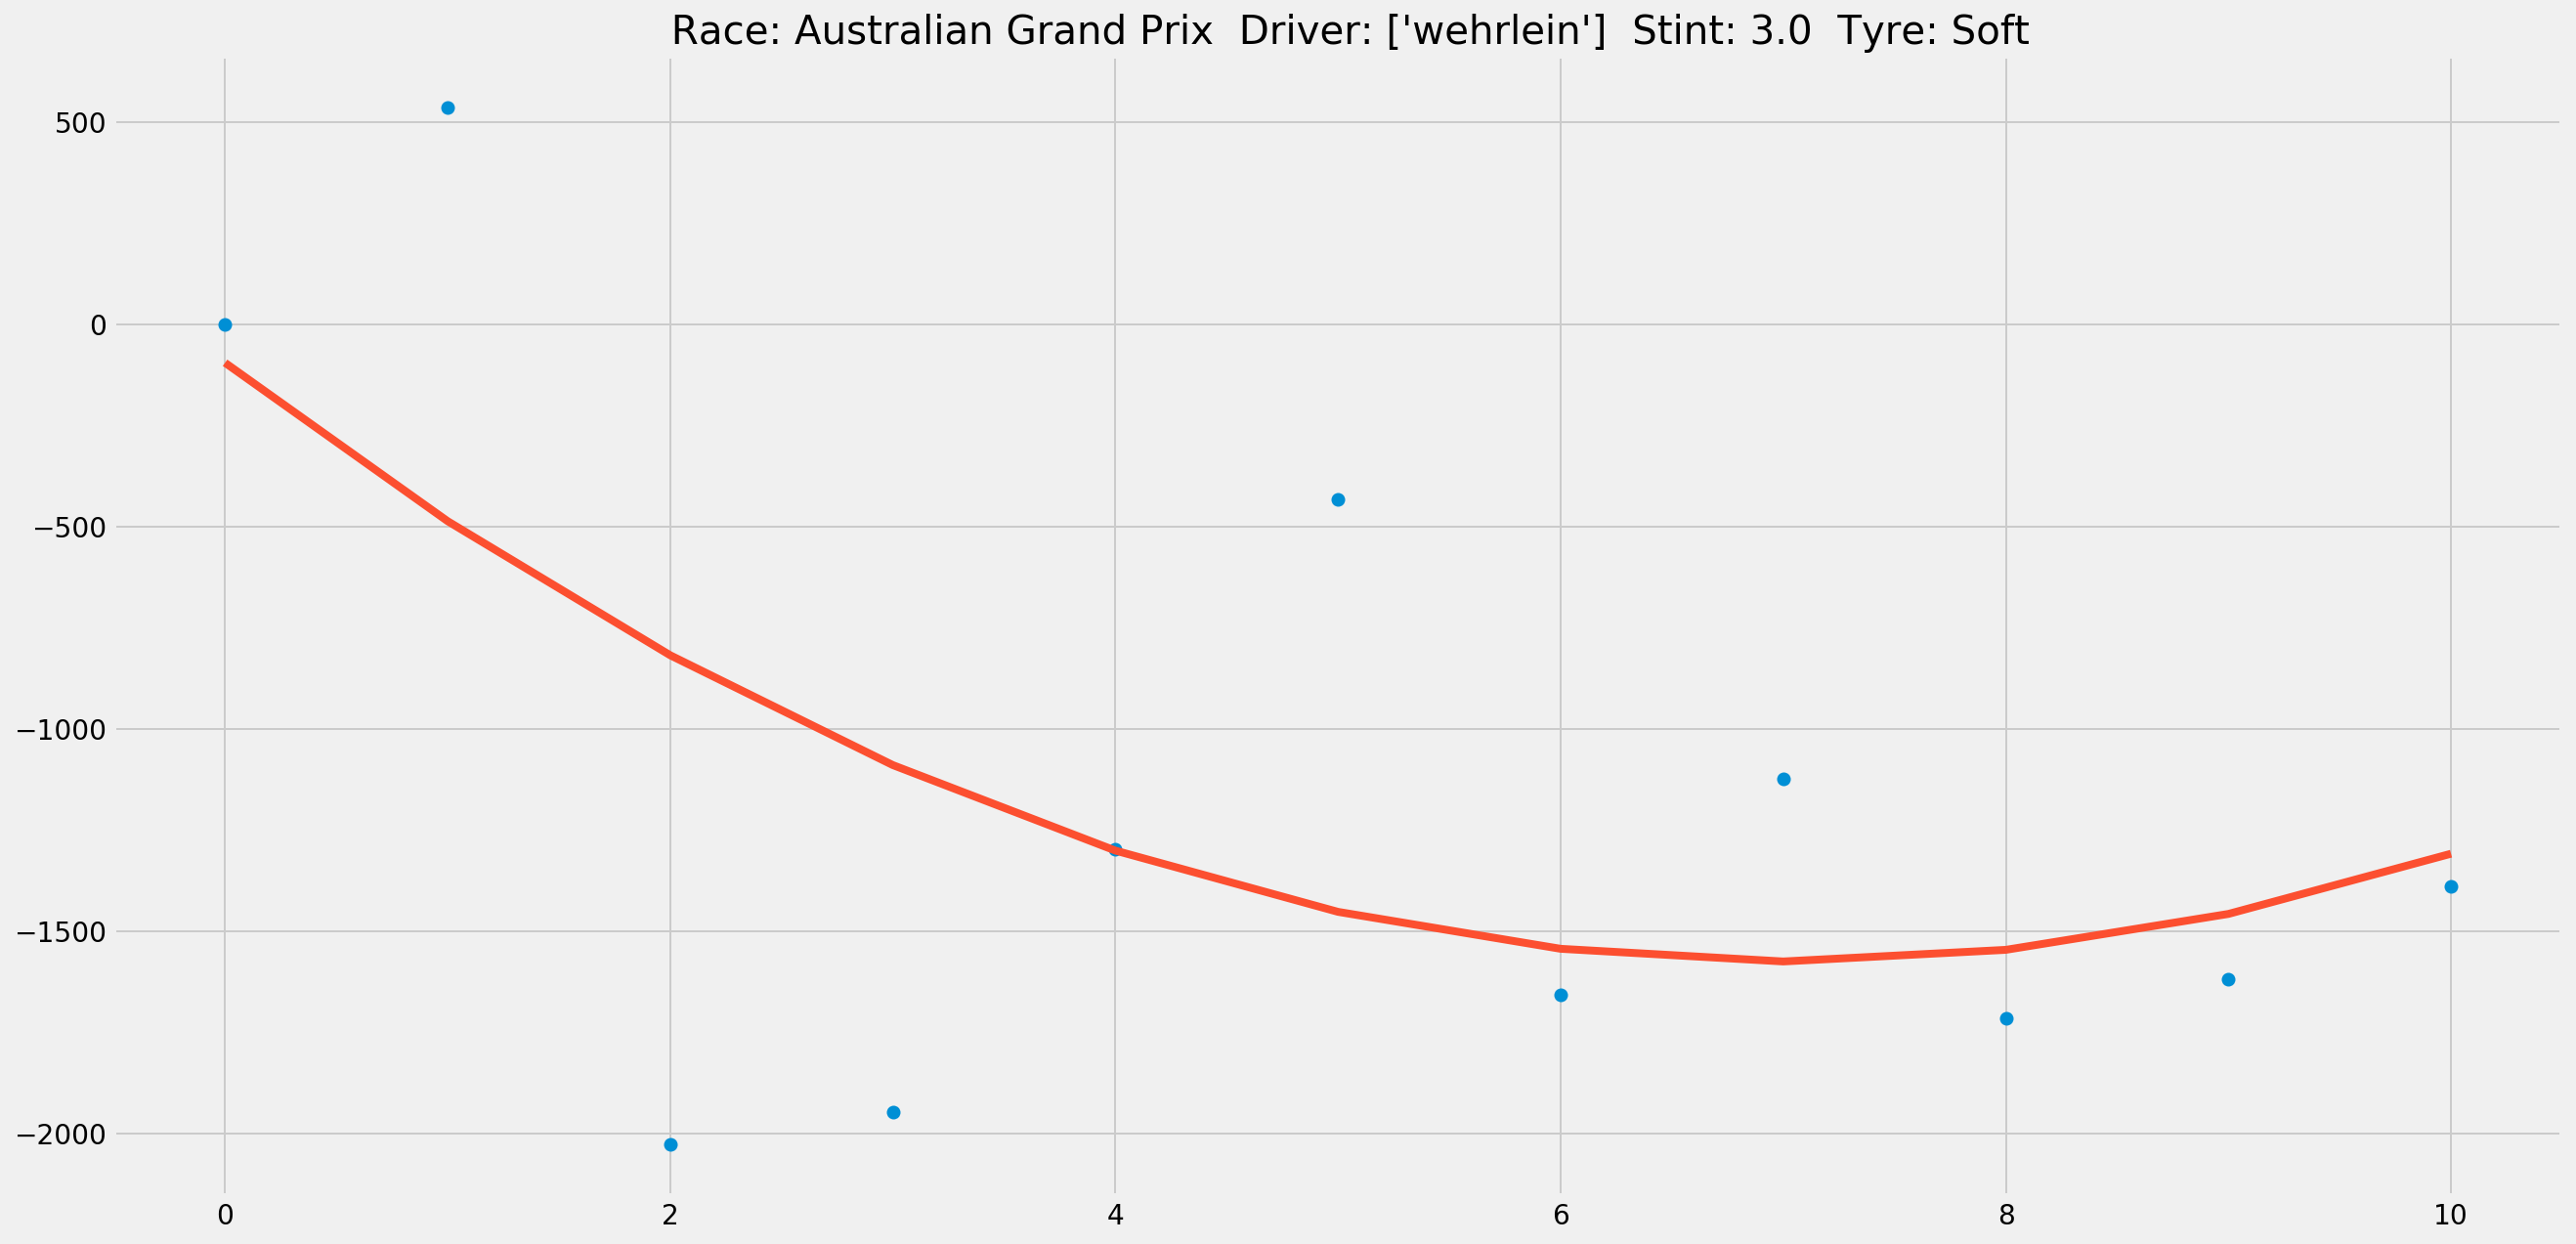

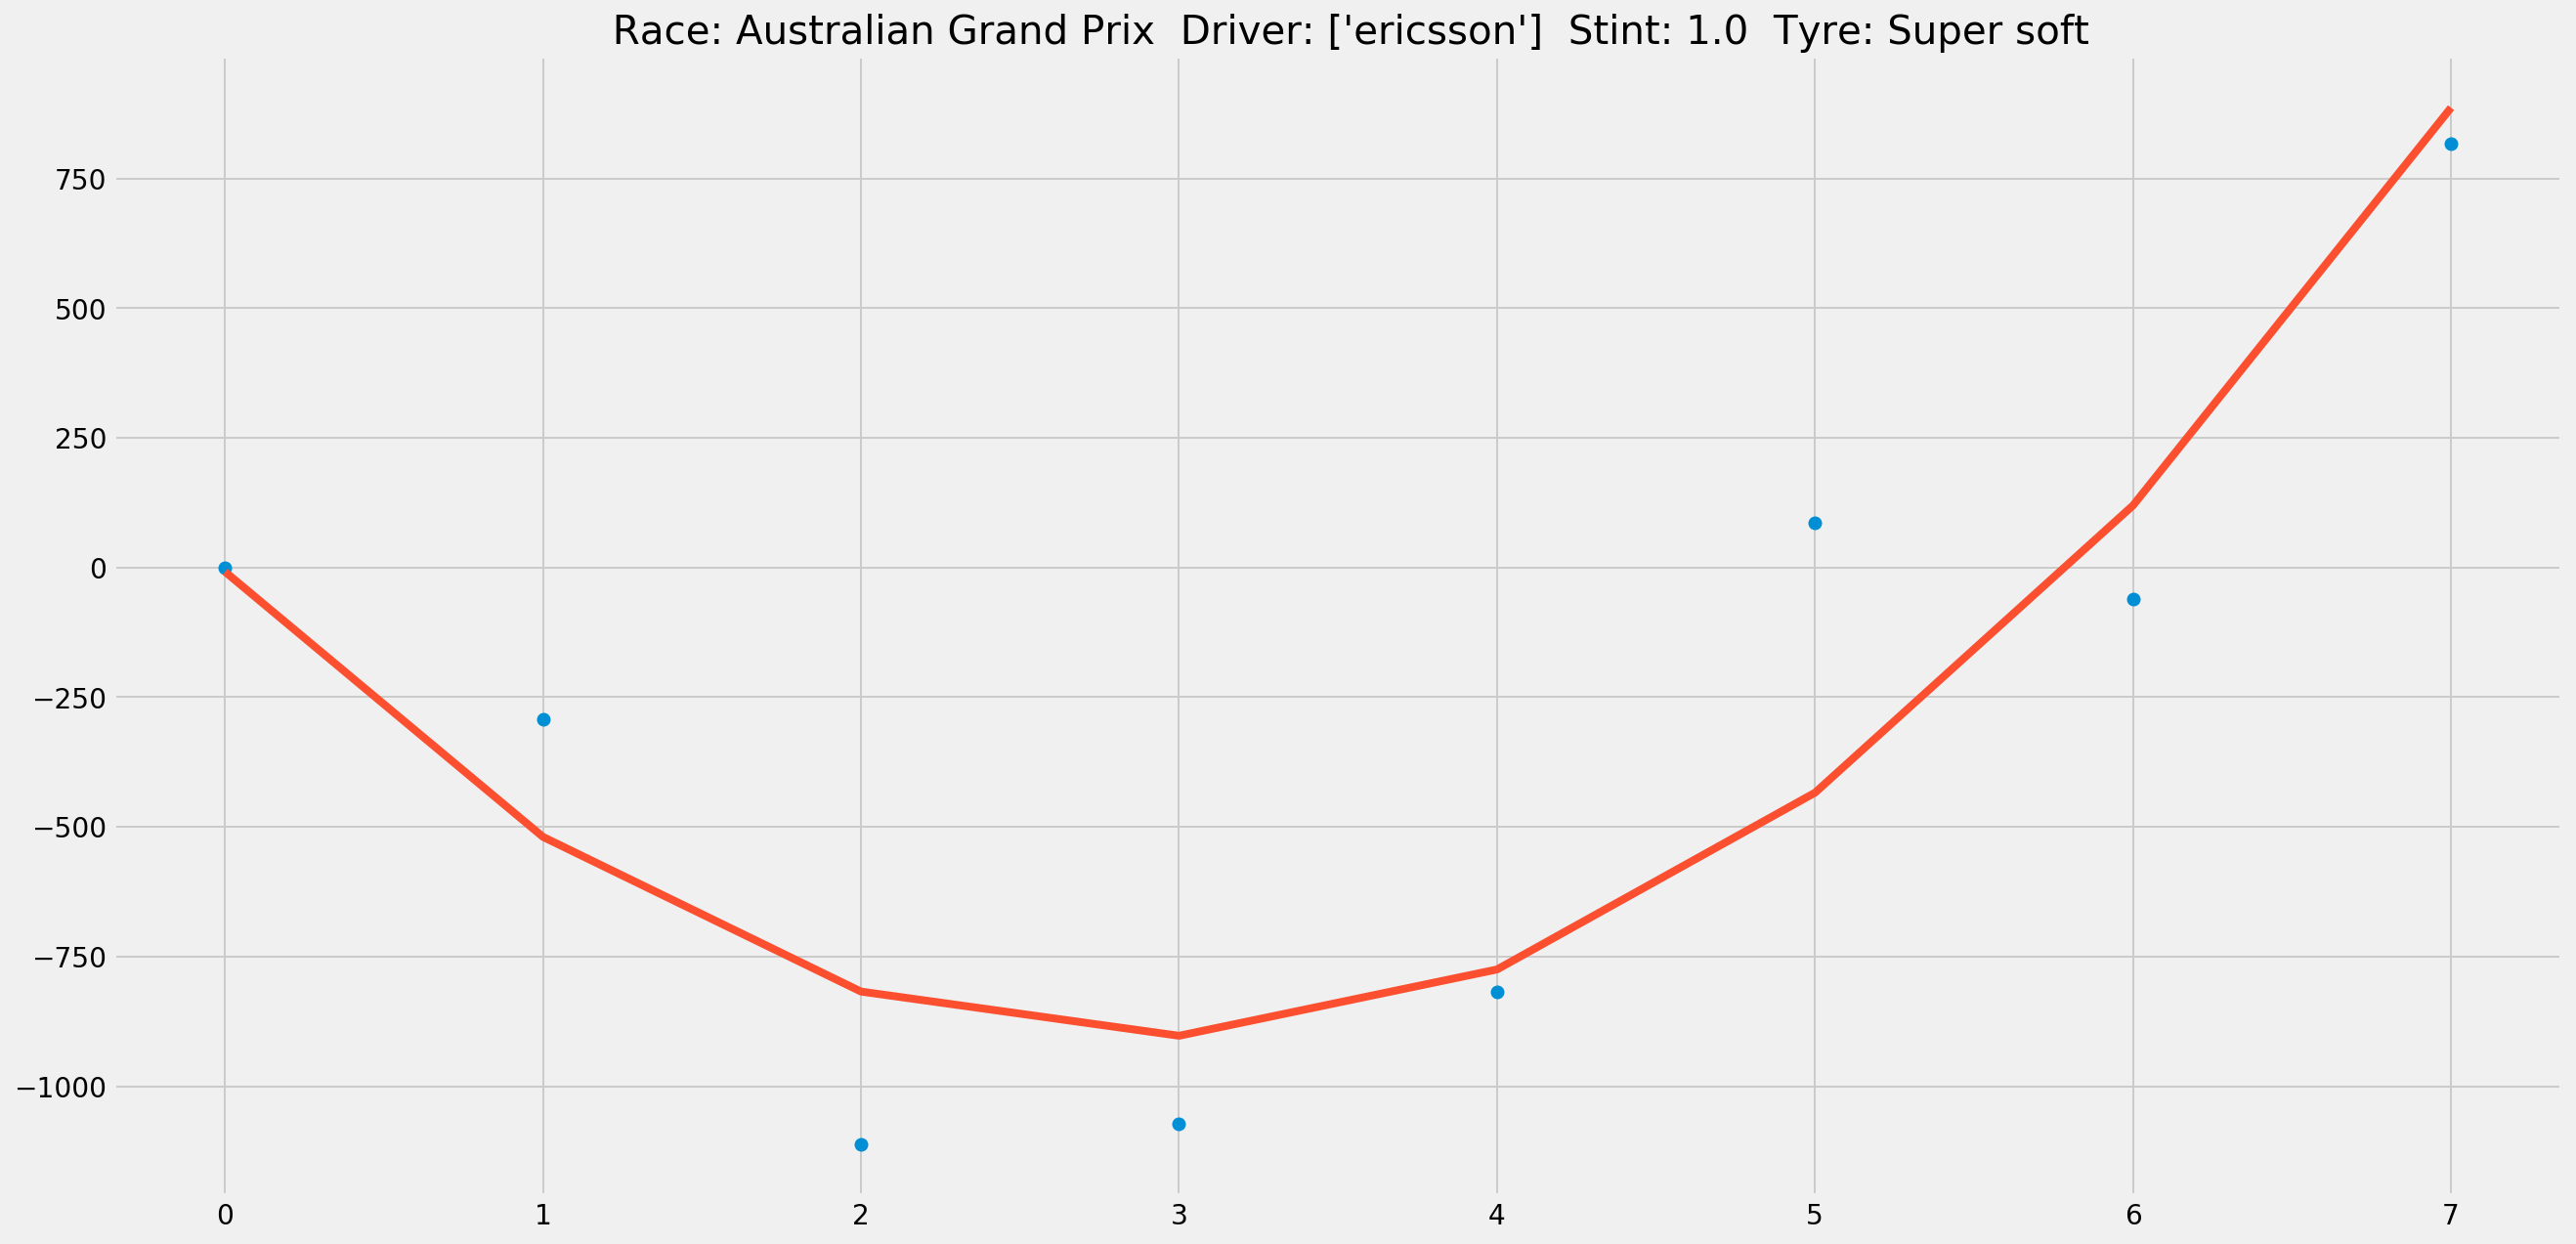

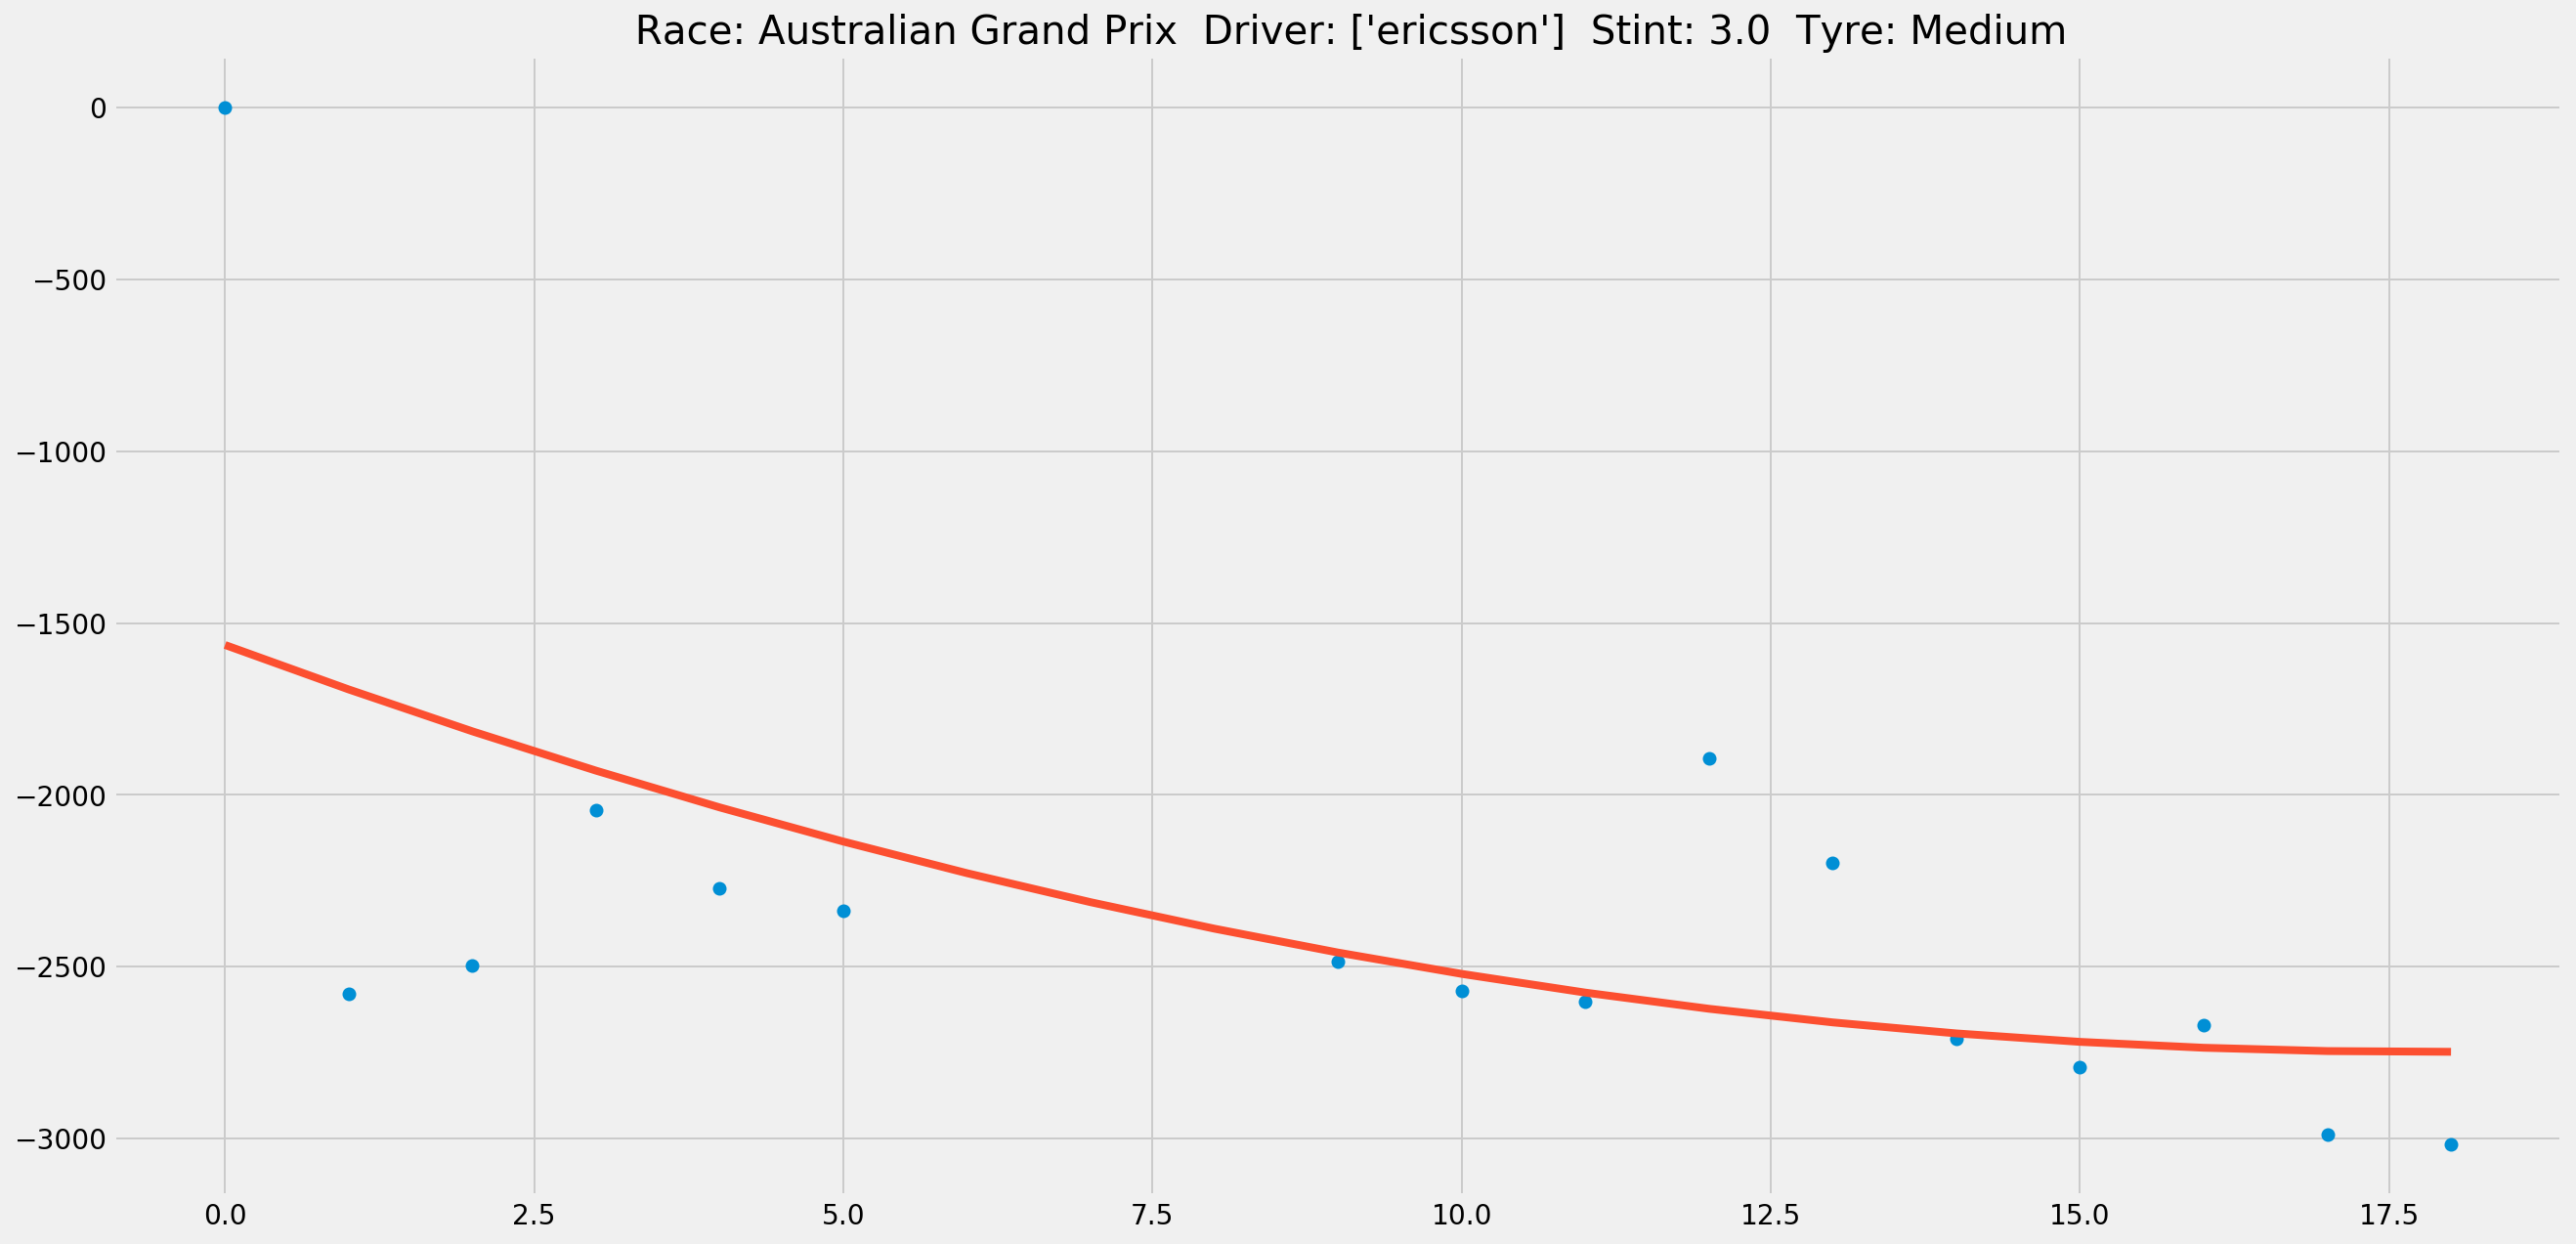

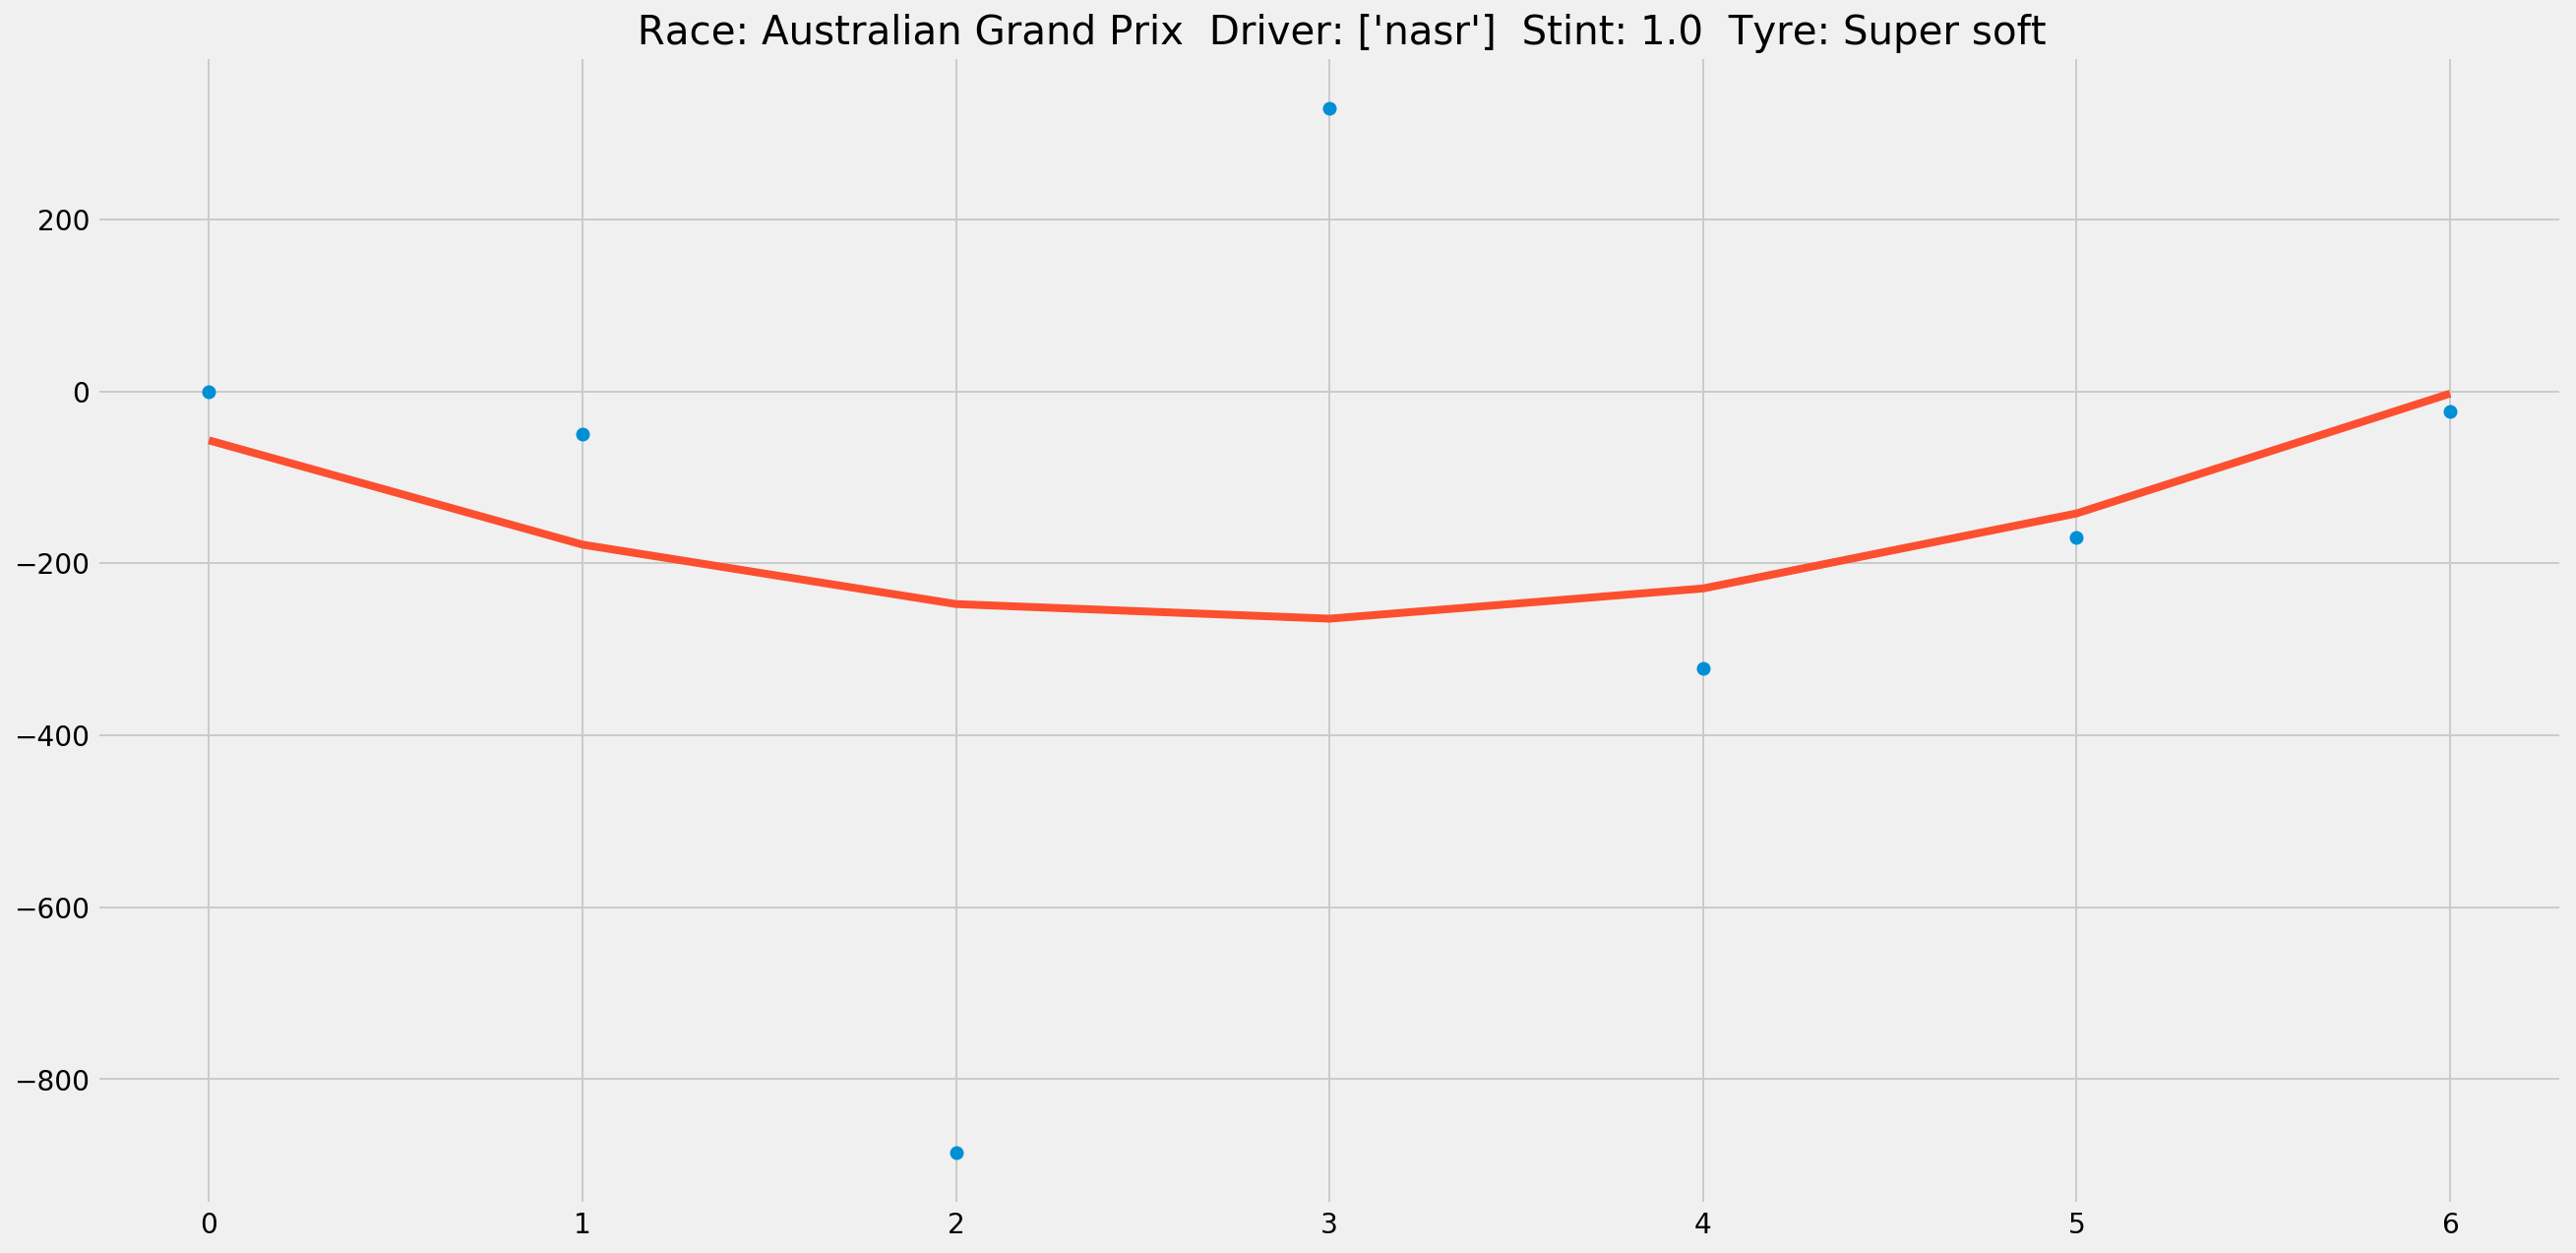

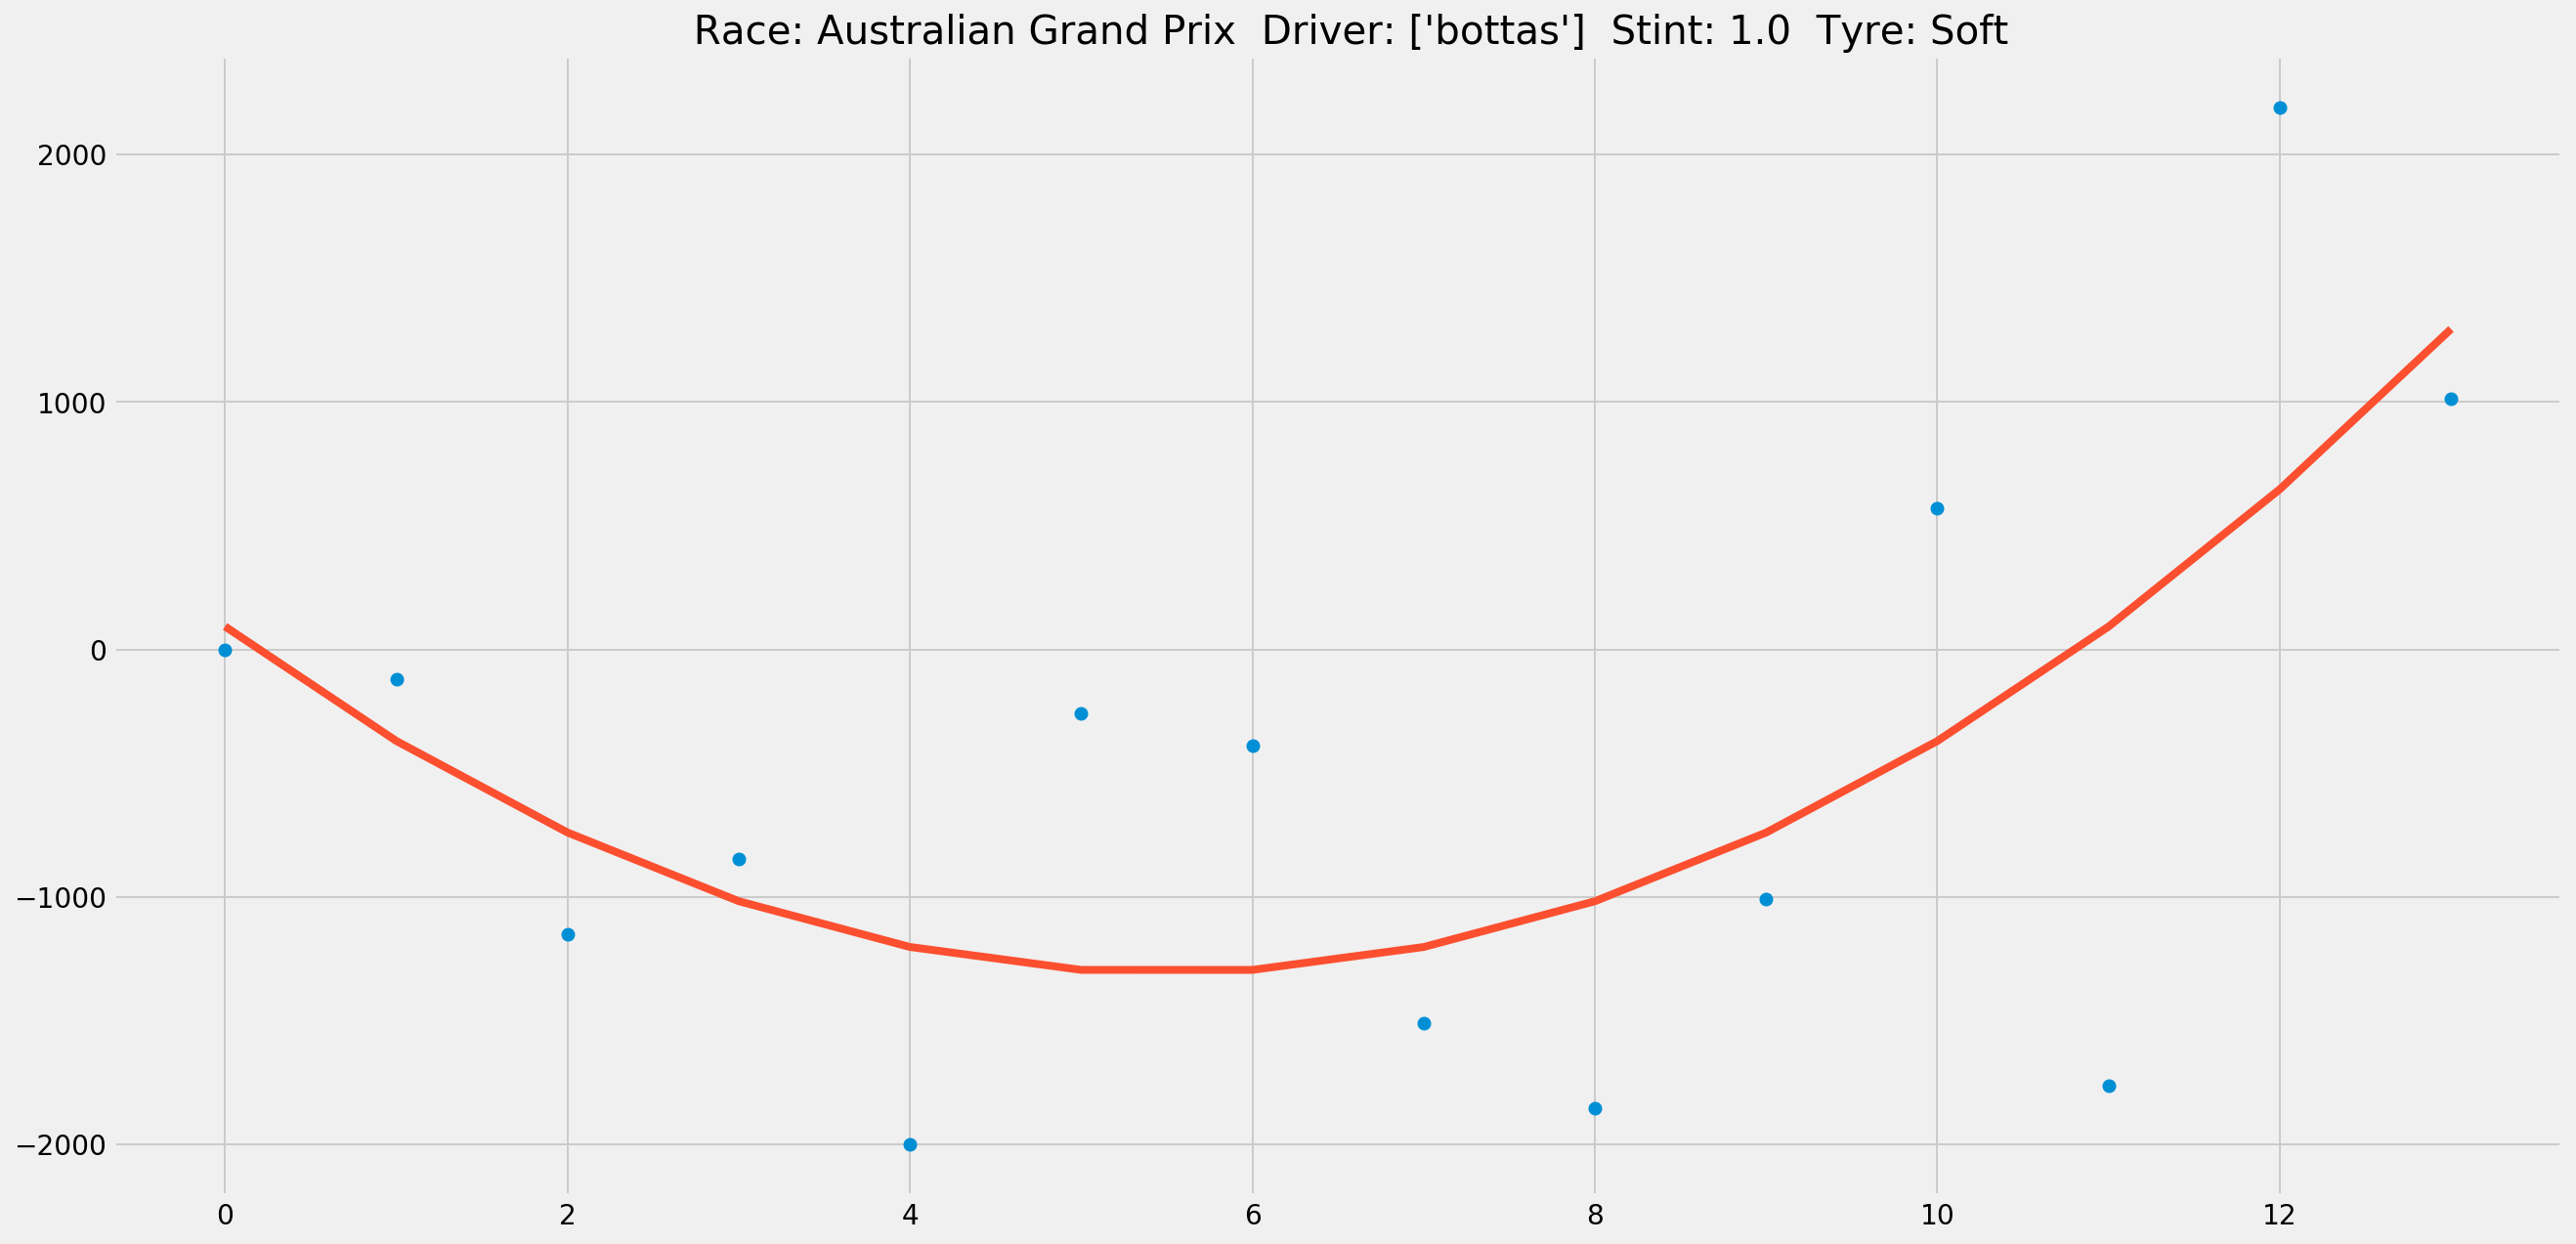

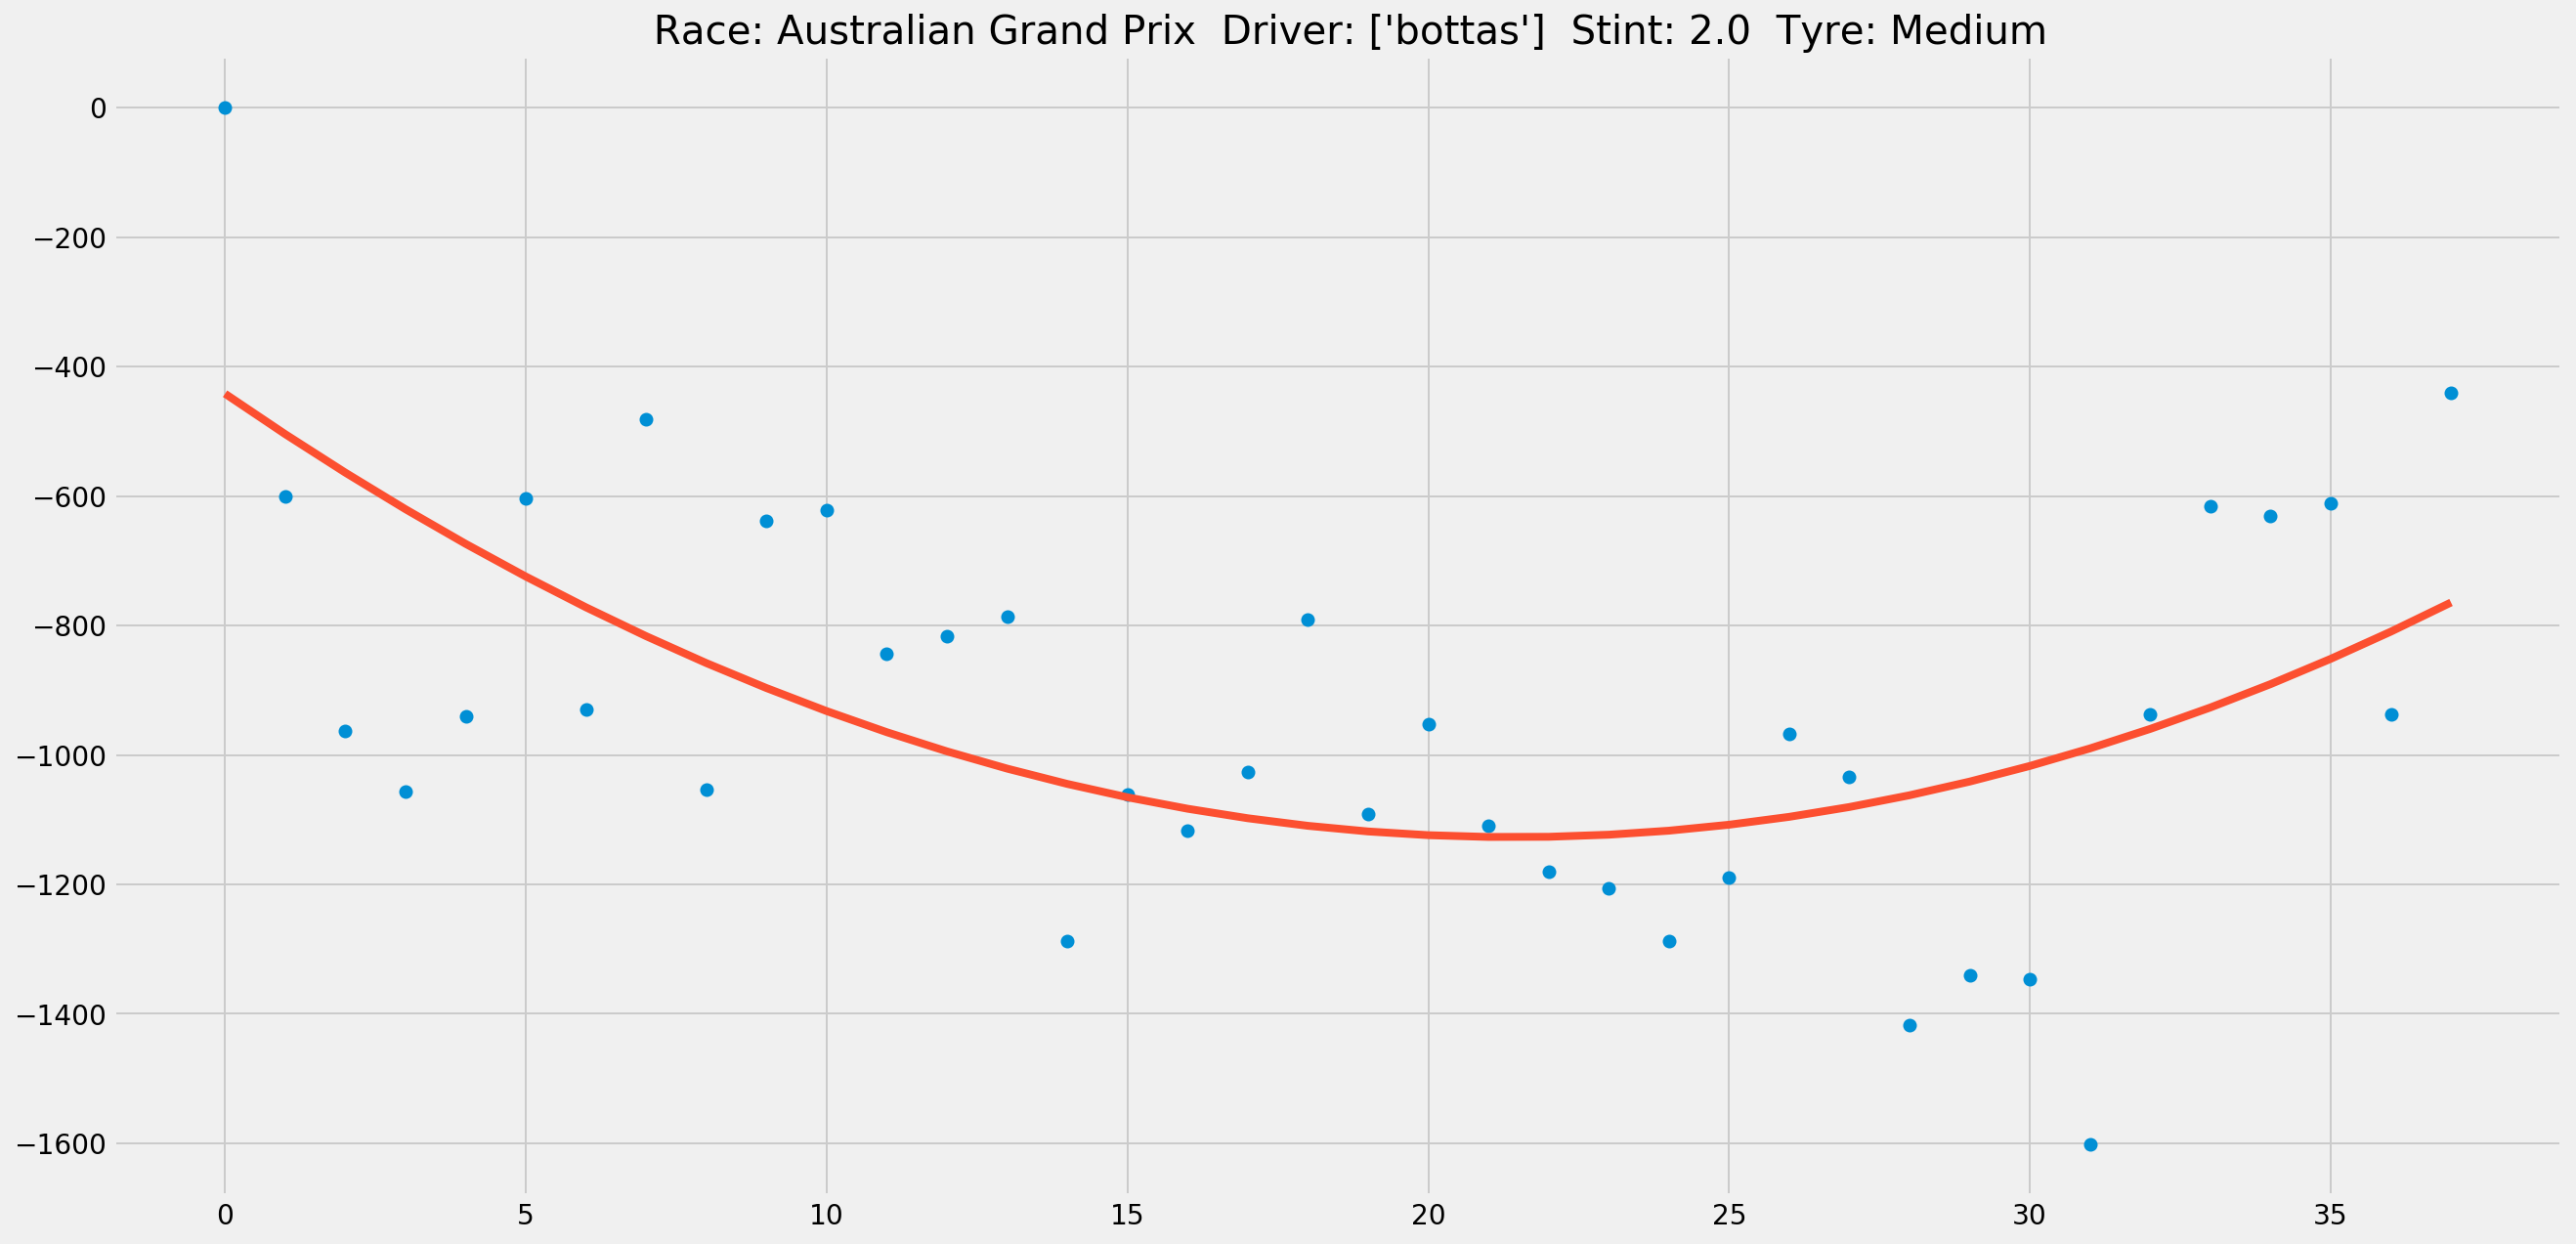

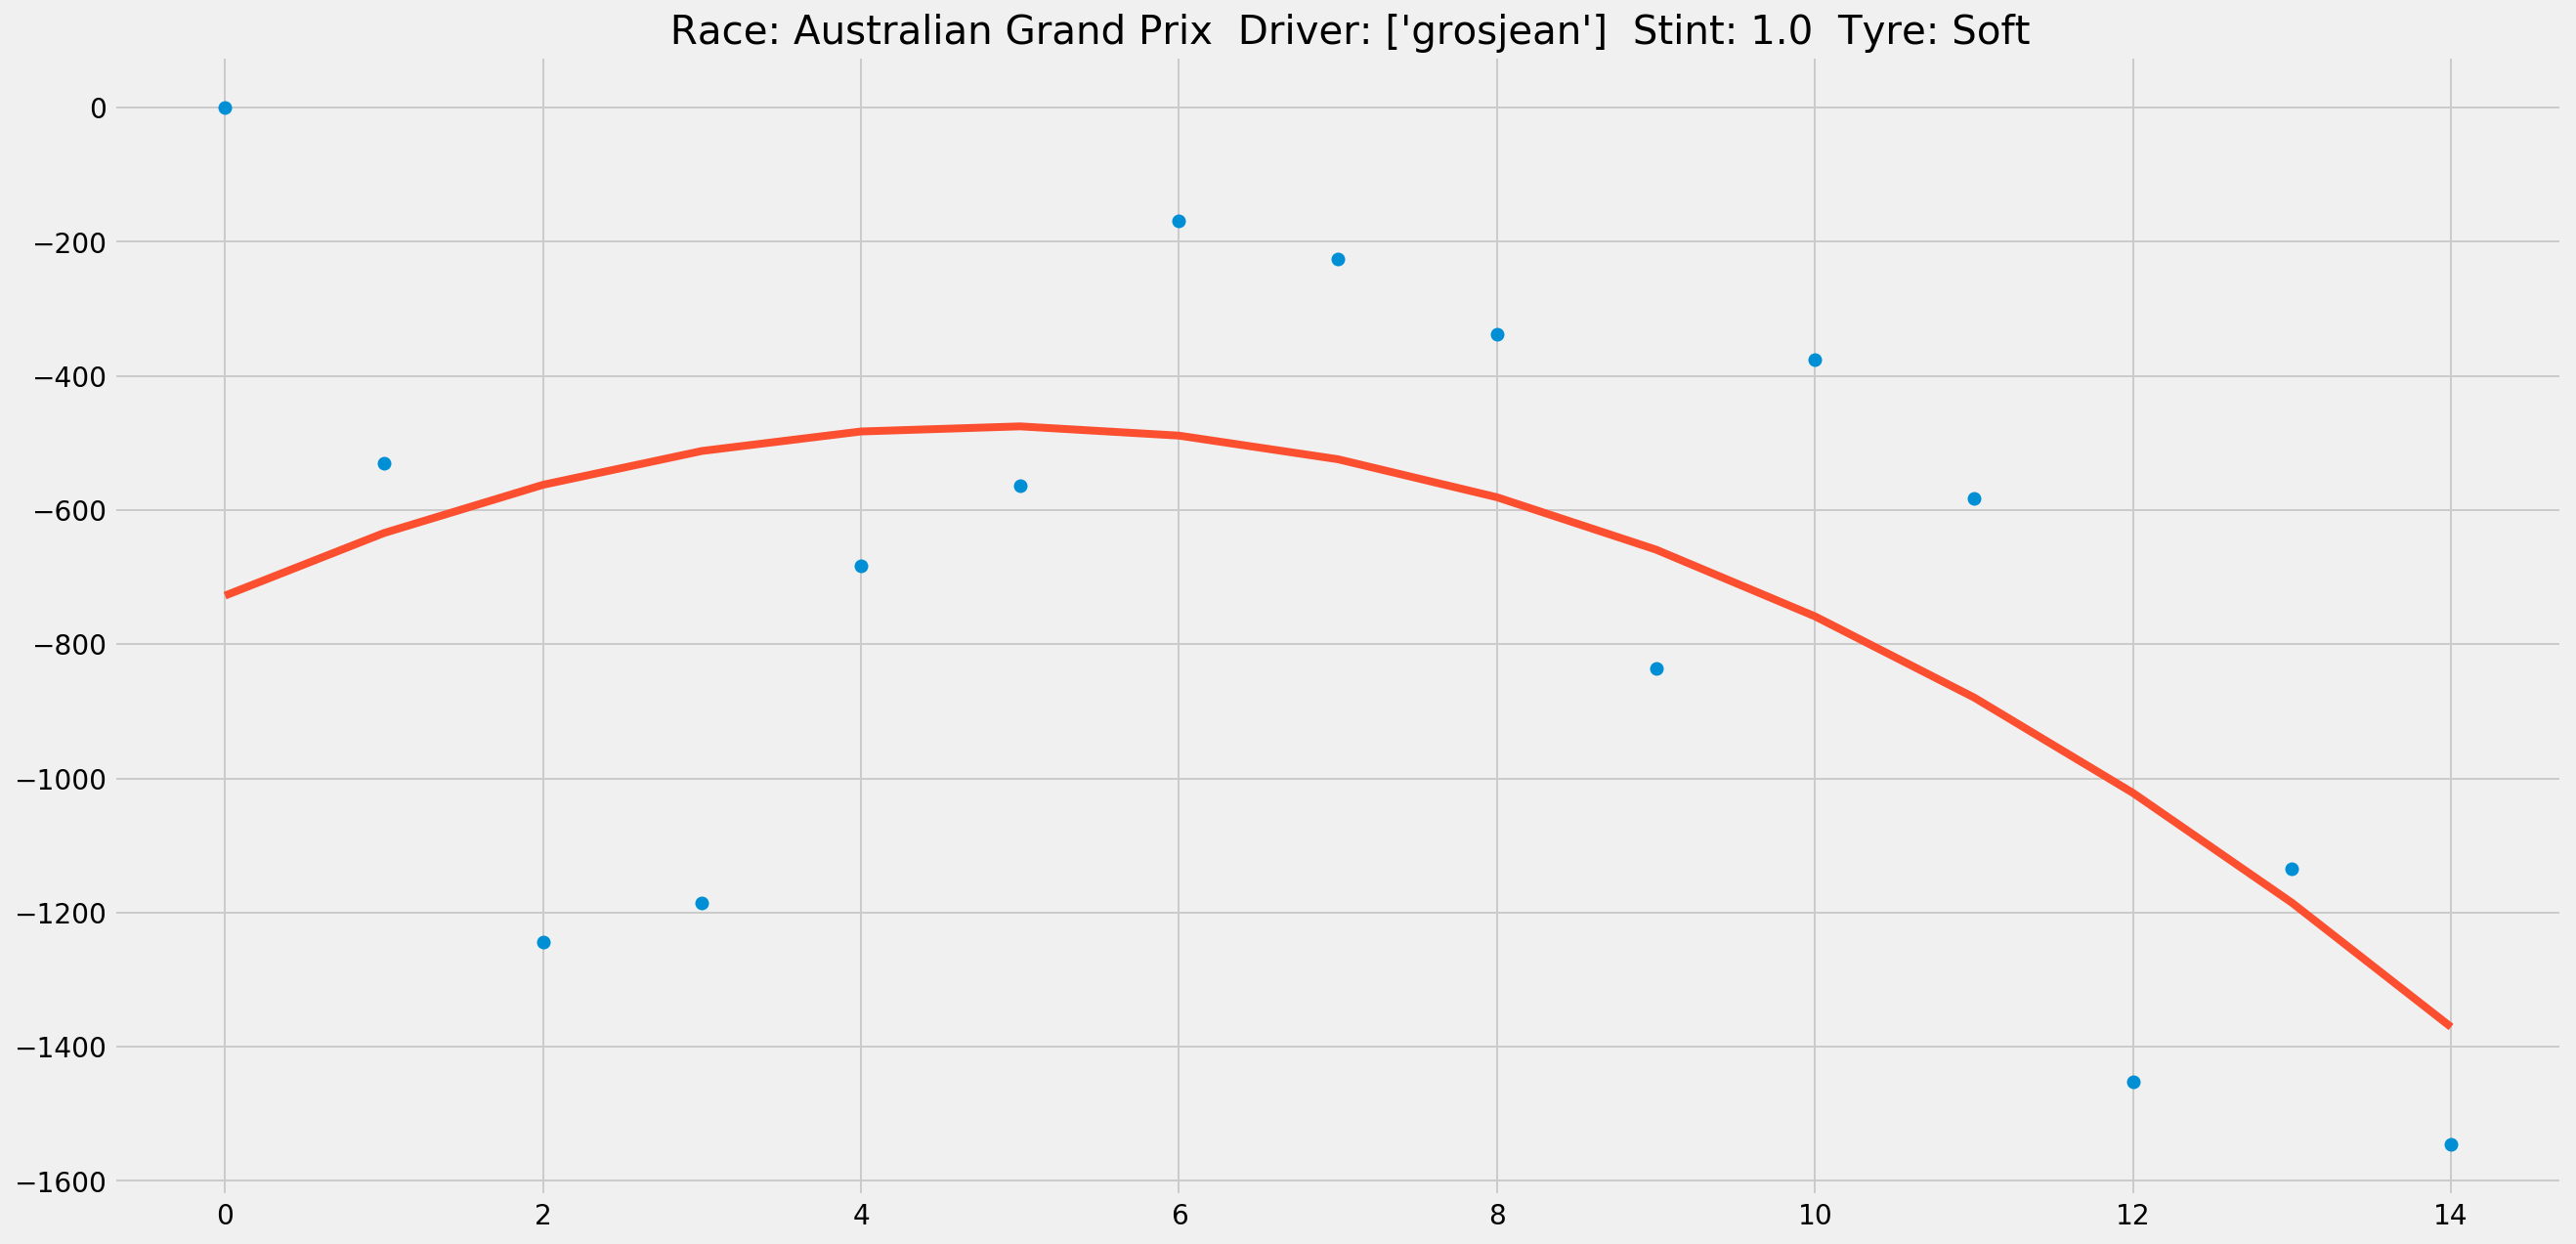

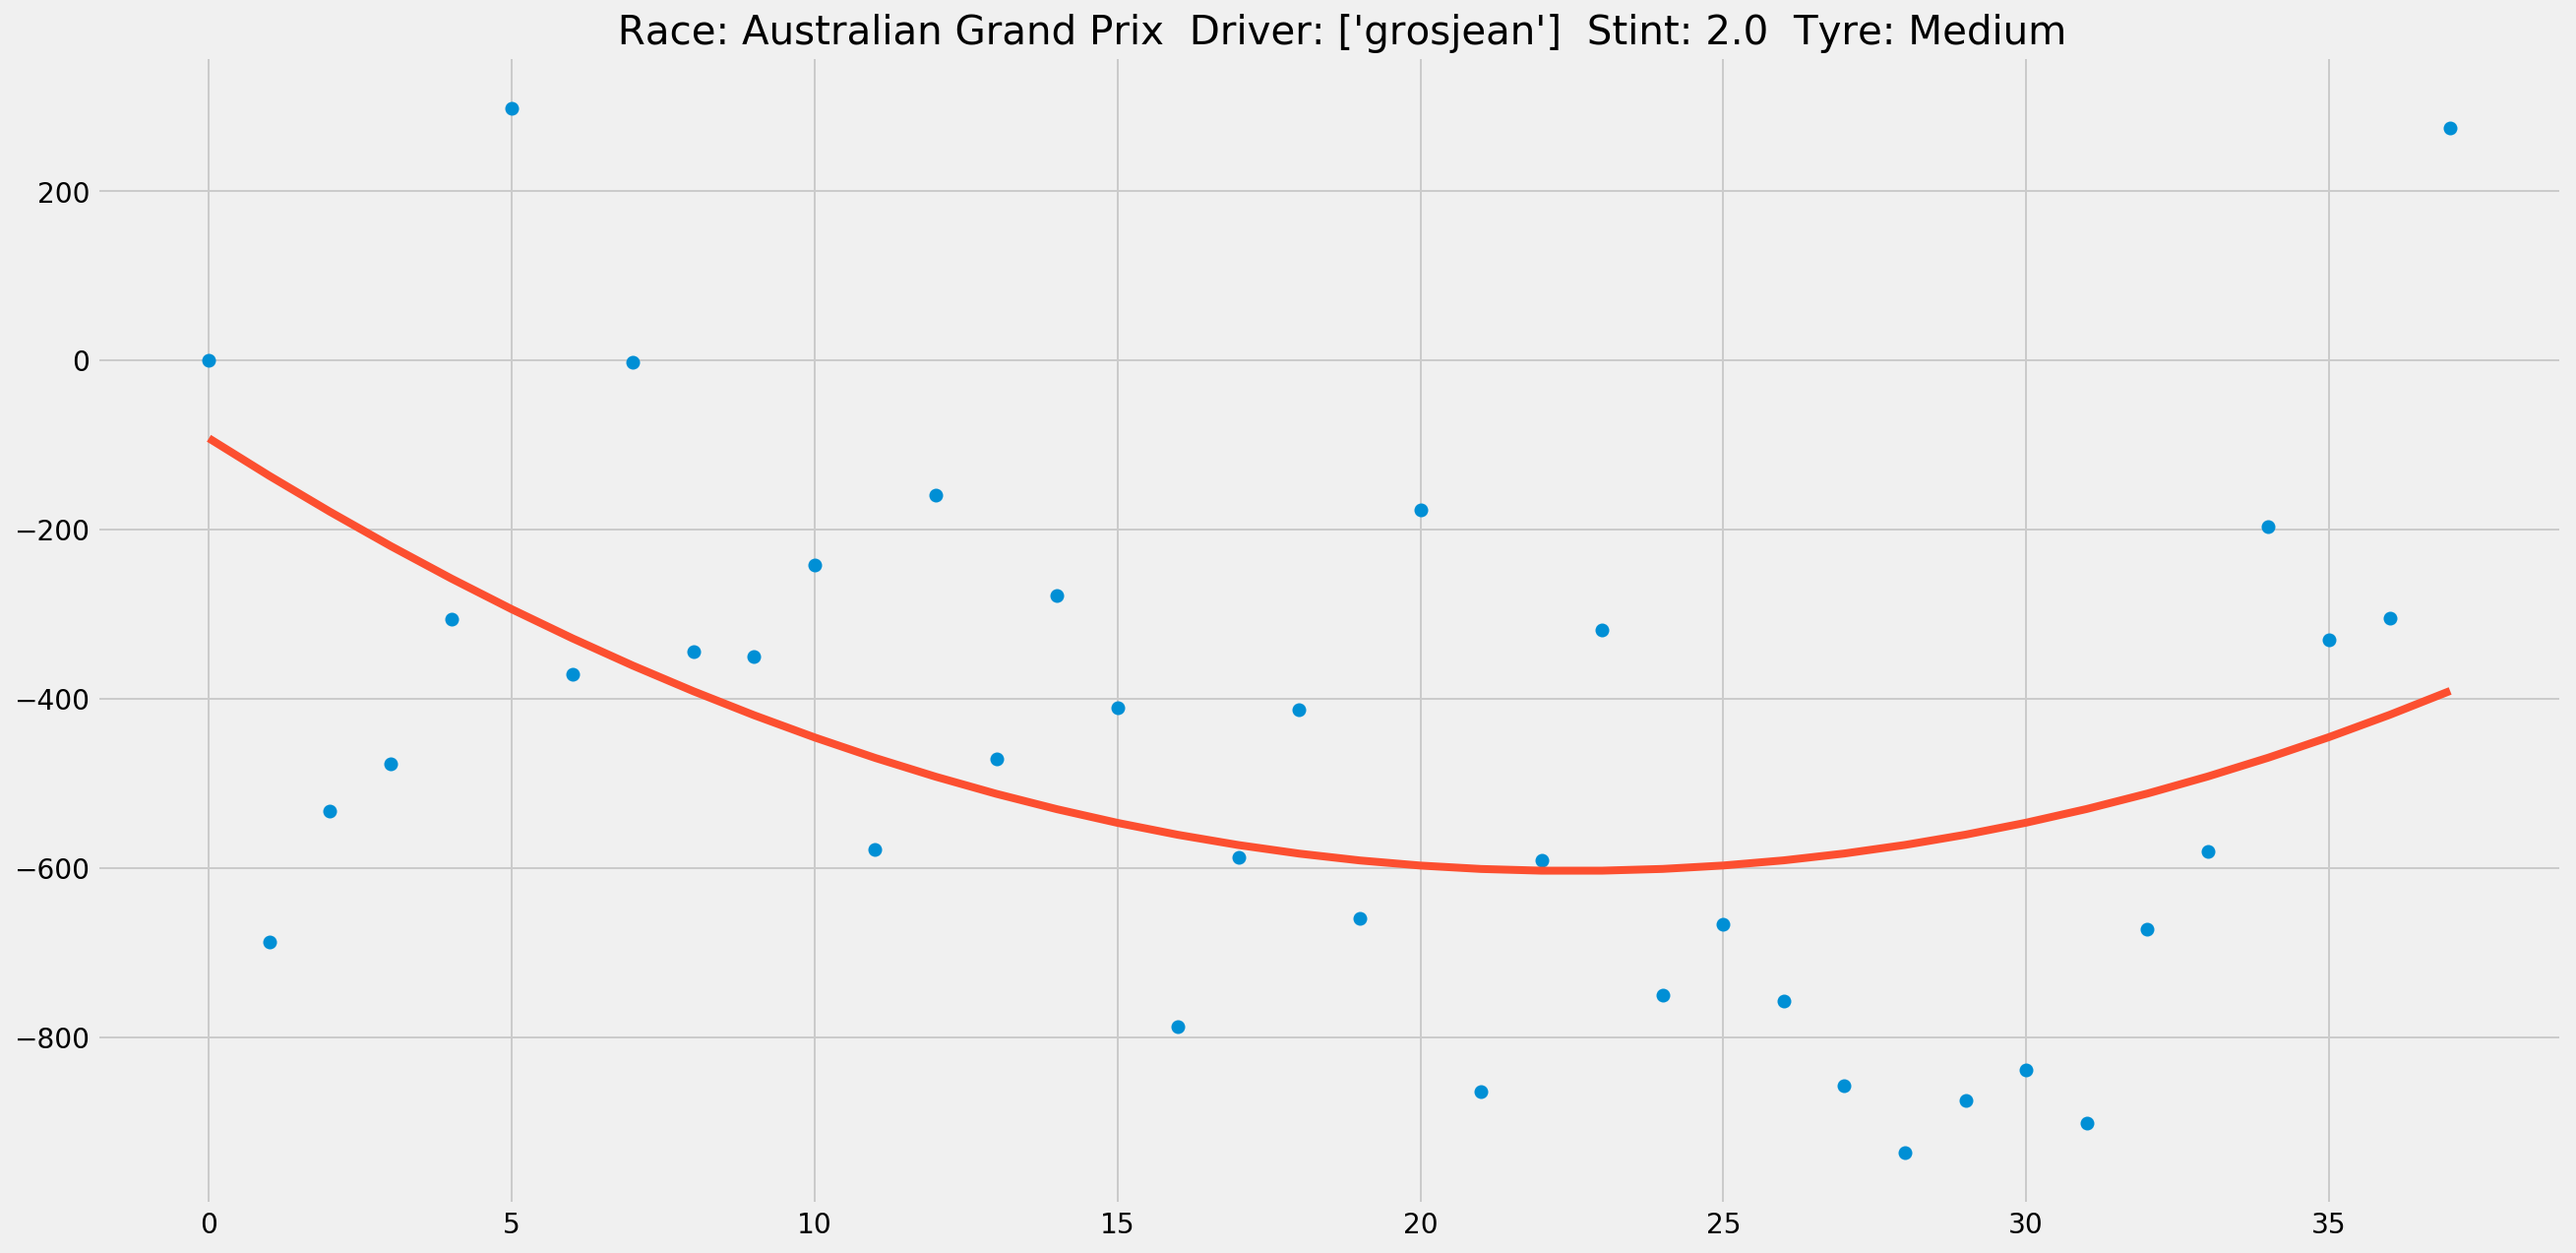

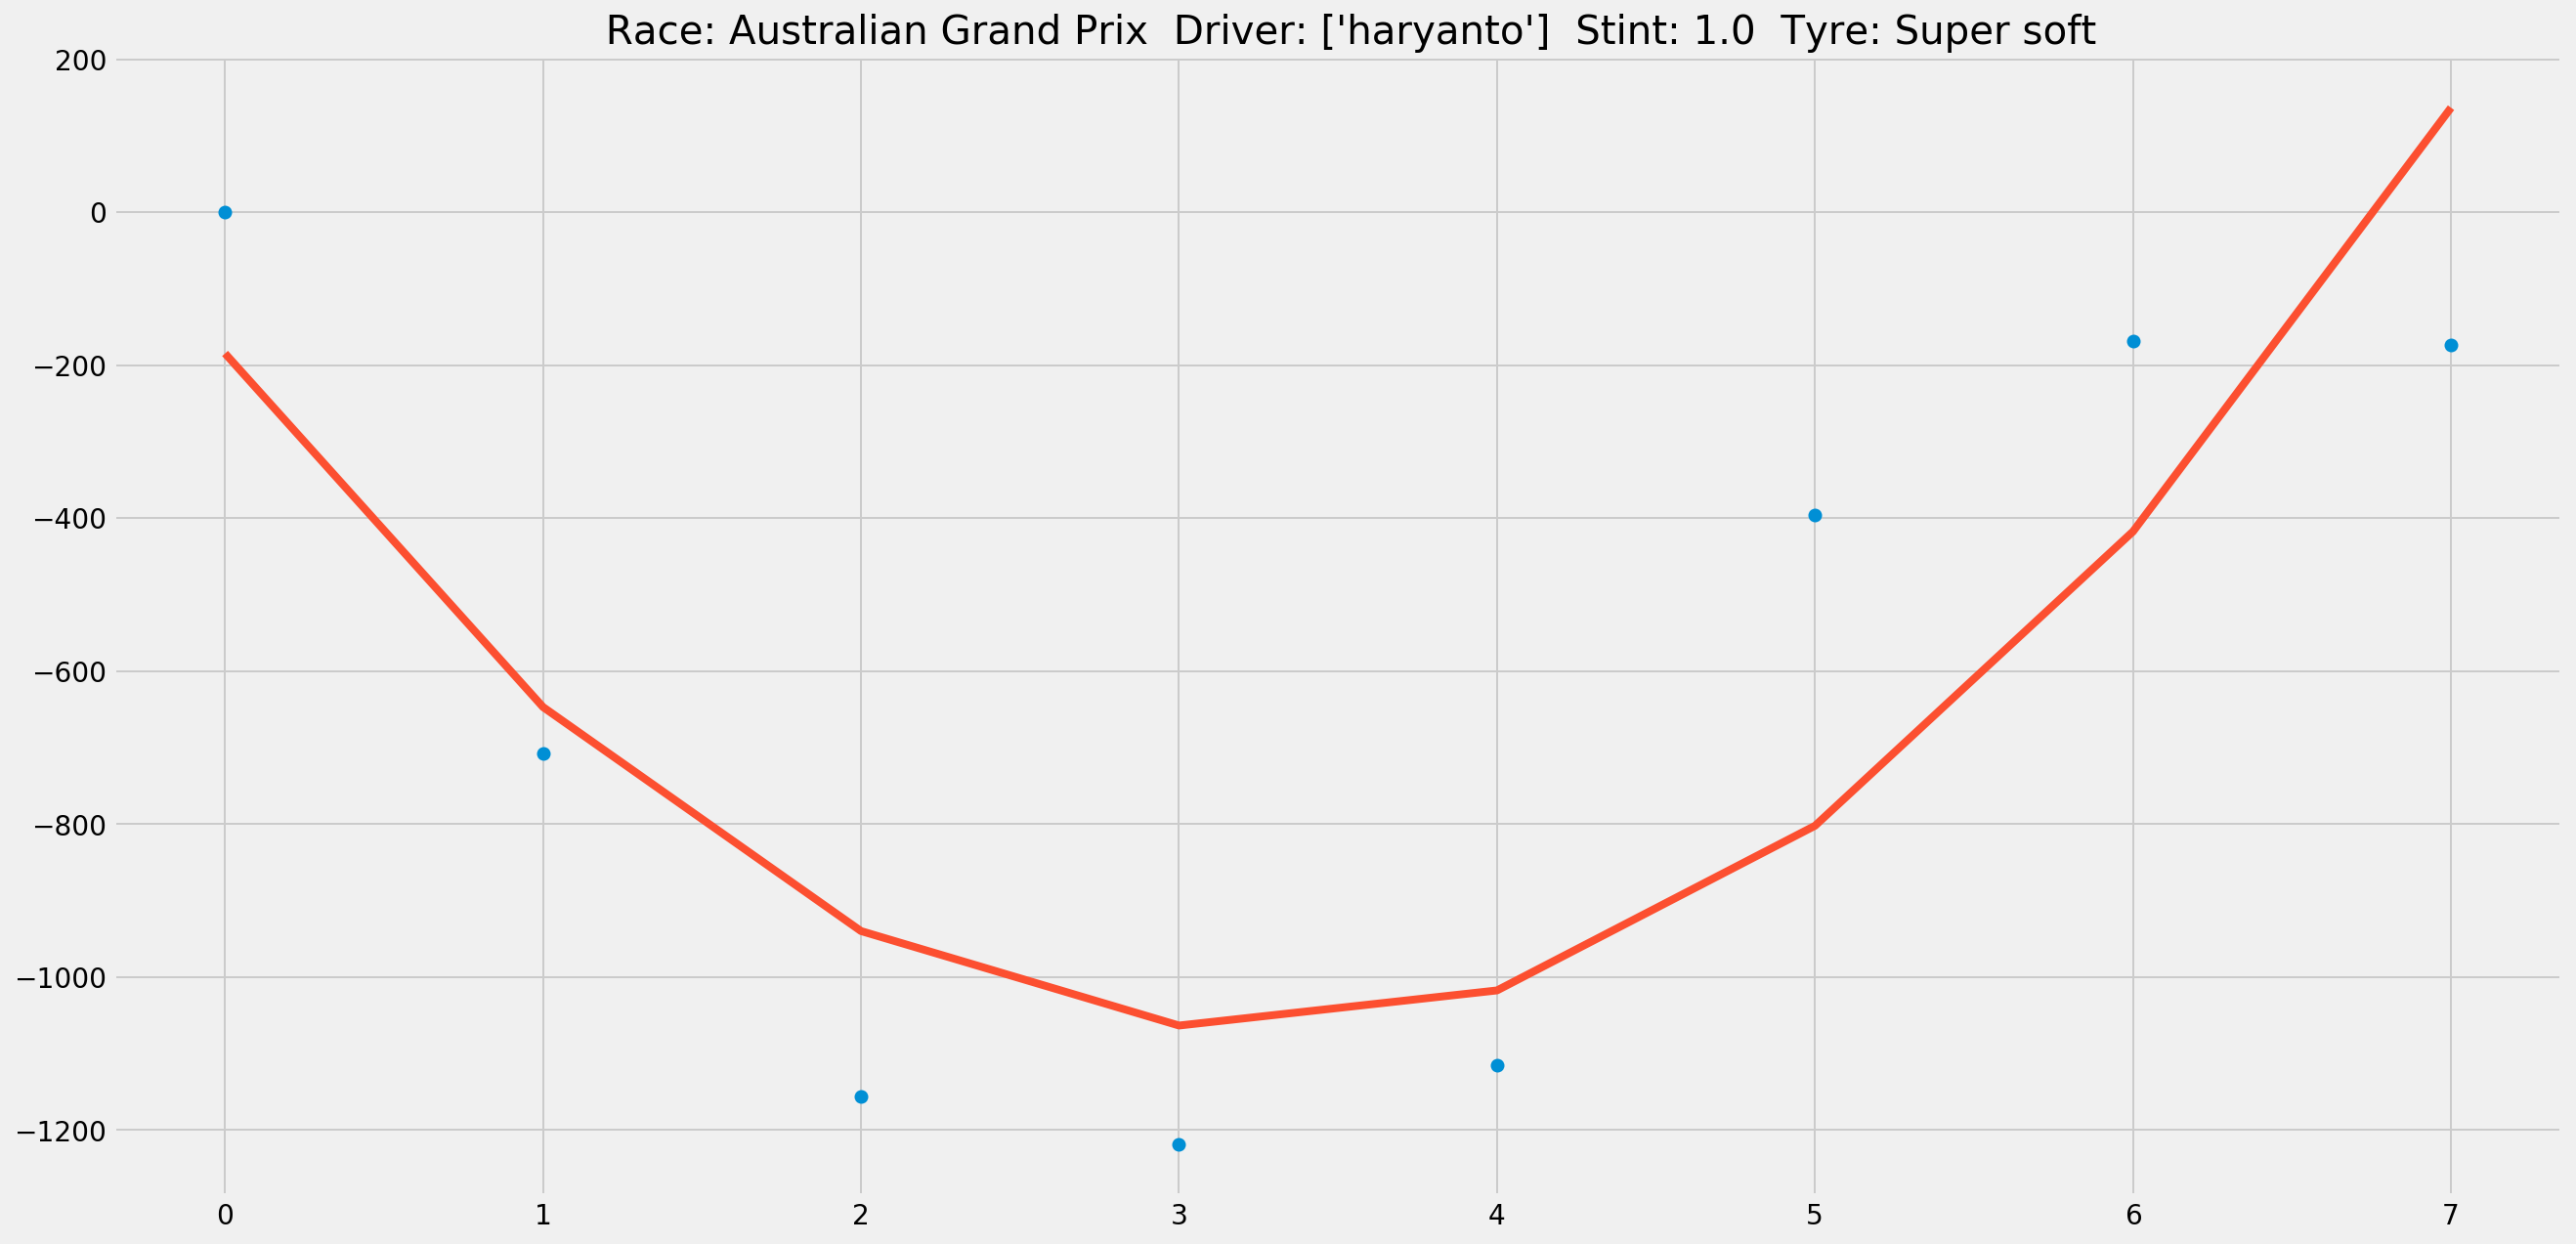

In [8]:
tyre_degrad_alldrivers_D = indiv_polynomial_reg_POLYFIT(sample, groupby_1_field="name", groupby_2_field='stint', groupby_3_field='tyre', groupby_4_field="driverRef", calc_r2=True, fuel_adj=False, show_plot=True, show_table = True)